# **DonorsChoose Project Approval Analysis**

**Problem statement:**

DonorsChoose.org, a platform dedicated to funding classroom projects, faces significant challenges in efficiently and consistently vetting an increasing number of project proposals. With an anticipated influx of close to 500,000 proposals next year, the organization needs to address the following key issues:

- **Scalability:** How can DonorsChoose.org scale its current manual screening processes and resources to handle the projected volume of 500,000 project proposals, ensuring timely and efficient posting?
- **Consistency:** How can DonorsChoose.org enhance the consistency of project vetting across a diverse group of volunteers to ensure a uniform and fair experience for all teachers submitting proposals?
- **Resource Allocation:** How can DonorsChoose.org optimize the use of volunteer time by focusing their efforts on proposals that require the most assistance?

To address these challenges, the objective of this case study is to develop a predictive model that can determine the likelihood of a project proposal being approved.

This model will utilize the text of project descriptions along with additional metadata about the project, teacher, and school.
By predicting the approval status of each proposal, DonorsChoose.org can
- Streamline the vetting process
- Ensuring that projects likely to need further review are prioritized, thereby improving overall efficiency and consistency in project approval.



## Importing data and libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!gdown 1SGjaC1pNK-Xnc9DMuQQSnxQwB7ROzsRo
!gdown 1uM8whn9H8L0iPtbLXgIch8M3fPObC9Tm

Downloading...
From (original): https://drive.google.com/uc?id=1SGjaC1pNK-Xnc9DMuQQSnxQwB7ROzsRo
From (redirected): https://drive.google.com/uc?id=1SGjaC1pNK-Xnc9DMuQQSnxQwB7ROzsRo&confirm=t&uuid=c91bf20c-554e-4835-b7d8-2666f5959804
To: /content/resources.csv
100% 127M/127M [00:00<00:00, 128MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1uM8whn9H8L0iPtbLXgIch8M3fPObC9Tm
From (redirected): https://drive.google.com/uc?id=1uM8whn9H8L0iPtbLXgIch8M3fPObC9Tm&confirm=t&uuid=15a615f4-56ea-4ab9-b5c8-3ea0ef653f9a
To: /content/train_data.csv
100% 200M/200M [00:02<00:00, 73.1MB/s]


In [ ]:
resources = pd.read_csv('/content/resources.csv')
projects = pd.read_csv('/content/train_data.csv')

In [ ]:
projects.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109248 entries, 0 to 109247
Data columns (total 16 columns):
 #   Column                                        Non-Null Count   Dtype 
---  ------                                        --------------   ----- 
 0   id                                            109248 non-null  object
 1   teacher_id                                    109248 non-null  object
 2   teacher_prefix                                109245 non-null  object
 3   school_state                                  109248 non-null  object
 4   project_submitted_datetime                    109248 non-null  object
 5   project_grade_category                        109248 non-null  object
 6   project_subject_categories                    109248 non-null  object
 7   project_subject_subcategories                 109248 non-null  object
 8   project_title                                 109248 non-null  object
 9   project_essay_1                               109248 non-nu

In [ ]:
projects.head()

id                        teacher_id teacher_prefix school_state  \
0  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.           IN   
1  p258326  897464ce9ddc600bced1151f324dd63a            Mr.           FL   
2  p182444  3465aaf82da834c0582ebd0ef8040ca0            Ms.           AZ   
3  p246581  f3cb9bffbba169bef1a77b243e620b60           Mrs.           KY   
4  p104768  be1f7507a41f8479dc06f047086a39ec           Mrs.           TX   

  project_submitted_datetime project_grade_category  \
0           05-12-2016 13:43          Grades PreK-2   
1           25-10-2016 09:22             Grades 6-8   
2           31-08-2016 12:03             Grades 6-8   
3           06-10-2016 21:16          Grades PreK-2   
4           11-07-2016 01:10          Grades PreK-2   

            project_subject_categories     project_subject_subcategories  \
0                  Literacy & Language                     ESL, Literacy   
1    History & Civics, Health & Sports  Civics & Government, Team Sports   
2                      Health & Sports    Health & Wellness, Team Sports   
3  Literacy & Language, Math & Science             Literacy, Mathematics   
4                       Math & Science                       Mathematics   

                                       project_title  \
0   Educational Support for English Learners at Home   
1              Wanted: Projector for Hungry Learners   
2  Soccer Equipment for AWESOME Middle School Stu...   
3                             Techie Kindergarteners   
4                             Interactive Math Tools   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   
2  \r\n\"True champions aren't always the ones th...   
3  I work at a unique school filled with both ESL...   
4  Our second grade classroom next year will be m...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   
2  The students on the campus come to school know...             NaN   
3  My students live in high poverty conditions wi...             NaN   
4  For many students, math is a subject that does...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   
2             NaN  My students need shine guards, athletic socks,...   
3             NaN  My students need to engage in Reading and Math...   
4             NaN  My students need hands on practice in mathemat...   

   teacher_number_of_previously_posted_projects  project_is_approved  
0                                             0                    0  
1                                             7                    1  
2                                             1                    0  
3                                             4                    1  
4                                             1                    1

In [ ]:
resources.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1541272 entries, 0 to 1541271
Data columns (total 4 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   id           1541272 non-null  object 
 1   description  1540980 non-null  object 
 2   quantity     1541272 non-null  int64  
 3   price        1541272 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 47.0+ MB


In [ ]:
resources.head()

id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   
2  p069063  Cory Stories: A Kid's Book About Living With Adhd         1   
3  p069063  Dixon Ticonderoga Wood-Cased #2 HB Pencils, Bo...         2   
4  p069063  EDUCATIONAL INSIGHTS FLUORESCENT LIGHT FILTERS...         3   

    price  
0  149.00  
1   14.95  
2    8.45  
3   13.59  
4   24.95

## Data Cleaning

In [ ]:
def column_analysis(df):
  rows = []
  for col in df.columns:
    dtype = df[col].dtype
    null = df[col].isna().sum()
    nunique = df[col].nunique(dropna=True)
    sample_vals = df[col].dropna().astype(str).sample(5).tolist() if df[col].notna().sum() else []
    rows.append({
        'column': col,
        'dtype': str(dtype),
        'null_count': int(null),
        'nunique': int(nunique),
        'sample_values': '| '.join(sample_vals)
    })
  return pd.DataFrame(rows)

In [ ]:
column_analysis(projects)

column   dtype  null_count  nunique  \
0                                             id  object           0   109248   
1                                     teacher_id  object           0    72168   
2                                 teacher_prefix  object           3        5   
3                                   school_state  object           0       51   
4                     project_submitted_datetime  object           0    90885   
5                         project_grade_category  object           0        4   
6                     project_subject_categories  object           0       51   
7                  project_subject_subcategories  object           0      401   
8                                  project_title  object           0   100850   
9                                project_essay_1  object           0    94319   
10                               project_essay_2  object           0   108831   
11                               project_essay_3  object      105490     3755   
12                               project_essay_4  object      105490     3750   
13                      project_resource_summary  object           0   108323   
14  teacher_number_of_previously_posted_projects   int64           0      374   
15                           project_is_approved   int64           0        2   

                                        sample_values  
0         p102226| p037640| p107683| p119596| p146084  
1   b1e564ffe6d97c7776fe1029d14e1ad2| 22271ffa9dc1...  
2                       Ms.| Teacher| Mrs.| Mrs.| Ms.  
3                                  CO| IL| CT| FL| OK  
4   06-07-2016 23:27| 17-11-2016 19:14| 07-11-2016...  
5   Grades 3-5| Grades 6-8| Grades 3-5| Grades Pre...  
6   Health & Sports| Math & Science, Special Needs...  
7   Early Development, Health & Life Science| Lite...  
8   Extra! Extra! Help Us Read All About It!| Plea...  
9   My school is a small elementary school in Spri...  
10  I've tried my best to make my classroom into a...  
11  The books will be used as mentor text to writi...  
12  Donations to our makerspace project will help ...  
13  My students need 12 bouncy bands for their des...  
14                                    3| 3| 16| 2| 11  
15                                      1| 1| 1| 1| 1

In [ ]:
projects.shape

(109248, 16)

In [ ]:
projects[projects['teacher_prefix'].isna()]

id                        teacher_id teacher_prefix school_state  \
7820   p180947  834f75f1b5e24bd10abe9c3dbf7ba12f            NaN           CA   
30368  p002730  339bd5a9e445d68a74d65b99cd325397            NaN           SC   
57654  p197901  e4be6aaaa887d4202df2b647fbfc82bb            NaN           PA   

      project_submitted_datetime project_grade_category  \
7820            04-11-2016 00:15             Grades 3-5   
30368           09-05-2016 09:38            Grades 9-12   
57654           03-06-2016 10:15             Grades 3-5   

                project_subject_categories      project_subject_subcategories  \
7820   Literacy & Language, Math & Science  Literature & Writing, Mathematics   
30368                  Literacy & Language               Literature & Writing   
57654  Literacy & Language, Math & Science              Literacy, Mathematics   

                                          project_title  \
7820   1:7 Increasing Tech to Decrease Achievement Gaps   
30368                           iPads for STEM Stations   
57654                                   Document Camera   

                                         project_essay_1  \
7820   The children at Anna Yates Elementary school a...   
30368  Within the next 20 years, every job will invol...   
57654  Students at Robertsdale Elementary live in a l...   

                                         project_essay_2  \
7820   My goal is to bring in 1 laptop for every 7 st...   
30368  The students in our school come from a wide va...   
57654  This SMART Document Camera will improve my stu...   

                                         project_essay_3  \
7820                                                 NaN   
30368  Students will use the iPad station for individ...   
57654                                                NaN   

                                         project_essay_4  \
7820                                                 NaN   
30368  Your generosity will allow my students to work...   
57654                                                NaN   

                                project_resource_summary  \
7820   My students need a classroom laptop that is ju...   
30368        My students need 5 iPads for STEM stations.   
57654  My students need a Smart Document Camera to en...   

       teacher_number_of_previously_posted_projects  project_is_approved  
7820                                              1                    1  
30368                                             0                    1  
57654                                             0                    1

In [ ]:
projects[projects['teacher_id'].isin(['834f75f1b5e24bd10abe9c3dbf7ba12f', '339bd5a9e445d68a74d65b99cd325397', 'e4be6aaaa887d4202df2b647fbfc82bb'])]

id                        teacher_id teacher_prefix school_state  \
7820   p180947  834f75f1b5e24bd10abe9c3dbf7ba12f            NaN           CA   
30368  p002730  339bd5a9e445d68a74d65b99cd325397            NaN           SC   
57654  p197901  e4be6aaaa887d4202df2b647fbfc82bb            NaN           PA   

      project_submitted_datetime project_grade_category  \
7820            04-11-2016 00:15             Grades 3-5   
30368           09-05-2016 09:38            Grades 9-12   
57654           03-06-2016 10:15             Grades 3-5   

                project_subject_categories      project_subject_subcategories  \
7820   Literacy & Language, Math & Science  Literature & Writing, Mathematics   
30368                  Literacy & Language               Literature & Writing   
57654  Literacy & Language, Math & Science              Literacy, Mathematics   

                                          project_title  \
7820   1:7 Increasing Tech to Decrease Achievement Gaps   
30368                           iPads for STEM Stations   
57654                                   Document Camera   

                                         project_essay_1  \
7820   The children at Anna Yates Elementary school a...   
30368  Within the next 20 years, every job will invol...   
57654  Students at Robertsdale Elementary live in a l...   

                                         project_essay_2  \
7820   My goal is to bring in 1 laptop for every 7 st...   
30368  The students in our school come from a wide va...   
57654  This SMART Document Camera will improve my stu...   

                                         project_essay_3  \
7820                                                 NaN   
30368  Students will use the iPad station for individ...   
57654                                                NaN   

                                         project_essay_4  \
7820                                                 NaN   
30368  Your generosity will allow my students to work...   
57654                                                NaN   

                                project_resource_summary  \
7820   My students need a classroom laptop that is ju...   
30368        My students need 5 iPads for STEM stations.   
57654  My students need a Smart Document Camera to en...   

       teacher_number_of_previously_posted_projects  project_is_approved  
7820                                              1                    1  
30368                                             0                    1  
57654                                             0                    1

In [ ]:
projects['teacher_prefix'].value_counts()

teacher_prefix
Mrs.       57269
Ms.        38955
Mr.        10648
Teacher     2360
Dr.           13
Name: count, dtype: int64

In [ ]:
projects['teacher_prefix'].fillna(projects['teacher_prefix'].mode()[0], inplace=True)

In [ ]:
projects['project_essay_3'].fillna('', inplace=True)
projects['project_essay_4'].fillna('', inplace=True)

- replace the nulls of text columns with emplty string

In [ ]:
projects.isna().sum().sum()

np.int64(0)

In [ ]:
projects["project_submitted_datetime"] = pd.to_datetime(
    projects["project_submitted_datetime"], format="%d-%m-%Y %H:%M"
)

In [ ]:
column_analysis(projects)

column           dtype  null_count  \
0                                             id          object           0   
1                                     teacher_id          object           0   
2                                 teacher_prefix          object           0   
3                                   school_state          object           0   
4                     project_submitted_datetime  datetime64[ns]           0   
5                         project_grade_category          object           0   
6                     project_subject_categories          object           0   
7                  project_subject_subcategories          object           0   
8                                  project_title          object           0   
9                                project_essay_1          object           0   
10                               project_essay_2          object           0   
11                               project_essay_3          object           0   
12                               project_essay_4          object           0   
13                      project_resource_summary          object           0   
14  teacher_number_of_previously_posted_projects           int64           0   
15                           project_is_approved           int64           0   

    nunique                                      sample_values  
0    109248        p210561| p103029| p077989| p138405| p078686  
1     72168  636d8733dda6da2669883434e706afb7| 6e3c8cf8044d...  
2         5                            Ms.| Ms.| Mr.| Ms.| Mr.  
3        51                                 MD| OK| MI| GA| PA  
4     90885  2017-01-04 18:03:00| 2016-05-06 09:45:00| 2016...  
5         4  Grades 3-5| Grades PreK-2| Grades 3-5| Grades ...  
6        51  Literacy & Language| Math & Science| Literacy ...  
7       401  Literacy, Literature & Writing| Literature & W...  
8    100850  Safe Sensory Supplies| Comfy Cozy Classroom| T...  
9     94319  I am so excited to welcome 60 new students to ...  
10   108831  We need to equip our library with a wide range...  
11     3756                                           | | | |   
12     3751  | | This donation would greatly improve my stu...  
13   108323  My students need Wobble Chairs to help them si...  
14      374                                      0| 2| 1| 1| 0  
15        2                                      1| 1| 1| 1| 1

In [ ]:
resources.shape

(1541272, 4)

In [ ]:
column_analysis(resources)

column    dtype  null_count  nunique  \
0           id   object           0   260115   
1  description   object         292   332928   
2     quantity    int64           0      208   
3        price  float64           0    26890   

                                       sample_values  
0        p126211| p199069| p040798| p030621| p142987  
1  Enrique's Journey (The Young Adult Adaptation)...  
2                                      2| 1| 4| 1| 1  
3                      12.4| 74.82| 20.43| 6.29| 6.3

In [ ]:
resources[resources['description'].isna()][['id', 'description']]

id description
37603    p194324         NaN
37604    p194324         NaN
37605    p194324         NaN
37606    p194324         NaN
44304    p084588         NaN
...          ...         ...
1277794  p042527         NaN
1289873  p033486         NaN
1301428  p227836         NaN
1304563  p083954         NaN
1333459  p118647         NaN

[292 rows x 2 columns]

In [ ]:
resources[resources['id']=='p194324']

id                                description  quantity  price
37603  p194324                                        NaN         1  73.16
37604  p194324                                        NaN         1  11.69
37605  p194324                                        NaN         1  64.30
37606  p194324                                        NaN         1  15.52
37607  p194324                       Bullying (10 Bk Set)         1  65.79
37608  p194324             Character Education (6 Bk Set)         1  35.42
37609  p194324                    Civil Rights (4 Bk Set)         1  31.05
37610  p194324  Spanish Heritage - Nonfiction (10 Bk Set)         1  63.61

In [ ]:
resources['description'].fillna('', inplace=True)

- we can impute the nulls of text column with empty string as no common id have common descriptions.

In [ ]:
resources.rename(columns={'price': 'unit_price'}, inplace=True)

In [ ]:
resources['resource_cost'] = resources['unit_price'] * resources['quantity']

In [ ]:
column_analysis(resources)

column    dtype  null_count  nunique  \
0             id   object           0   260115   
1    description   object           0   332929   
2       quantity    int64           0      208   
3     unit_price  float64           0    26890   
4  resource_cost  float64           0    50356   

                                       sample_values  
0        p163082| p151483| p112614| p056330| p245321  
1  Scotch Thermal Laminator Combo Pack, Includes ...  
2                                      1| 5| 1| 1| 1  
3                    174.78| 9.72| 17.99| 6.9| 99.99  
4                       69.95| 7.06| 9.25| 8.47| 6.0

## Text Processing

### resource description

In [ ]:
resources.head()

id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   
2  p069063  Cory Stories: A Kid's Book About Living With Adhd         1   
3  p069063  Dixon Ticonderoga Wood-Cased #2 HB Pencils, Bo...         2   
4  p069063  EDUCATIONAL INSIGHTS FLUORESCENT LIGHT FILTERS...         3   

   unit_price  resource_cost  
0      149.00         149.00  
1       14.95          44.85  
2        8.45           8.45  
3       13.59          27.18  
4       24.95          74.85

- There are so many descriptions i.e., high cardinality
- Even same item might have different descriptions and hence better do clustering on sbert embeddings such that we can group similar items.

In [ ]:
import re

def sbert_clean(text):
    if not isinstance(text, str):
        return ""
    text = text.strip()                  # remove extra spaces at ends
    text = re.sub(r'\s+', ' ', text)     # collapse multiple spaces
    return text.lower()                  # SBERT works fine with lowercase

In [ ]:
resources["cleaned_description"] = resources["description"].apply(sbert_clean)

In [ ]:
resources.head()

id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   
2  p069063  Cory Stories: A Kid's Book About Living With Adhd         1   
3  p069063  Dixon Ticonderoga Wood-Cased #2 HB Pencils, Bo...         2   
4  p069063  EDUCATIONAL INSIGHTS FLUORESCENT LIGHT FILTERS...         3   

   unit_price  resource_cost  \
0      149.00         149.00   
1       14.95          44.85   
2        8.45           8.45   
3       13.59          27.18   
4       24.95          74.85   

                                 cleaned_description  
0  lc652 - lakeshore double-space mobile drying rack  
1        bouncy bands for desks (blue support pipes)  
2  cory stories: a kid's book about living with adhd  
3  dixon ticonderoga wood-cased #2 hb pencils, bo...  
4  educational insights fluorescent light filters...

In [ ]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
cleaned_descriptions = resources['cleaned_description'].astype(str).tolist()

In [ ]:
from sentence_transformers import SentenceTransformer

# Load SBERT
resources_sbert_model = SentenceTransformer("all-MiniLM-L6-v2")

# sbert embeddings
resources_embeddings = resources_sbert_model.encode(cleaned_descriptions,
                                                    device=device,
                                                    show_progress_bar=True)

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/48165 [00:00<?, ?it/s]

In [ ]:
resources_embeddings.shape

(1541272, 384)

In [ ]:
from sklearn.decomposition import PCA

resources_pca = PCA(n_components=100, random_state=42)

resources_embeddings_pca = resources_pca.fit_transform(resources_embeddings)

In [ ]:
resources_pca.explained_variance_ratio_.sum()

np.float32(0.7220856)

In [ ]:
!pip install faiss-cpu --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 20.0 MB/s eta 0:00:00


In [ ]:
import faiss

d = resources_embeddings_pca.shape[1]
k = 30

resources_kmeans = faiss.Kmeans(d=d, k=k, niter=20, verbose=True)

# fit
resources_kmeans.train(resources_embeddings_pca)

# labels
_, resources_kmeans_labels = resources_kmeans.index.search(resources_embeddings_pca, 1)
resources_kmeans_labels = resources_kmeans_labels.flatten()

# centroids
resources_kmeans_centroids = resources_kmeans.centroids

In [ ]:
resources_kmeans_labels

array([ 7, 19,  3, ..., 24, 21,  4])

In [ ]:
resources_kmeans_labels.shape

(1541272,)

In [ ]:
resources['kmeans_label'] = resources_kmeans_labels

In [ ]:
resources.head()

id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   
2  p069063  Cory Stories: A Kid's Book About Living With Adhd         1   
3  p069063  Dixon Ticonderoga Wood-Cased #2 HB Pencils, Bo...         2   
4  p069063  EDUCATIONAL INSIGHTS FLUORESCENT LIGHT FILTERS...         3   

   unit_price  resource_cost  \
0      149.00         149.00   
1       14.95          44.85   
2        8.45           8.45   
3       13.59          27.18   
4       24.95          74.85   

                                 cleaned_description  kmeans_label  
0  lc652 - lakeshore double-space mobile drying rack             7  
1        bouncy bands for desks (blue support pipes)            19  
2  cory stories: a kid's book about living with adhd             3  
3  dixon ticonderoga wood-cased #2 hb pencils, bo...             9  
4  educational insights fluorescent light filters...            23

In [ ]:
resources['kmeans_label'].value_counts()

kmeans_label
20    135840
12     79249
27     79056
9      72792
11     71141
23     70655
10     62986
3      61830
24     61312
5      60121
29     58404
1      57537
17     54697
14     51174
0      49571
4      48698
2      47524
7      47064
26     46051
15     43344
16     42120
21     40023
28     38306
19     34860
25     30276
13     28075
18     20141
8      18341
6      18157
22     11927
Name: count, dtype: int64

In [ ]:
import nltk
nltk.download('stopwords')

stop_words = nltk.corpus.stopwords.words('english')

def tfid_clean(text):
  text = text.lower()
  text = re.sub(r'[^a-z ]', '', text)
  text = [word for word in text.split() if word not in stop_words]
  return ' '.join(text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
resources['cleaned_description'] = resources['cleaned_description'].apply(tfid_clean)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

resoucrces_tfid = TfidfVectorizer(ngram_range=(2,3),
                                  max_features=10000,
                                  min_df=2)

cluster_names = {}
sample_size = 5000

for cl in sorted(resources['kmeans_label'].unique()):
  texts = resources.loc[resources['kmeans_label']==cl, 'cleaned_description'].astype(str)
  if len(texts) == 0:
      cluster_names[cl] = []
      continue
  if len(texts) > sample_size:
      texts = texts.sample(sample_size, random_state=42)
  X = resoucrces_tfid.fit_transform(texts)

  scores = X.mean(axis=0).A1
  feat = resoucrces_tfid.get_feature_names_out()
  top_idx = scores.argsort()[-20:][::-1]
  cluster_names[cl] = [feat[i] for i in top_idx]

for cl, terms in cluster_names.items():
  print(cl, ":", ", ".join(terms), '\n')


0 : book set, extra book, extra book set, set gr, book set gr, aa level, gr library, level extra, level extra book, bk set, level nonfiction, book bin, set gr library, aa level extra, level nonfiction extra, nonfiction extra, nonfiction extra book, level book, level book bin, book bin gr 

1 : pocket chart, one size, letter size, per pack, laminating pouches, assorted colors, bean bag, thermal laminating, thermal laminating pouches, storage sack, atyourseat storage, atyourseat storage sack, write wipe, pockets set, reusable write wipe, reusable write, write wipe pockets, wipe pockets, wipe pockets set, school smart 

2 : glue sticks, school glue, school glue sticks, tempera paint, oz pack, liquid tempera paint, liquid tempera, elmers washable, washable liquid, fully washable liquid, washable liquid tempera, lakeshore fully washable, lakeshore fully, fully washable, disinfecting wipes, sticks oz, glue sticks oz, paint gallon, tempera paint gallon, glue stick 

3 : min subscriptions, lea

In [ ]:
# map kmeans cluster -> final category name
merge_map = {
  0:"Books",10:"Books",11:"Books",20:"Books",27:"Books",29:"Books",
  1:"Stationery",2:"Stationery",9:"Stationery",14:"Stationery",18:"Stationery",24:"Stationery",
  7:"Classroom_aid",8:"Classroom_aid",13:"Classroom_aid",28:"Classroom_aid",
  5:"STEM",16:"STEM",21:"STEM",26:"STEM",
  4:"Electronics",6:"Electronics",12:"Electronics",25:"Electronics",
  17:"Sports_Fitness",19:"Sports_Fitness",22:"Sports_Fitness",23:"Sports_Fitness",
  15:"Food",
  3:"Subscriptions"
}

# apply
resources['resource_cluster'] = resources['kmeans_label'].map(merge_map)

In [ ]:
# correcting mis-classified

books_index = resources[resources['cleaned_description'].str.contains('bk set')].index
classroom_aid_index = resources[resources['cleaned_description'].str.contains('bean bag|light|filters')].index
blanl_index = resources[resources['description']==''].index

resources.loc[books_index, 'resource_cluster'] = 'Books'
resources.loc[classroom_aid_index, 'resource_cluster'] = 'Classroom_aid'
resources.loc[blanl_index, 'resource_cluster'] = 'Other'

In [ ]:
resources.head()

id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   
2  p069063  Cory Stories: A Kid's Book About Living With Adhd         1   
3  p069063  Dixon Ticonderoga Wood-Cased #2 HB Pencils, Bo...         2   
4  p069063  EDUCATIONAL INSIGHTS FLUORESCENT LIGHT FILTERS...         3   

   unit_price  resource_cost  \
0      149.00         149.00   
1       14.95          44.85   
2        8.45           8.45   
3       13.59          27.18   
4       24.95          74.85   

                                 cleaned_description  kmeans_label  \
0        lc lakeshore doublespace mobile drying rack             7   
1              bouncy bands desks blue support pipes            19   
2                 cory stories kids book living adhd             3   
3  dixon ticonderoga woodcased hb pencils box yellow             9   
4  educational insights fluorescent light filters...            23   

  resource_cluster  
0    Classroom_aid  
1   Sports_Fitness  
2    Subscriptions  
3       Stationery  
4    Classroom_aid

### project_title

In [ ]:
projects.head()

id                        teacher_id teacher_prefix school_state  \
0  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.           IN   
1  p258326  897464ce9ddc600bced1151f324dd63a            Mr.           FL   
2  p182444  3465aaf82da834c0582ebd0ef8040ca0            Ms.           AZ   
3  p246581  f3cb9bffbba169bef1a77b243e620b60           Mrs.           KY   
4  p104768  be1f7507a41f8479dc06f047086a39ec           Mrs.           TX   

  project_submitted_datetime project_grade_category  \
0        2016-12-05 13:43:00          Grades PreK-2   
1        2016-10-25 09:22:00             Grades 6-8   
2        2016-08-31 12:03:00             Grades 6-8   
3        2016-10-06 21:16:00          Grades PreK-2   
4        2016-07-11 01:10:00          Grades PreK-2   

            project_subject_categories     project_subject_subcategories  \
0                  Literacy & Language                     ESL, Literacy   
1    History & Civics, Health & Sports  Civics & Government, Team Sports   
2                      Health & Sports    Health & Wellness, Team Sports   
3  Literacy & Language, Math & Science             Literacy, Mathematics   
4                       Math & Science                       Mathematics   

                                       project_title  \
0   Educational Support for English Learners at Home   
1              Wanted: Projector for Hungry Learners   
2  Soccer Equipment for AWESOME Middle School Stu...   
3                             Techie Kindergarteners   
4                             Interactive Math Tools   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   
2  \r\n\"True champions aren't always the ones th...   
3  I work at a unique school filled with both ESL...   
4  Our second grade classroom next year will be m...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...                   
1  The projector we need for our school is very c...                   
2  The students on the campus come to school know...                   
3  My students live in high poverty conditions wi...                   
4  For many students, math is a subject that does...                   

  project_essay_4                           project_resource_summary  \
0                  My students need opportunities to practice beg...   
1                  My students need a projector to help with view...   
2                  My students need shine guards, athletic socks,...   
3                  My students need to engage in Reading and Math...   
4                  My students need hands on practice in mathemat...   

   teacher_number_of_previously_posted_projects  project_is_approved  
0                                             0                    0  
1                                             7                    1  
2                                             1                    0  
3                                             4                    1  
4                                             1                    1

In [ ]:
project_title_df = projects[['id', 'project_title']]
project_title_df.head()

id                                      project_title
0  p253737   Educational Support for English Learners at Home
1  p258326              Wanted: Projector for Hungry Learners
2  p182444  Soccer Equipment for AWESOME Middle School Stu...
3  p246581                             Techie Kindergarteners
4  p104768                             Interactive Math Tools

In [ ]:
import re

def _syllables(word):
    w = re.sub(r'[^a-z]', '', word.lower())
    if not w: return 0
    groups = re.findall(r'[aeiou]+', w)
    cnt = len(groups)
    if w.endswith("e") and not w.endswith("le") and cnt > 1:
        cnt -= 1
    return max(1, cnt)

def readability_grade(title):
    text = (title or "").strip()
    text = re.sub(r'\\n|\\r|\\t|\\|\\a|\\b|\\f|\\v|\"', ' ', text) # removing escape characters
    sentences = [s for s in re.split(r'[.!?]+', text) if s.strip()]
    s_cnt = max(1, len(sentences))
    words = re.findall(r"[A-Za-z0-9']+", text)
    w_cnt = max(1, len(words))
    syll = sum(_syllables(w) for w in words)
    fkgl = 0.39 * (w_cnt / s_cnt) + 11.8 * (syll / w_cnt) - 15.59
    return round(fkgl, 3)

project_title_df['title_readability_grade'] = project_title_df['project_title'].apply(readability_grade)

In [ ]:
_REQUEST_PAT = re.compile(
    r"\b(help|need|looking for|looking to|we need|please|support|request|seeking|seek|donate|donation|want|would like|asking for|looking|requesting)\b",
    flags=re.I
)

def is_request(title):
    t = (title or "").lower()
    # direct starts-with-verb heuristic (e.g., "Help us...", "Need...")
    if re.match(r"^\s*(help|need|support|request|seeking|seek|looking|requesting)\b", t):
        return 1
    return int(bool(_REQUEST_PAT.search(t)))

project_title_df['is_title_request'] = project_title_df['project_title'].apply(is_request)

In [ ]:
!pip install wordfreq --quiet

In [ ]:
import statistics
from wordfreq import zipf_frequency

def creativity_score(title):
    text = (title or "").strip().lower()
    words = re.findall(r"[a-z0-9']+", text)
    if not words:
        return 0.0
    # zipf_frequency ~ 1..7 (higher = common). invert to get "rarity"
    freqs = [zipf_frequency(w, "en") for w in words]
    mean_zipf = statistics.mean(freqs)
    rare_score = max(0.0, 7.0 - mean_zipf)   # larger => rarer vocabulary
    # small punctuation bonus for stylistic flair
    punct_bonus = 1.0 if re.search(r"[!,:;\"'()-]", title) else 0.0
    score = rare_score * 0.85 + punct_bonus * 0.15
    return round(score, 3)

project_title_df['title_creativity_score'] = project_title_df['project_title'].apply(creativity_score)

In [ ]:
project_title_df.head()

id                                      project_title  \
0  p253737   Educational Support for English Learners at Home   
1  p258326              Wanted: Projector for Hungry Learners   
2  p182444  Soccer Equipment for AWESOME Middle School Stu...   
3  p246581                             Techie Kindergarteners   
4  p104768                             Interactive Math Tools   

   title_readability_grade  is_title_request  title_creativity_score  
0                    10.74                 1                   1.297  
1                     7.60                 0                   2.069  
2                    10.74                 0                   1.405  
3                    20.59                 0                   4.003  
4                     9.18                 0                   2.238

In [ ]:
import nltk
nltk.download('stopwords')

stop_words = nltk.corpus.stopwords.words('english')

def text_clean(text):
  text = text.lower()
  text = re.sub(r'\\n|\\r|\\t|\\|\\a|\\b|\\f|\\v', ' ', text) # removing escape characters
  text = re.sub(r'[^a-z0-9 ]', ' ', text)
  text = re.sub(r'\s+', ' ', text).strip()
  text = [word for word in text.split() if word not in stop_words]
  return ' '.join(text)

project_title_df['cleaned_project_title'] = project_title_df['project_title'].apply(text_clean)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# number of words in project title
project_title_df['cleaned_title_word_count'] = project_title_df['cleaned_project_title'].apply(lambda x: len(x.split()))

# length of title
project_title_df['title_length'] = project_title_df['project_title'].apply(lambda x: len(x))

In [ ]:
project_title_df.head(5)

id                                      project_title  \
0  p253737   Educational Support for English Learners at Home   
1  p258326              Wanted: Projector for Hungry Learners   
2  p182444  Soccer Equipment for AWESOME Middle School Stu...   
3  p246581                             Techie Kindergarteners   
4  p104768                             Interactive Math Tools   

   title_readability_grade  is_title_request  title_creativity_score  \
0                    10.74                 1                   1.297   
1                     7.60                 0                   2.069   
2                    10.74                 0                   1.405   
3                    20.59                 0                   4.003   
4                     9.18                 0                   2.238   

                             cleaned_project_title  cleaned_title_word_count  \
0        educational support english learners home                         5   
1                 wanted projector hungry learners                         4   
2  soccer equipment awesome middle school students                         6   
3                           techie kindergarteners                         2   
4                           interactive math tools                         3   

   title_length  
0            48  
1            37  
2            51  
3            22  
4            22

In [ ]:
project_title_df.isna().sum()

id                          0
project_title               0
title_readability_grade     0
is_title_request            0
title_creativity_score      0
cleaned_project_title       0
cleaned_title_word_count    0
title_length                0
dtype: int64

### project_essay

In [ ]:
essay_cols = ["project_essay_1", "project_essay_2", "project_essay_3", "project_essay_4"]

projects['project_essay'] = projects[essay_cols].agg(" ".join, axis=1)

projects.drop(columns=essay_cols, inplace=True)

In [ ]:
projects.head()

id                        teacher_id teacher_prefix school_state  \
0  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.           IN   
1  p258326  897464ce9ddc600bced1151f324dd63a            Mr.           FL   
2  p182444  3465aaf82da834c0582ebd0ef8040ca0            Ms.           AZ   
3  p246581  f3cb9bffbba169bef1a77b243e620b60           Mrs.           KY   
4  p104768  be1f7507a41f8479dc06f047086a39ec           Mrs.           TX   

  project_submitted_datetime project_grade_category  \
0        2016-12-05 13:43:00          Grades PreK-2   
1        2016-10-25 09:22:00             Grades 6-8   
2        2016-08-31 12:03:00             Grades 6-8   
3        2016-10-06 21:16:00          Grades PreK-2   
4        2016-07-11 01:10:00          Grades PreK-2   

            project_subject_categories     project_subject_subcategories  \
0                  Literacy & Language                     ESL, Literacy   
1    History & Civics, Health & Sports  Civics & Government, Team Sports   
2                      Health & Sports    Health & Wellness, Team Sports   
3  Literacy & Language, Math & Science             Literacy, Mathematics   
4                       Math & Science                       Mathematics   

                                       project_title  \
0   Educational Support for English Learners at Home   
1              Wanted: Projector for Hungry Learners   
2  Soccer Equipment for AWESOME Middle School Stu...   
3                             Techie Kindergarteners   
4                             Interactive Math Tools   

                            project_resource_summary  \
0  My students need opportunities to practice beg...   
1  My students need a projector to help with view...   
2  My students need shine guards, athletic socks,...   
3  My students need to engage in Reading and Math...   
4  My students need hands on practice in mathemat...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   
2                                             1                    0   
3                                             4                    1   
4                                             1                    1   

                                       project_essay  
0  My students are English learners that are work...  
1  Our students arrive to our school eager to lea...  
2  \r\n\"True champions aren't always the ones th...  
3  I work at a unique school filled with both ESL...  
4  Our second grade classroom next year will be m...

In [ ]:
projects_essay_df = projects[['id', 'project_essay']]
projects_essay_df.head()

id                                      project_essay
0  p253737  My students are English learners that are work...
1  p258326  Our students arrive to our school eager to lea...
2  p182444  \r\n\"True champions aren't always the ones th...
3  p246581  I work at a unique school filled with both ESL...
4  p104768  Our second grade classroom next year will be m...

In [ ]:
import nltk
nltk.download('stopwords')

stop_words = nltk.corpus.stopwords.words('english')

def text_clean(text):
  text = text.lower()
  text = re.sub(r'\\n|\\r|\\t|\\|\\a|\\b|\\f|\\v', ' ', text) # removing escape characters
  text = re.sub(r'[^a-z0-9 ]', ' ', text)
  text = re.sub(r'\s+', ' ', text).strip()
  text = [word for word in text.split() if word not in stop_words]
  return ' '.join(text)

projects_essay_df['cleaned_project_essay'] = projects_essay_df['project_essay'].apply(text_clean)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
projects_essay_df.head()

id                                      project_essay  \
0  p253737  My students are English learners that are work...   
1  p258326  Our students arrive to our school eager to lea...   
2  p182444  \r\n\"True champions aren't always the ones th...   
3  p246581  I work at a unique school filled with both ESL...   
4  p104768  Our second grade classroom next year will be m...   

                               cleaned_project_essay  
0  students english learners working english seco...  
1  students arrive school eager learn polite gene...  
2  true champions always ones win guts mia hamm q...  
3  work unique school filled esl english second l...  
4  second grade classroom next year made around 2...

In [ ]:
import re

def _syllables(word):
    w = re.sub(r'[^a-z]', '', word.lower())
    if not w: return 0
    groups = re.findall(r'[aeiou]+', w)
    cnt = len(groups)
    if w.endswith("e") and not w.endswith("le") and cnt > 1:
        cnt -= 1
    return max(1, cnt)

def readability_grade(title):
    text = (title or "").strip()
    text = re.sub(r'\\n|\\r|\\t|\\|\\a|\\b|\\f|\\v|\"', ' ', text) # removing escape characters
    sentences = [s for s in re.split(r'[.!?]+', text) if s.strip()]
    s_cnt = max(1, len(sentences))
    words = re.findall(r"[A-Za-z0-9']+", text)
    w_cnt = max(1, len(words))
    syll = sum(_syllables(w) for w in words)
    fkgl = 0.39 * (w_cnt / s_cnt) + 11.8 * (syll / w_cnt) - 15.59
    return round(fkgl, 2)

projects_essay_df['essay_readability_grade'] = projects_essay_df['project_essay'].apply(readability_grade)

In [ ]:
# number of words in project essay
projects_essay_df['cleaned_essay_word_count'] = projects_essay_df['cleaned_project_essay'].apply(lambda x: len(x.split()))

# length of essay
projects_essay_df['essay_length'] = projects_essay_df['project_essay'].apply(lambda x: len(x))

# sentence_count
projects_essay_df['essay_sentence_count'] = projects_essay_df['project_essay'].apply(lambda x: len(re.split(r'[.!?]+\s*', x)))

# paragraph count
projects_essay_df['essay_paragraph_count'] = projects_essay_df['project_essay'].apply(
    lambda x: len([p for p in re.split(r'(?:\\r\\n|\\r|\\n)+', str(x)) if p.strip()])
)

In [ ]:
projects_essay_df.head()

id                                      project_essay  \
0  p253737  My students are English learners that are work...   
1  p258326  Our students arrive to our school eager to lea...   
2  p182444  \r\n\"True champions aren't always the ones th...   
3  p246581  I work at a unique school filled with both ESL...   
4  p104768  Our second grade classroom next year will be m...   

                               cleaned_project_essay  essay_readability_grade  \
0  students english learners working english seco...                     9.11   
1  students arrive school eager learn polite gene...                     9.16   
2  true champions always ones win guts mia hamm q...                    11.20   
3  work unique school filled esl english second l...                     9.07   
4  second grade classroom next year made around 2...                     9.18   

   cleaned_essay_word_count  essay_length  essay_sentence_count  \
0                       146          1632                    16   
1                        96          1304                    13   
2                       184          2096                    16   
3                       108          1291                    13   
4                       108          1326                    12   

   essay_paragraph_count  
0                      4  
1                      3  
2                      3  
3                      3  
4                      3

In [ ]:
import re, html

def basic_clean(text):
  if not text:
      return ""
  text = html.unescape(str(text))    # fix &amp; etc.
  text = re.sub(r'(?:\\r\\n|\\r|\\n)+', ' ', text)
  text = re.sub(r'\s+', ' ', text)
  return text.strip()

In [ ]:
!pip install vaderSentiment --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 5.3 MB/s eta 0:00:00


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

def sentiment_vader(text):
  text = basic_clean(text)
  return round(analyzer.polarity_scores(text)['compound'], 3)

projects_essay_df['essay_sentiment'] = projects_essay_df['project_essay'].apply(sentiment_vader)

In [ ]:
from textblob import TextBlob

def sentiment_subjectivity(text):
  text = basic_clean(text)
  return round(TextBlob(text).sentiment.subjectivity, 3)

projects_essay_df['essay_subjectivity'] = projects_essay_df['project_essay'].apply(sentiment_subjectivity)

In [ ]:
projects_essay_df.head()

id                                      project_essay  \
0  p253737  My students are English learners that are work...   
1  p258326  Our students arrive to our school eager to lea...   
2  p182444  \r\n\"True champions aren't always the ones th...   
3  p246581  I work at a unique school filled with both ESL...   
4  p104768  Our second grade classroom next year will be m...   

                               cleaned_project_essay  essay_readability_grade  \
0  students english learners working english seco...                     9.11   
1  students arrive school eager learn polite gene...                     9.16   
2  true champions always ones win guts mia hamm q...                    11.20   
3  work unique school filled esl english second l...                     9.07   
4  second grade classroom next year made around 2...                     9.18   

   cleaned_essay_word_count  essay_length  essay_sentence_count  \
0                       146          1632                    16   
1                        96          1304                    13   
2                       184          2096                    16   
3                       108          1291                    13   
4                       108          1326                    12   

   essay_paragraph_count  essay_sentiment  essay_subjectivity  
0                      4            0.970               0.282  
1                      3            0.931               0.412  
2                      3            0.997               0.486  
3                      3            0.994               0.434  
4                      3            0.919               0.558

## Feature Engineering

In [ ]:
projects.head()

id                        teacher_id teacher_prefix school_state  \
0  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.           IN   
1  p258326  897464ce9ddc600bced1151f324dd63a            Mr.           FL   
2  p182444  3465aaf82da834c0582ebd0ef8040ca0            Ms.           AZ   
3  p246581  f3cb9bffbba169bef1a77b243e620b60           Mrs.           KY   
4  p104768  be1f7507a41f8479dc06f047086a39ec           Mrs.           TX   

  project_submitted_datetime project_grade_category  \
0        2016-12-05 13:43:00          Grades PreK-2   
1        2016-10-25 09:22:00             Grades 6-8   
2        2016-08-31 12:03:00             Grades 6-8   
3        2016-10-06 21:16:00          Grades PreK-2   
4        2016-07-11 01:10:00          Grades PreK-2   

            project_subject_categories     project_subject_subcategories  \
0                  Literacy & Language                     ESL, Literacy   
1    History & Civics, Health & Sports  Civics & Government, Team Sports   
2                      Health & Sports    Health & Wellness, Team Sports   
3  Literacy & Language, Math & Science             Literacy, Mathematics   
4                       Math & Science                       Mathematics   

                                       project_title  \
0   Educational Support for English Learners at Home   
1              Wanted: Projector for Hungry Learners   
2  Soccer Equipment for AWESOME Middle School Stu...   
3                             Techie Kindergarteners   
4                             Interactive Math Tools   

                            project_resource_summary  \
0  My students need opportunities to practice beg...   
1  My students need a projector to help with view...   
2  My students need shine guards, athletic socks,...   
3  My students need to engage in Reading and Math...   
4  My students need hands on practice in mathemat...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   
2                                             1                    0   
3                                             4                    1   
4                                             1                    1   

                                       project_essay  
0  My students are English learners that are work...  
1  Our students arrive to our school eager to lea...  
2  \r\n\"True champions aren't always the ones th...  
3  I work at a unique school filled with both ESL...  
4  Our second grade classroom next year will be m...

In [ ]:
resources.head()

id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   
2  p069063  Cory Stories: A Kid's Book About Living With Adhd         1   
3  p069063  Dixon Ticonderoga Wood-Cased #2 HB Pencils, Bo...         2   
4  p069063  EDUCATIONAL INSIGHTS FLUORESCENT LIGHT FILTERS...         3   

   unit_price  resource_cost  \
0      149.00         149.00   
1       14.95          44.85   
2        8.45           8.45   
3       13.59          27.18   
4       24.95          74.85   

                                 cleaned_description  kmeans_label  \
0        lc lakeshore doublespace mobile drying rack             7   
1              bouncy bands desks blue support pipes            19   
2                 cory stories kids book living adhd             3   
3  dixon ticonderoga woodcased hb pencils box yellow             9   
4  educational insights fluorescent light filters...            23   

  resource_cluster  
0    Classroom_aid  
1   Sports_Fitness  
2    Subscriptions  
3       Stationery  
4    Classroom_aid

In [ ]:
resources_pivot = resources.pivot_table(
    index='id',
    columns='resource_cluster',
    values='quantity',
    aggfunc='sum',
    fill_value=0
)

resources_pivot.columns.name = None
resources_pivot.reset_index(inplace=True)
resources_pivot = resources_pivot.sort_values(by='id').reset_index(drop=True)
resources_pivot.head()

id  Books  Classroom_aid  Electronics  Food  Other  STEM  \
0  p000001      0              0            0     0      0     0   
1  p000002      4              4            7     0      0     0   
2  p000003      0              0            0     0      0     0   
3  p000004     95              1            0     0      0     0   
4  p000005      0              0            7     0      0     1   

   Sports_Fitness  Stationery  Subscriptions  
0               7           0              0  
1               3           3              0  
2               0           2              2  
3               0           0              2  
4               0           0              0

In [ ]:
resources_cost_agg = resources.groupby("id", as_index=False)['resource_cost'].sum().sort_values(by='id').reset_index(drop=True)
resources_cost_agg.head()

id  resource_cost
0  p000001         833.63
1  p000002         630.28
2  p000003         298.97
3  p000004        1126.22
4  p000005         702.31

In [ ]:
resources_pivot['total_resource_cost'] = resources_cost_agg['resource_cost'].copy()
resources_pivot.head()

id  Books  Classroom_aid  Electronics  Food  Other  STEM  \
0  p000001      0              0            0     0      0     0   
1  p000002      4              4            7     0      0     0   
2  p000003      0              0            0     0      0     0   
3  p000004     95              1            0     0      0     0   
4  p000005      0              0            7     0      0     1   

   Sports_Fitness  Stationery  Subscriptions  total_resource_cost  
0               7           0              0               833.63  
1               3           3              0               630.28  
2               0           2              2               298.97  
3               0           0              2              1126.22  
4               0           0              0               702.31

In [ ]:
df = pd.merge(projects, resources_pivot, on='id', how='left').sort_values(by='project_submitted_datetime').reset_index(drop=True)
df.head()

id                        teacher_id teacher_prefix school_state  \
0  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.           CA   
1  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.           UT   
2  p189804  4a97f3a390bfe21b99cf5e2b81981c73           Mrs.           CA   
3  p234804  cbc0e38f522143b86d372f8b43d4cff3           Mrs.           GA   
4  p137682  06f6e62e17de34fcf81020c77549e1d5           Mrs.           WA   

  project_submitted_datetime project_grade_category  \
0        2016-04-27 00:27:00          Grades PreK-2   
1        2016-04-27 00:31:00             Grades 3-5   
2        2016-04-27 00:46:00          Grades PreK-2   
3        2016-04-27 00:53:00          Grades PreK-2   
4        2016-04-27 01:05:00             Grades 3-5   

  project_subject_categories            project_subject_subcategories  \
0             Math & Science  Applied Sciences, Health & Life Science   
1              Special Needs                            Special Needs   
2        Literacy & Language                                 Literacy   
3           Applied Learning                        Early Development   
4        Literacy & Language                                 Literacy   

                                    project_title  \
0    Engineering STEAM into the Primary Classroom   
1                         Sensory Tools for Focus   
2  Mobile Learning with a Mobile Listening Center   
3          Flexible Seating for Flexible Learning   
4          Going Deep: The Art of Inner Thinking!   

                            project_resource_summary  ...  Books  \
0  My students need STEM kits to learn critical s...  ...      0   
1  My students need Boogie Boards for quiet senso...  ...      1   
2  My students need a mobile listening center to ...  ...      0   
3  My students need flexible seating in the class...  ...      0   
4  My students need copies of the New York Times ...  ...     14   

   Classroom_aid Electronics  Food  Other  STEM  Sports_Fitness  Stationery  \
0              0           0     0      0     3               0           1   
1              1           3     0      0     2               0           1   
2              0           1     0      0     0               0           0   
3              5           0     0      0     0               4           0   
4              0           0     0      0     0               0           0   

   Subscriptions  total_resource_cost  
0              0               725.05  
1              0               213.03  
2              0               329.00  
3              0               774.92  
4              0               124.18  

[5 rows x 23 columns]

In [ ]:
# Time-based features
df["project_submitted_date"] = df["project_submitted_datetime"].dt.date
df["project_submission_year"] = df["project_submitted_datetime"].dt.year
df["project_submission_month"] = df["project_submitted_datetime"].dt.month_name()
df["project_submission_day"] = df["project_submitted_datetime"].dt.day_name()
df["project_submission_hour"] = df["project_submitted_datetime"].dt.hour

In [ ]:
df.drop(columns=['project_submitted_datetime', 'project_resource_summary'], inplace=True)
df.head()

id                        teacher_id teacher_prefix school_state  \
0  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.           CA   
1  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.           UT   
2  p189804  4a97f3a390bfe21b99cf5e2b81981c73           Mrs.           CA   
3  p234804  cbc0e38f522143b86d372f8b43d4cff3           Mrs.           GA   
4  p137682  06f6e62e17de34fcf81020c77549e1d5           Mrs.           WA   

  project_grade_category project_subject_categories  \
0          Grades PreK-2             Math & Science   
1             Grades 3-5              Special Needs   
2          Grades PreK-2        Literacy & Language   
3          Grades PreK-2           Applied Learning   
4             Grades 3-5        Literacy & Language   

             project_subject_subcategories  \
0  Applied Sciences, Health & Life Science   
1                            Special Needs   
2                                 Literacy   
3                        Early Development   
4                                 Literacy   

                                    project_title  \
0    Engineering STEAM into the Primary Classroom   
1                         Sensory Tools for Focus   
2  Mobile Learning with a Mobile Listening Center   
3          Flexible Seating for Flexible Learning   
4          Going Deep: The Art of Inner Thinking!   

   teacher_number_of_previously_posted_projects  project_is_approved  ...  \
0                                            53                    1  ...   
1                                             4                    1  ...   
2                                            10                    1  ...   
3                                             2                    1  ...   
4                                             2                    1  ...   

  STEM  Sports_Fitness  Stationery  Subscriptions  total_resource_cost  \
0    3               0           1              0               725.05   
1    2               0           1              0               213.03   
2    0               0           0              0               329.00   
3    0               4           0              0               774.92   
4    0               0           0              0               124.18   

   project_submitted_date  project_submission_year  project_submission_month  \
0              2016-04-27                     2016                     April   
1              2016-04-27                     2016                     April   
2              2016-04-27                     2016                     April   
3              2016-04-27                     2016                     April   
4              2016-04-27                     2016                     April   

   project_submission_day  project_submission_hour  
0               Wednesday                        0  
1               Wednesday                        0  
2               Wednesday                        0  
3               Wednesday                        0  
4               Wednesday                        1  

[5 rows x 26 columns]

In [ ]:
column_analysis(df)

column    dtype  null_count  \
0                                             id   object           0   
1                                     teacher_id   object           0   
2                                 teacher_prefix   object           0   
3                                   school_state   object           0   
4                         project_grade_category   object           0   
5                     project_subject_categories   object           0   
6                  project_subject_subcategories   object           0   
7                                  project_title   object           0   
8   teacher_number_of_previously_posted_projects    int64           0   
9                            project_is_approved    int64           0   
10                                 project_essay   object           0   
11                                         Books    int64           0   
12                                 Classroom_aid    int64           0   
13                                   Electronics    int64           0   
14                                          Food    int64           0   
15                                         Other    int64           0   
16                                          STEM    int64           0   
17                                Sports_Fitness    int64           0   
18                                    Stationery    int64           0   
19                                 Subscriptions    int64           0   
20                           total_resource_cost  float64           0   
21                        project_submitted_date   object           0   
22                       project_submission_year    int32           0   
23                      project_submission_month   object           0   
24                        project_submission_day   object           0   
25                       project_submission_hour    int32           0   

    nunique                                      sample_values  
0    109248        p035880| p074444| p248443| p101684| p240101  
1     72168  463b6eb7743771c21b4f62d70e1b8b99| 4f9171805c2f...  
2         5                        Mrs.| Mrs.| Ms.| Mrs.| Mrs.  
3        51                                 IN| CA| MO| KS| IL  
4         4  Grades PreK-2| Grades 3-5| Grades PreK-2| Grad...  
5        51  Literacy & Language| Literacy & Language, Math...  
6       401  Extracurricular, Literature & Writing| Applied...  
7    100850  Student Desks and Chairs are LONG Past Retirem...  
8       374                                   9| 10| 1| 44| 39  
9         2                                      1| 1| 1| 1| 1  
10   108986  My students are an eager bunch of learners!! T...  
11      230                                      0| 0| 0| 3| 0  
12      144                                     11| 0| 0| 0| 0  
13      103                                     0| 2| 0| 12| 0  
14       83                                      1| 0| 0| 0| 0  
15        7                                      0| 0| 0| 0| 0  
16       91                                      0| 0| 0| 3| 0  
17      132                                      0| 6| 0| 0| 0  
18      253                                      0| 0| 0| 0| 0  
19      135                                     1| 36| 0| 0| 0  
20    59066            1821.97| 799.5| 175.42| 368.88| 1041.27  
21      369  2016-11-09| 2017-02-16| 2016-08-15| 2016-08-02...  
22        2                       2016| 2017| 2016| 2016| 2016  
23       12             June| June| September| November| March  
24        7           Sunday| Saturday| Sunday| Sunday| Friday  
25       24                                  10| 18| 18| 2| 10

In [ ]:
df.describe().T

count         mean  \
teacher_number_of_previously_posted_projects  109248.0    11.153165   
project_is_approved                           109248.0     0.848583   
Books                                         109248.0     4.085521   
Classroom_aid                                 109248.0     1.813187   
Electronics                                   109248.0     2.109375   
Food                                          109248.0     0.340537   
Other                                         109248.0     0.001108   
STEM                                          109248.0     1.250302   
Sports_Fitness                                109248.0     2.282477   
Stationery                                    109248.0     3.804234   
Subscriptions                                 109248.0     1.278870   
total_resource_cost                           109248.0   545.580439   
project_submission_year                       109248.0  2016.277186   
project_submission_hour                       109248.0    14.459578   

                                                     std     min        25%  \
teacher_number_of_previously_posted_projects   27.777154     0.0     0.0000   
project_is_approved                             0.358456     0.0     1.0000   
Books                                          15.906993     0.0     0.0000   
Classroom_aid                                   7.041146     0.0     0.0000   
Electronics                                     6.310040     0.0     0.0000   
Food                                            2.807968     0.0     0.0000   
Other                                           0.052304     0.0     0.0000   
STEM                                            4.559016     0.0     0.0000   
Sports_Fitness                                  7.519612     0.0     0.0000   
Stationery                                     15.021971     0.0     0.0000   
Subscriptions                                   7.859117     0.0     0.0000   
total_resource_cost                           546.829779   100.0   245.9175   
project_submission_year                         0.447611  2016.0  2016.0000   
project_submission_hour                         5.761503     0.0    11.0000   

                                                 50%        75%       max  
teacher_number_of_previously_posted_projects     2.0     9.0000    451.00  
project_is_approved                              1.0     1.0000      1.00  
Books                                            0.0     0.0000    865.00  
Classroom_aid                                    0.0     1.0000    410.00  
Electronics                                      0.0     2.0000    400.00  
Food                                             0.0     0.0000    175.00  
Other                                            0.0     0.0000     11.00  
STEM                                             0.0     1.0000    576.00  
Sports_Fitness                                   0.0     1.0000    400.00  
Stationery                                       0.0     2.0000    900.00  
Subscriptions                                    0.0     0.0000    351.00  
total_resource_cost                            397.0   691.5525  13543.82  
project_submission_year                       2016.0  2017.0000   2017.00  
project_submission_hour                         15.0    19.0000     23.00

In [ ]:
df.describe(include='object')

id                        teacher_id teacher_prefix school_state  \
count    109248                            109248         109248       109248   
unique   109248                             72168              5           51   
top     p149431  fa2f220b537e8653fb48878ebb38044d           Mrs.           CA   
freq          1                                44          57272        15388   

       project_grade_category project_subject_categories  \
count                  109248                     109248   
unique                      4                         51   
top             Grades PreK-2        Literacy & Language   
freq                    44225                      23655   

       project_subject_subcategories     project_title  \
count                         109248            109248   
unique                           401            100850   
top                         Literacy  Flexible Seating   
freq                            9486               234   

                                            project_essay  \
count                                              109248   
unique                                             108986   
top     Hello, I teach a great group of students who a...   
freq                                                    5   

       project_submitted_date project_submission_month project_submission_day  
count                  109248                   109248                 109248  
unique                    369                       12                      7  
top                2016-09-01                   August              Wednesday  
freq                     2601                    19980                  19219

* **High approval rate:** ~85% projects are approved → dataset is **highly imbalanced** toward approvals.
* **Teacher experience matters:** Median previous projects = **2**, but long tail up to **451** → a few highly active teachers dominate submissions.
* **First-time teachers are common:** 25% teachers have **0** prior projects → strong scope to compare approval by experience.
* **Resource requests are sparse:** Most category counts have **median = 0**, meaning projects usually focus on **1–2 resource types only**.
* **Books & Stationery dominate:** Highest average counts and extreme max values → core classroom needs drive requests.
* **STEM & Electronics are moderate:** Present but not dominant → specialized projects form a smaller share.
* **Food & “Other” are negligible:** Very low means and medians → limited impact on approval modeling.
* **Cost is right-skewed:** Median ≈ **USD 397**, max > **USD 13k** → log transformation or binning is necessary.
* **Typical project cost range:** 50% of projects lie between **USD 246 – USD 692**.
* **Temporal concentration:** Submissions mostly in **2016–2017**, limiting long-term trend analysis.
* **Peak submission time:** Median hour = **3 PM**, with most submissions between **11 AM – 7 PM** → daytime behavior.
* **High teacher repeat behavior:** 72k teachers for 109k projects → many teachers submit **multiple proposals**.
* **Prefix skew:** *Mrs.* dominates (~52%) → teacher_prefix is **imbalanced**, low but usable signal.
* **Geographic concentration:** **California (CA)** has the highest submissions → strong state-level skew.
* **Grade imbalance:** **PreK–2** dominates (~40%) → early education projects are most common.
* **Subject dominance:** **Literacy & Language** is the top category → core academic needs drive demand.
* **High subcategory granularity:** 401 subcategories → **high-cardinality**, needs grouping/encoding.
* **Titles are mostly unique:** ~100k unique titles → TF-IDF/embeddings better than frequency-based features.
* **Essays are almost always unique:** Minimal duplication → strong signal but **high dimensional**.
* **Temporal clustering:** Only **369 unique dates** → submissions are bursty, not continuous.
* **Seasonality:** **August** is peak month → aligns with school-year start.
* **Weekday bias:** **Wednesday** highest → school-hour submission behavior.


## Exploratory Data Analysis

In [ ]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# import warnings
# warnings.filterwarnings('ignore')

# !gdown 15_ylYp27G-tjpXmusKQec7R9saX-_YqM    # resources_preprocessed.csv
# !gdown 1d-nscAgfP4nyFWD228nF9SPdePrQFPTT    # projects_preprocessed.csv
# !gdown 12utMaStw_pLLmOu3kpYJaw5en0TOvuwC    # project_title.csv
# !gdown 1VO4CYzGKLmVElCMHp96aUdZhvJ5-CItf    # projects_essay.csv
# !gdown 1SbtSutPBDlhQoOHcbKNareXTxcA63e07    # merged.csv


# resources = pd.read_csv('/content/resources_preprocessed.csv')
# projects = pd.read_csv('/content/projects_preprocessed.csv')
# project_title_df = pd.read_csv('/content/project_title.csv')
# projects_essay_df = pd.read_csv('/content/projects_essay.csv')
# df = pd.read_csv('/content/merged.csv')

# resources.fillna('', inplace=True)
# projects.fillna('', inplace=True)
# project_title_df.fillna('', inplace=True)
# projects_essay_df.fillna('', inplace=True)
# df.fillna('', inplace=True)

# projects["project_submitted_datetime"] = pd.to_datetime(
#     projects["project_submitted_datetime"], format="%Y-%m-%d %H:%M:%S"
# )

### Approval Ratio

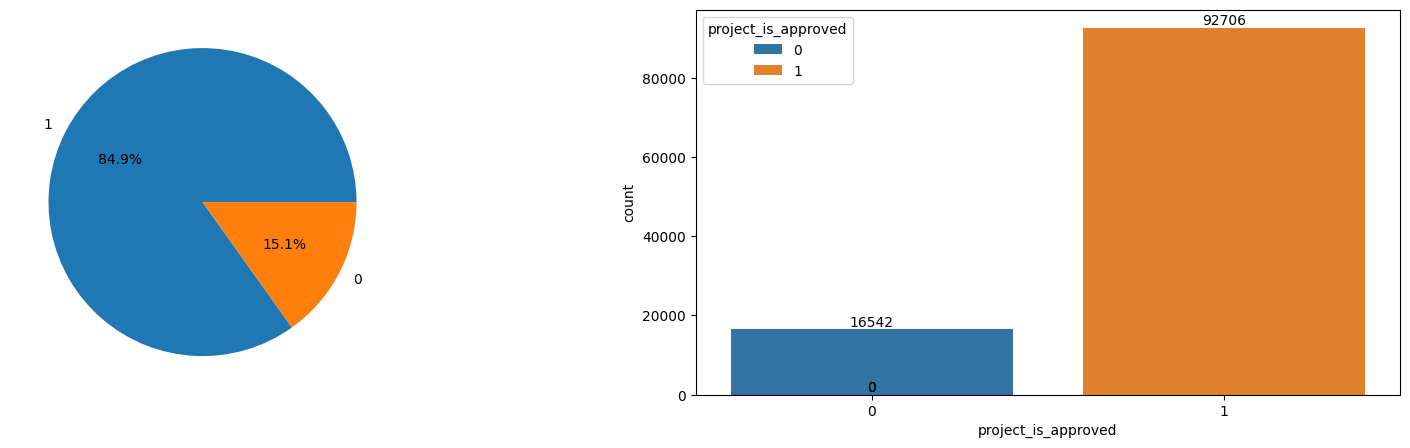

In [ ]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.pie(df['project_is_approved'].value_counts(),
        labels=df['project_is_approved'].value_counts().index,
        autopct='%1.1f%%')

plt.subplot(1, 2, 2)
g = sns.countplot(data=df, x='project_is_approved', hue='project_is_approved')
for p in g.patches:
    g.text(p.get_x() + p.get_width() / 2, p.get_height(), int(p.get_height()), ha='center', va='bottom')

* **High approval rate:** ~85% projects are approved → dataset is **highly imbalanced** toward approvals.

### Hypothesis Testing Template

In [ ]:
from scipy.stats import chi2_contingency

def chisquare_test(df, columns, target_col, table=True):
  results = []

  if type(columns) == str:
    columns = [columns]

  for col in columns:

    # contingency table
    contingency_table = pd.crosstab(df[col], df[target_col])
    if table:
      print(contingency_table, '\n')

    # Chi-square test
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    # Cramér’s V calculation
    n = contingency_table.sum().sum()
    k = min(contingency_table.shape) - 1  # min(#rows, #cols) - 1
    cramers_v = np.sqrt(chi2 / (n * k))

    # Interpretation - Practical effect
    if cramers_v < 0.10:
      effect = "Negligible"
    elif cramers_v < 0.30:
      effect = "Weak"
    elif cramers_v < 0.50:
      effect = "Moderate"
    else:
      effect = "Strong"

    # statistical interpretation
    if p<0.05:
      res = 1 #'Reject null hypothesis' (H1: dependent)
    else:
      res =  0 #'Fail to reject null hypothesis' (H0: independent)

    dependent_feature = target_col+'_dependent_on_category'

    results.append({
      'category': col,
      'p_value': p,
      'chi2_stat': chi2,
       dependent_feature: res,
      'cramers_v': cramers_v,
      'effect': effect
    })

  return pd.DataFrame(results)

In [ ]:
# ttest
from scipy.stats import ttest_ind, levene

def ttest(df, num_col, cat_col, table=True):
  results = []

  a,b = df[cat_col].unique()

  if table:
    print(df.groupby(cat_col)[num_col].mean().reset_index())

  group1 = df[df[cat_col] == a][num_col]
  group2 = df[df[cat_col] == b][num_col]

  levene_stat, levene_p = levene(group1, group2)

  if levene_p < 0.05:
    var = False  # unequal variance
  else:
    var = True   # equal variance

  ttest_stat, ttest_p = ttest_ind(group1, group2,
                                  equal_var=var,
                                  alternative='two-sided')

  s1, s2 = group1.std(), group2.std()
  n1, n2 = len(group1), len(group2)

  s_pooled = np.sqrt(((n1-1)*s1**2 + (n2-1)*s2**2) / (n1+n2-2))
  cohens_d = (group1.mean() - group2.mean()) / s_pooled

  d = abs(cohens_d)
  if d < 0.10:
      effect = "Negligible"
  elif d < 0.30:
      effect = "Weak"
  elif d < 0.50:
      effect = "Moderate"
  else:
      effect = "Strong"

  if ttest_p < 0.05:
    res = 'different' #'Reject null hypothesis' (H1)
  else:
    res = 'same' #'Fail to reject null hypothesis' (H0)

  results.append({
      'numerical_column': num_col,
      'categorical_column': cat_col,
      'means': res,
      't_stat': ttest_stat,
      'p_value': ttest_p,
      'variances': 'equal' if var else 'unequal',
      'levene_stat': levene_stat,
      'levene_p': levene_p,
      'cohens_d': cohens_d,
      'effect': effect
    })

  return pd.DataFrame(results)


In [ ]:
# pearsonr correlation
from scipy.stats import pearsonr, spearmanr

def pearson_corr(df, col1, col2):
  results=[]
  r, p = pearsonr(df[col1], df[col2], alternative='two-sided')
  if p<0.05:
    res='Related' #'Reject null hypothesis' (H1)
  else:
    res='Not Related' #'Fail to reject null hypothesis' (H0)

  abs_r = abs(r)
  if abs_r < 0.10:
    effect = "Negligible"
  elif abs_r < 0.30:
    effect = "Weak"
  elif abs_r < 0.50:
    effect = "Moderate"
  else:
    effect = "Strong"

  results.append({
      'column1': col1,
      'column2': col2,
      'correlation': r,
      'p_value': p,
      'relation': res,
      'effect': effect
    })

  return pd.DataFrame(results)


### Teacher Analysis

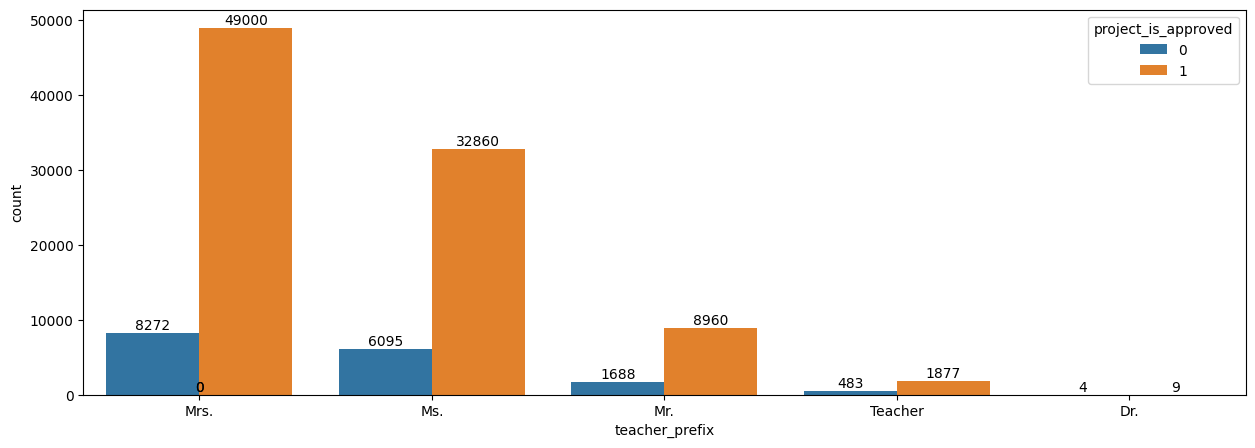

In [ ]:
plt.figure(figsize=(15, 5))
g = sns.countplot(data=df, x='teacher_prefix', hue='project_is_approved')
for p in g.patches:
    g.text(p.get_x() + p.get_width() / 2, p.get_height(), int(p.get_height()), ha='center', va='bottom')
plt.show()

In [ ]:
df['teacher_id'].value_counts()

teacher_id
fa2f220b537e8653fb48878ebb38044d    44
1f64dcec848be8e95c4482cc845706b2    42
df8a4b7ad173b57f7ac52e447cc24043    42
7b17c95da53e3d1f011f84232ad01238    34
ae67d8bbc64ec3bf7fd2db1297721160    33
                                    ..
304cc00e13df870fc1cddf61daef7b7d     1
8a81a0f39b5ab1b0325425e6e603466c     1
980fad5115c9cd1acabf7372cffb0894     1
02847fc657be0b5268bc80e2e79917db     1
cf5c9c6f50db79eccd01ca945945973d     1
Name: count, Length: 72168, dtype: int64

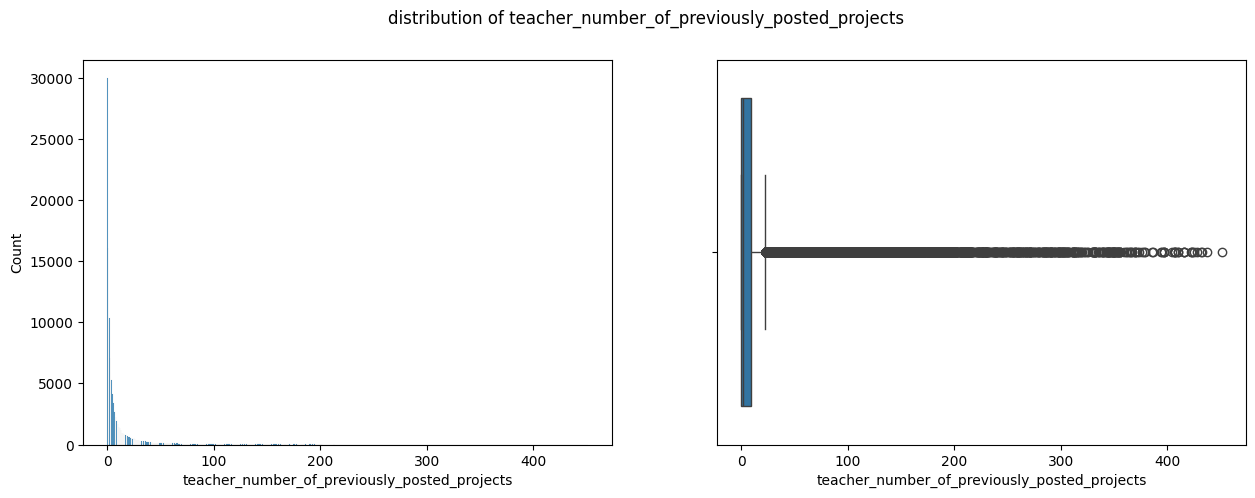

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
sns.histplot(data=df, x='teacher_number_of_previously_posted_projects', ax=ax[0])
sns.boxplot(data=df, x='teacher_number_of_previously_posted_projects', ax=ax[1])
plt.suptitle('distribution of teacher_number_of_previously_posted_projects')
plt.show()

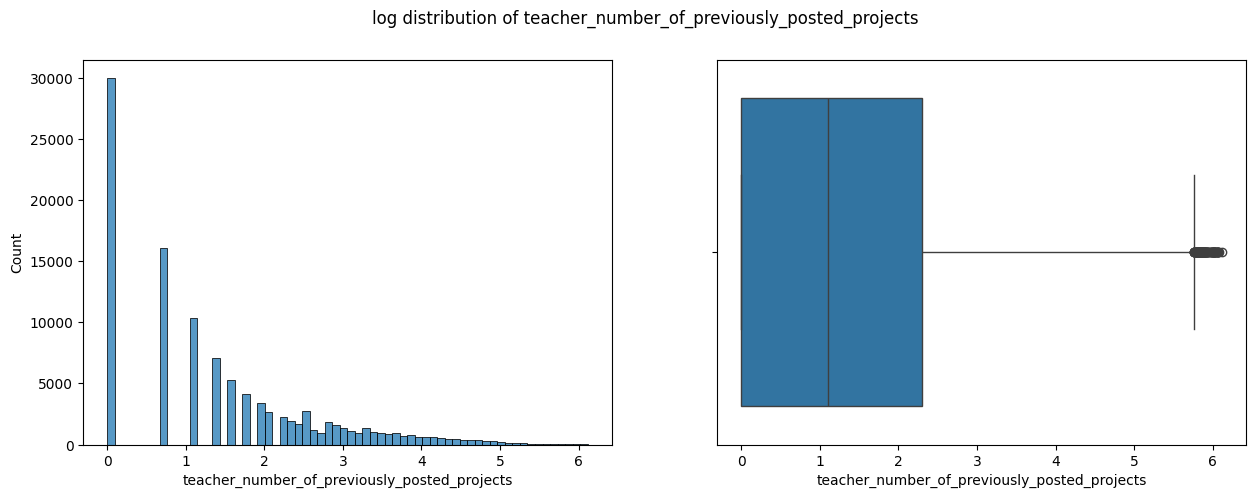

In [ ]:
log_teacher_exp_df = pd.DataFrame({
    'teacher_number_of_previously_posted_projects': np.log1p(df['teacher_number_of_previously_posted_projects']),
    'project_is_approved': df['project_is_approved'].astype('category')
})

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
sns.histplot(data=log_teacher_exp_df, x='teacher_number_of_previously_posted_projects', ax=ax[0])
sns.boxplot(data=log_teacher_exp_df, x='teacher_number_of_previously_posted_projects', ax=ax[1])
plt.suptitle('log distribution of teacher_number_of_previously_posted_projects')
plt.show()

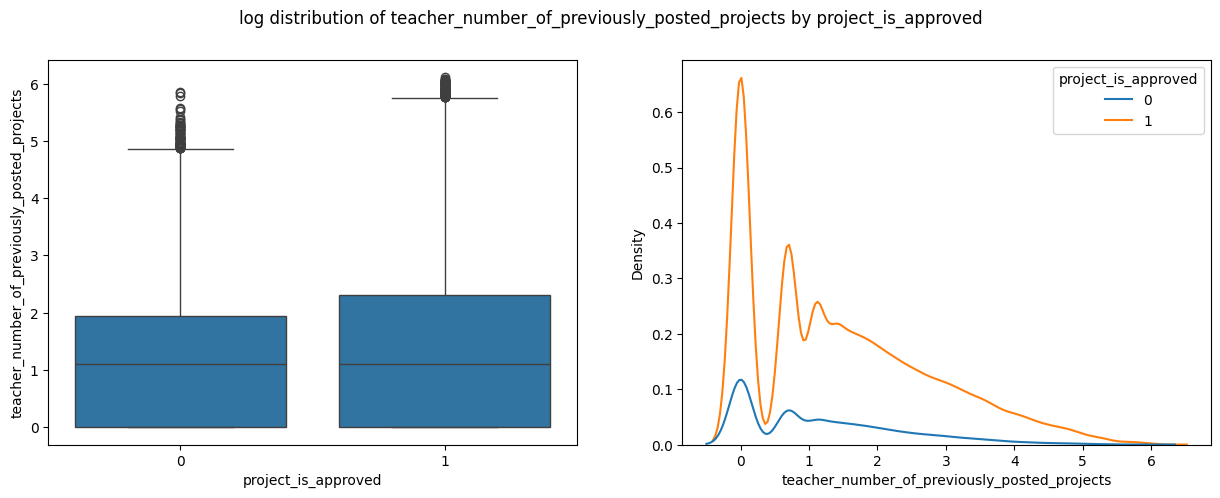

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
sns.boxplot(data=log_teacher_exp_df, y='teacher_number_of_previously_posted_projects', x='project_is_approved', ax=ax[0])
sns.kdeplot(data=log_teacher_exp_df, x='teacher_number_of_previously_posted_projects', hue='project_is_approved', ax=ax[1])
plt.suptitle('log distribution of teacher_number_of_previously_posted_projects by project_is_approved')
plt.show()

In [ ]:
ttest(df=log_teacher_exp_df,
      num_col='teacher_number_of_previously_posted_projects',
      cat_col='project_is_approved')

  project_is_approved  teacher_number_of_previously_posted_projects
0                   0                                      1.188520
1                   1                                      1.484312


numerical_column   categorical_column  \
0  teacher_number_of_previously_posted_projects  project_is_approved   

       means     t_stat        p_value variances  levene_stat      levene_p  \
0  different  29.395591  9.482921e-187   unequal   447.207909  4.622376e-99   

   cohens_d effect  
0   0.22557   Weak

In [ ]:
bins = [0, 1, 5, 10, 20, 50, 100, 200, np.inf]
labels = [
    '0',         # First project
    '1-4',       # New
    '5-9',       # Beginner+
    '10-19',     # Growing
    '20-49',     # Seasoned
    '50-99',     # Highly active
    '100-199',   # Veteran
    '200+'       # Exceptional long-term poster
]

df['teacher_experience'] = pd.cut(df['teacher_number_of_previously_posted_projects'],
                                 bins=bins, labels=labels, include_lowest=True)


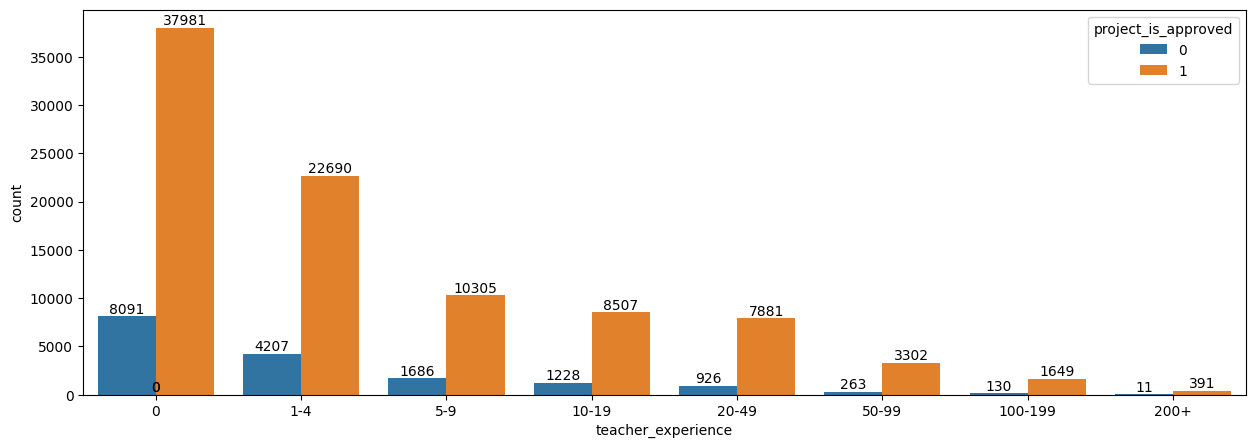

In [ ]:
plt.figure(figsize=(15, 5))
g = sns.countplot(data=df, x='teacher_experience', hue='project_is_approved')
for p in g.patches:
    g.text(p.get_x() + p.get_width() / 2, p.get_height(), int(p.get_height()), ha='center', va='bottom')
plt.show()

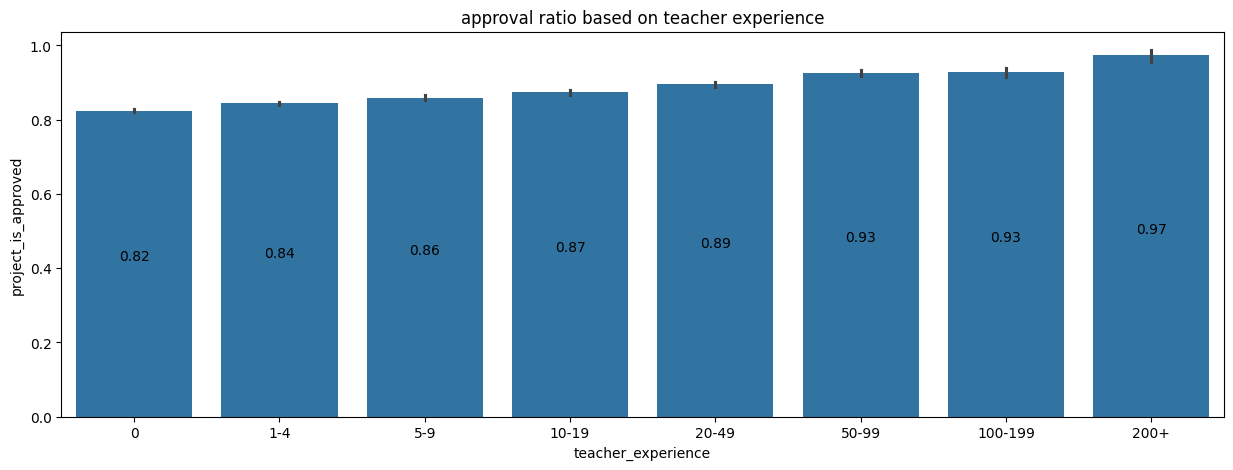

In [ ]:
# approval ratio based on teacher experience
plt.figure(figsize=(15, 5))
g = sns.barplot(data=df, x='teacher_experience', y='project_is_approved')
for p in g.patches:
    g.text(p.get_x() + p.get_width() / 2, p.get_height()/2, p.get_height().round(2), ha='center', va='bottom')
plt.title('approval ratio based on teacher experience')
plt.show()

In [ ]:
df.groupby('teacher_experience')['project_is_approved'].mean()

teacher_experience
0          0.824384
1-4        0.843589
5-9        0.859395
10-19      0.873857
20-49      0.894856
50-99      0.926227
100-199    0.926925
200+       0.972637
Name: project_is_approved, dtype: float64

In [ ]:
chisquare_test(df, columns=['teacher_id', 'teacher_prefix', 'teacher_experience'], target_col='project_is_approved')

project_is_approved               0  1
teacher_id                            
00000f7264c27ba6fea0c837ed6aa0aa  0  1
00002d44003ed46b066607c5455a999a  0  2
00006084c3d92d904a22e0a70f5c119a  0  2
0000a9af8b6b9cc9e41f53322a8b8cf1  0  1
0000d4777d14b33a1406dd6c9019fe89  0  1
...                              .. ..
fffb368120440683f9371494de10f308  1  0
fffe543adc962547e0666e53ae7c4773  0  2
ffff80baec08450113ceb12f068d9cb4  0  1
ffff8bee61b72c484b10e43aa9e35bc9  0  2
ffff8e040521f62207881376ecc964d5  0  1

[72168 rows x 2 columns] 

project_is_approved     0      1
teacher_prefix                  
Dr.                     4      9
Mr.                  1688   8960
Mrs.                 8272  49000
Ms.                  6095  32860
Teacher               483   1877 

project_is_approved     0      1
teacher_experience              
0                    8091  37981
1-4                  4207  22690
5-9                  1686  10305
10-19                1228   8507
20-49                 926   7881
5

category        p_value     chi2_stat  \
0          teacher_id   2.464681e-67  78938.730161   
1      teacher_prefix   3.197045e-18     88.186065   
2  teacher_experience  1.470607e-151    721.663325   

   project_is_approved_dependent_on_category  cramers_v      effect  
0                                          1   0.850038      Strong  
1                                          1   0.028411  Negligible  
2                                          1   0.081276  Negligible

In [ ]:
teacher_exp_df = df[['teacher_number_of_previously_posted_projects', 'project_is_approved']]
teacher_exp_df['teacher_exp'] = np.where(df['teacher_number_of_previously_posted_projects']==0, 'new', 'experienced')
teacher_exp_df.head()

teacher_number_of_previously_posted_projects  project_is_approved  \
0                                            53                    1   
1                                             4                    1   
2                                            10                    1   
3                                             2                    1   
4                                             2                    1   

   teacher_exp  
0  experienced  
1  experienced  
2  experienced  
3  experienced  
4  experienced

In [ ]:
ttest(df=teacher_exp_df,
      num_col='project_is_approved',
      cat_col='teacher_exp')

   teacher_exp  project_is_approved
0  experienced             0.858899
1          new             0.821350


numerical_column categorical_column      means     t_stat       p_value  \
0  project_is_approved        teacher_exp  different  14.821018  1.366658e-49   

  variances  levene_stat      levene_p  cohens_d effect  
0   unequal    239.38154  6.122098e-54  0.104866   Weak

* **Significant Class Imbalance:** The dataset is heavily skewed, with **84.9%** of projects approved and only **15.1%** rejected. This means models must be carefully evaluated to avoid simply "guessing" approval for every entry.
* **Experience Correlation:** Approval rates increase linearly with the number of previously posted projects. Teachers with **0 projects** have an **82%** success rate, while veteran users with **200+ projects** reach a **97%** success rate.
* **Volume vs. Risk:** The vast majority of submissions come from new or relatively inexperienced teachers (0–4 projects). While they provide the most volume, they also represent the highest proportion of rejections.
* **Teacher Prefixes:** **"Mrs."** and **"Ms."** are the most active contributors by a wide margin. Teachers using the generic prefix **"Teacher"** show a slightly lower approval ratio compared to traditional titles.
* **Skewed Data Distribution:** The distribution of previous projects is highly "right-skewed," with most teachers having under 10 projects and a few "power users" exceeding 400.
* **Data Preparation:** A **Log Transformation** effectively normalizes the "previous projects" feature, which is a necessary step for improving the performance of most machine learning algorithms.
* **Teacher identity is dominant:** `teacher_id` shows an extremely strong association with approval (Cramér’s V ≈ **0.85**) → approval is **highly teacher-dependent**.
* **Risk of leakage:** Using `teacher_id` directly in modeling will **inflate performance** and hurt generalization.
* **Teacher prefix is statistically significant but useless:** Very low effect size (V ≈ **0.03**) → significance driven by large sample size, **no practical impact**.
* **Teacher experience (binned) is weak:** Despite tiny p-value, effect size is **negligible (V ≈ 0.08)** → experience alone barely shifts approval odds.
* **Experienced teachers mostly get approved:** Sample rows show approvals = 1 even at low experience counts → approval is common regardless of experience.
* **Mean difference exists but is small:** t-test shows significant difference in approvals by experience, but **Cohen’s d ≈ 0.10 (weak)**.
* **Statistical vs practical gap:** Results highlight **statistical significance ≠ business significance**.
* **Actionable takeaway:** Model should capture **teacher behavior history (aggregated features)**, not raw IDs or simple experience bins.


### Project Submission time analysis

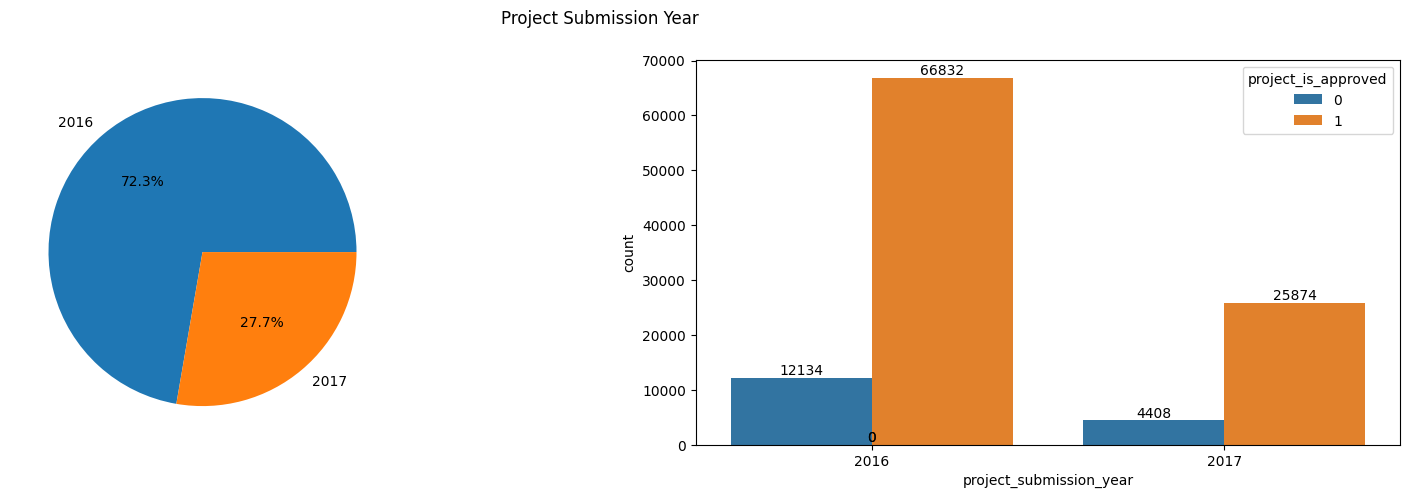

In [ ]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.pie(df['project_submission_year'].value_counts(),
        labels=df['project_submission_year'].value_counts().index,
        autopct='%1.1f%%')

plt.subplot(1, 2, 2)
g = sns.countplot(data=df, x='project_submission_year', hue='project_is_approved')
for p in g.patches:
    g.text(p.get_x() + p.get_width() / 2, p.get_height(), int(p.get_height()), ha='center', va='bottom')

plt.suptitle("Project Submission Year")
plt.show()

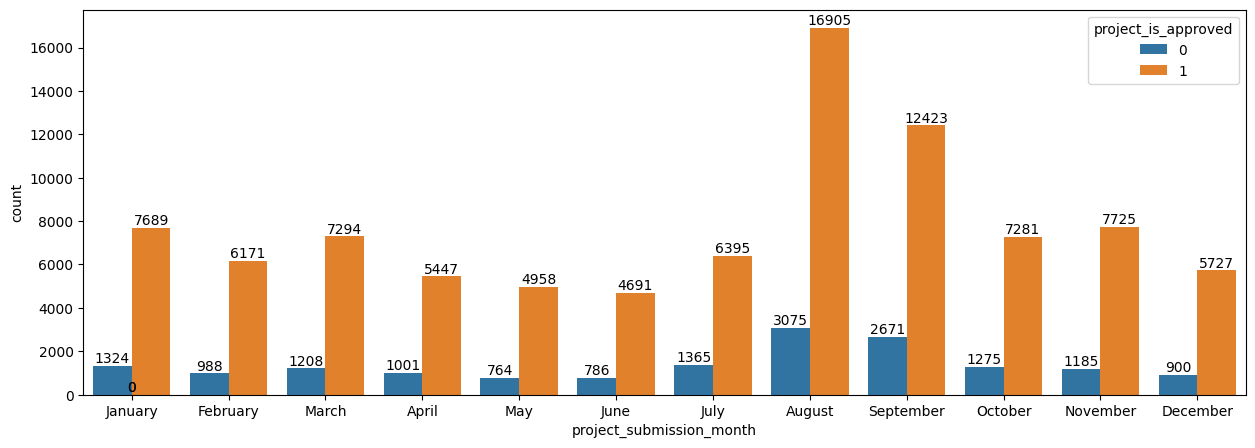

In [ ]:
months=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

plt.figure(figsize=(15, 5))
g = sns.countplot(data=df, x='project_submission_month', hue='project_is_approved', order=months)
for p in g.patches:
    g.text(p.get_x() + p.get_width() / 2, p.get_height(), int(p.get_height()), ha='center', va='bottom')
plt.show()

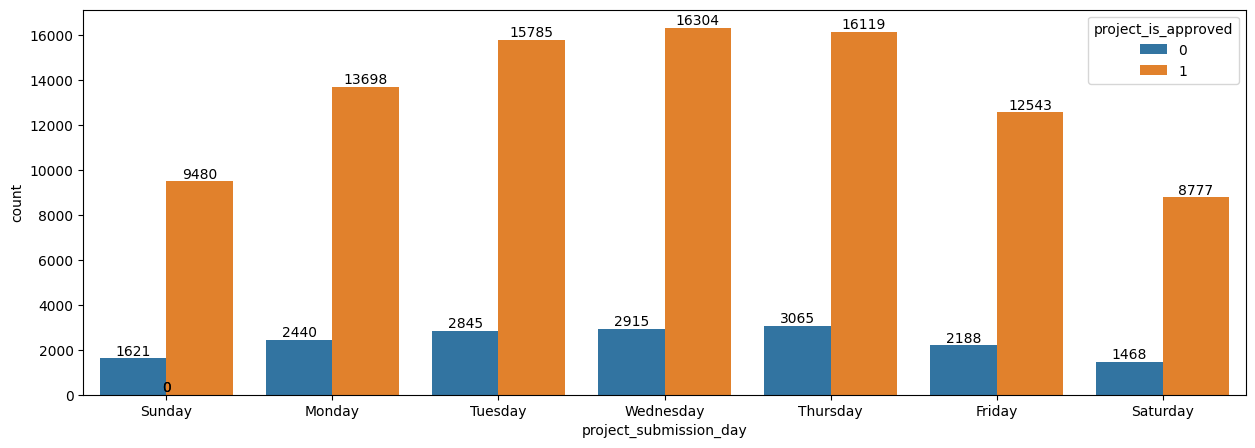

In [ ]:
days=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

plt.figure(figsize=(15, 5))
g = sns.countplot(data=df, x='project_submission_day', hue='project_is_approved', order=days)
for p in g.patches:
    g.text(p.get_x() + p.get_width() / 2, p.get_height(), int(p.get_height()), ha='center', va='bottom')
plt.show()

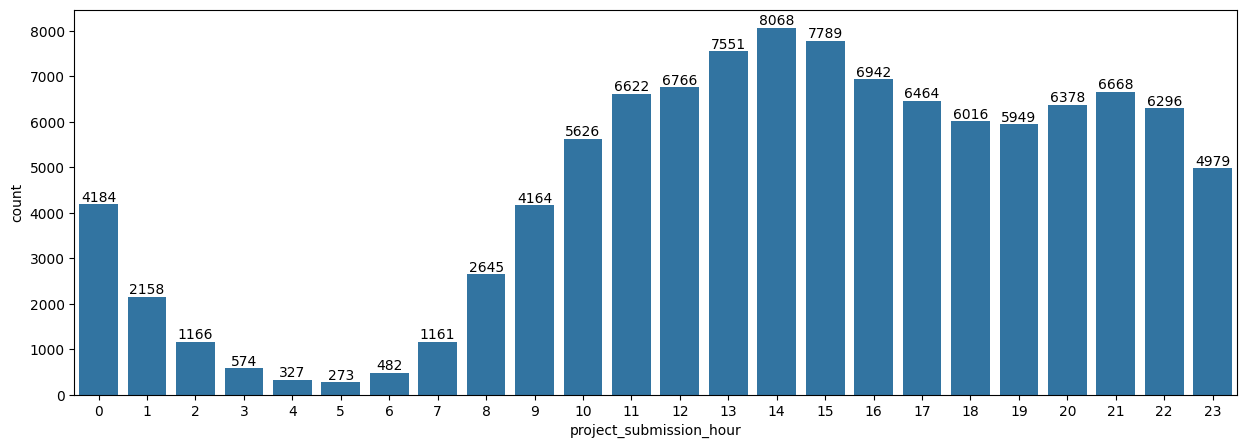

In [ ]:
plt.figure(figsize=(15, 5))
g = sns.countplot(data=df, x='project_submission_hour')
for p in g.patches:
    g.text(p.get_x() + p.get_width() / 2, p.get_height(), int(p.get_height()), ha='center', va='bottom')
plt.show()

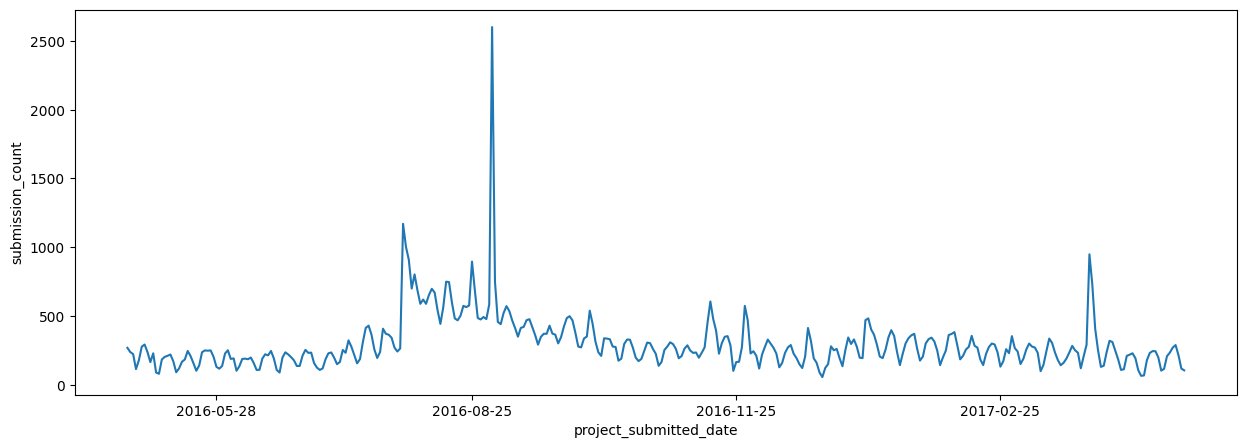

In [ ]:
import matplotlib.dates as mdates

submission_count_by_date = df.groupby('project_submitted_date').size().reset_index(name='submission_count')

plt.figure(figsize=(15, 5))
sns.lineplot(data=submission_count_by_date, x='project_submitted_date', y='submission_count')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.show()

In [ ]:
date_cols = ['project_submission_year', 'project_submission_month', 'project_submission_day', 'project_submission_hour']

chisquare_test(df, columns=date_cols, target_col='project_is_approved')

project_is_approved          0      1
project_submission_year              
2016                     12134  66832
2017                      4408  25874 

project_is_approved          0      1
project_submission_month             
April                     1001   5447
August                    3075  16905
December                   900   5727
February                   988   6171
January                   1324   7689
July                      1365   6395
June                       786   4691
March                     1208   7294
May                        764   4958
November                  1185   7725
October                   1275   7281
September                 2671  12423 

project_is_approved        0      1
project_submission_day             
Friday                  2188  12543
Monday                  2440  13698
Saturday                1468   8777
Sunday                  1621   9480
Thursday                3065  16119
Tuesday                 2845  15785
Wednesday               

category       p_value   chi2_stat  \
0   project_submission_year  8.619551e-04   11.102842   
1  project_submission_month  8.830142e-34  185.154744   
2    project_submission_day  3.526575e-03   19.408505   
3   project_submission_hour  1.534661e-03   48.292661   

   project_is_approved_dependent_on_category  cramers_v      effect  
0                                          1   0.010081  Negligible  
1                                          1   0.041168  Negligible  
2                                          1   0.013329  Negligible  
3                                          1   0.021025  Negligible

In [ ]:
chisquare_test(df, columns=date_cols, target_col='teacher_id', table=False)

category        p_value     chi2_stat  \
0   project_submission_year   2.174243e-19  7.561142e+04   
1  project_submission_month  2.647994e-318  8.428464e+05   
2    project_submission_day   9.346121e-53  4.473404e+05   
3   project_submission_hour   7.774609e-11  1.671528e+06   

   teacher_id_dependent_on_category  cramers_v  effect  
0                                 1   0.831930  Strong  
1                                 1   0.837474  Strong  
2                                 1   0.826108  Strong  
3                                 1   0.815617  Strong

* **Massive Seasonal Surge:** Submissions and approvals peak dramatically in **August** (16,905 approved) due to the back-to-school season.
* **Weekly Rhythm:** Project activity is highest mid-week, peaking on **Wednesday** (16,304 approved) and **Thursday**, while dropping significantly on weekends.
* **Peak Submission Hour:** Teachers are most active during the day, with submissions peaking at **2:00 PM (14:00)**.
* **Annual Data Split:** The dataset is predominantly composed of projects from **2016** (72.3%) compared to 2017 (27.7%).
* **Consistent Approval Ratio:** Despite large fluctuations in volume (daily spikes and seasonal peaks), the approval-to-rejection ratio remains relatively stable.
* **Time has negligible impact on approval:** Year, month, day, and hour are statistically significant but all have **near-zero effect sizes (Cramér’s V < 0.05)** → timing does **not meaningfully influence approval**.
* **Seasonality ≠ approval driver:** Even strong month-level significance does **not translate to practical approval differences**.
* **Teacher timing is highly structured:** Submission time is **strongly dependent on teacher_id** (Cramér’s V ≈ **0.82–0.84**) → teachers submit at **consistent personal times**.
* **Hidden confounding:** Apparent temporal patterns mostly reflect **teacher behavior**, not system preference.

### School State

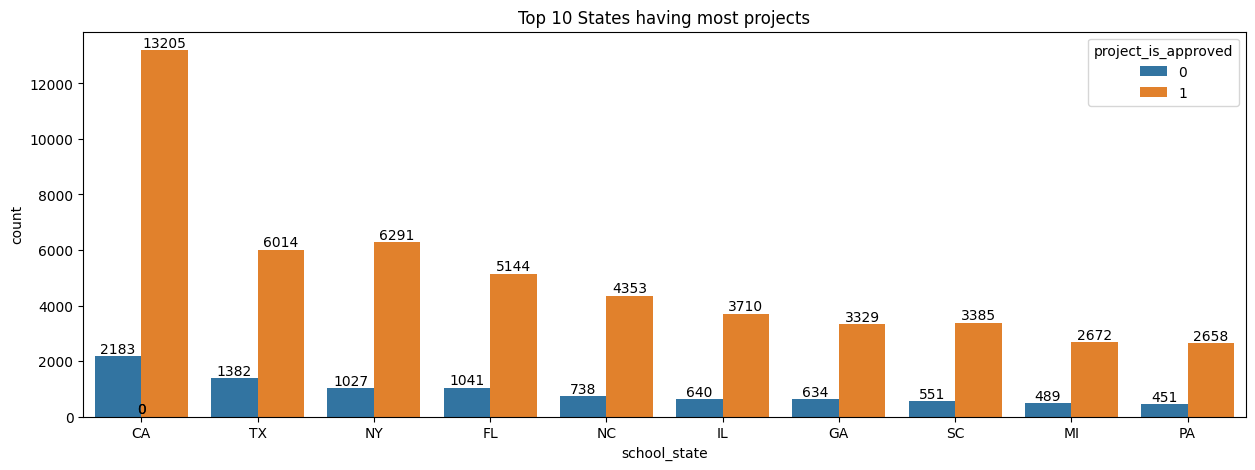

In [ ]:
plt.figure(figsize=(15, 5))

top_10_states = df['school_state'].value_counts().head(10).index

g = sns.countplot(data=df[df['school_state'].isin(top_10_states)],
                  order=top_10_states,
                  x='school_state',
                  hue='project_is_approved')
for p in g.patches:
    g.text(p.get_x() + p.get_width() / 2, p.get_height(), int(p.get_height()), ha='center', va='bottom')

plt.title("Top 10 States having most projects")
plt.show()

In [ ]:
# approval rate by state
state_approval_rate = df.groupby('school_state')['project_is_approved'].mean().reset_index()

# visualize map of states with approval rate
import plotly.express as px


# Create the choropleth map
fig = px.choropleth(
    state_approval_rate,
    locations='school_state',
    locationmode='USA-states',
    color='project_is_approved',
    hover_name='school_state',
    color_continuous_scale='Viridis',
    scope='usa',
    title='Approval Rates by State'
)


# Update layout and display map
fig.update_layout(
    geo=dict(showframe=False, showcoastlines=True, projection_type='albers usa'),
    margin=dict(l=10, r=10, t=50, b=10)
)

fig.show()


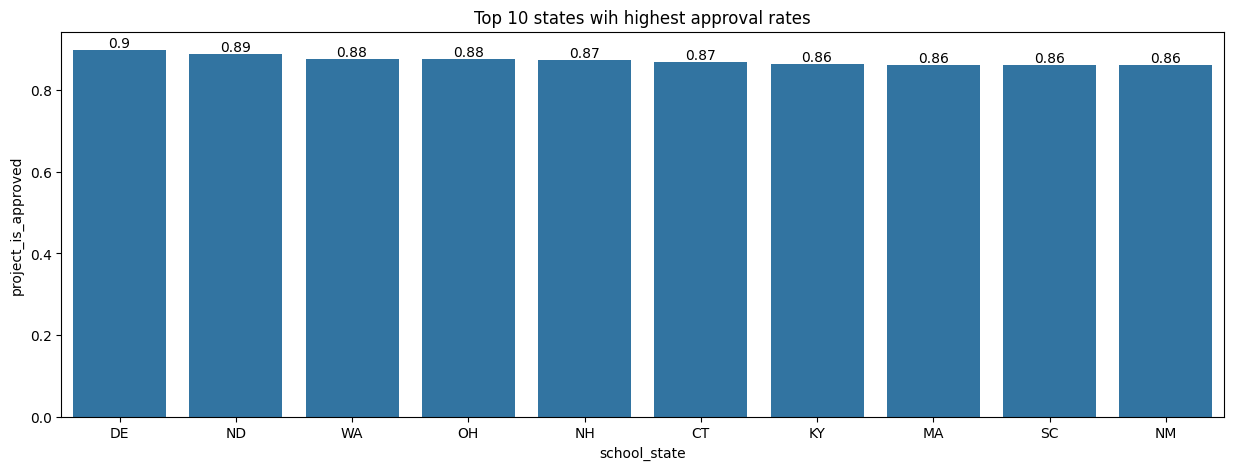

In [ ]:
# top 10 state with approval rate
state_approval_rate = state_approval_rate.sort_values(by='project_is_approved', ascending=False)

plt.figure(figsize=(15, 5))
g = sns.barplot(data=state_approval_rate.head(10), x='school_state', y='project_is_approved')
for p in g.patches:
    g.text(p.get_x() + p.get_width() /2, p.get_height(), round(p.get_height(), 2), ha='center', va='bottom')
plt.title('Top 10 states wih highest approval rates')
plt.show()

In [ ]:
chisquare_test(df, columns='school_state', target_col='project_is_approved')

project_is_approved     0      1
school_state                    
AK                     55    290
AL                    256   1506
AR                    177    872
AZ                    347   1800
CA                   2183  13205
CO                    176    935
CT                    218   1445
DC                    102    414
DE                     35    308
FL                   1041   5144
GA                    634   3329
HI                     73    434
IA                     98    568
ID                    114    579
IL                    640   3710
IN                    406   2214
KS                    102    532
KY                    178   1126
LA                    404   1990
MA                    334   2055
MD                    244   1270
ME                     77    428
MI                    489   2672
MN                    172   1036
MO                    374   2202
MS                    205   1118
MT                     45    200
NC                    738   4353
ND        

category       p_value   chi2_stat  \
0  school_state  3.326378e-19  196.206742   

   project_is_approved_dependent_on_category  cramers_v      effect  
0                                          1   0.042379  Negligible

* **Highest Submission Volume:** **California (CA)** is the clear leader in total project volume, with **13,205** approved projects. Other high-volume states include Texas (TX), New York (NY), and Florida (FL).
* **Top Approval Rates:** While CA has the most projects, **Delaware (DE)** holds the highest approval rate at **0.9 (90%)**. North Dakota (ND) follows closely at **0.89**.
* **Statistical Impact:** The Chi-square test confirms that project approval is dependent on the school state. However, the **Cramer's V** value of **0.042** indicates that the actual strength of this association is **negligible**.

### Grade

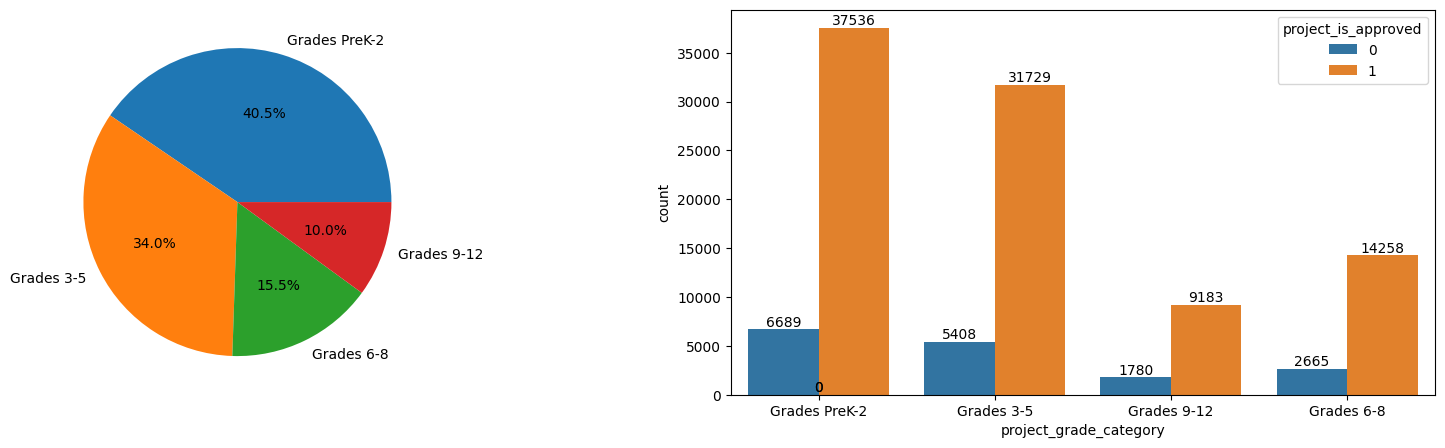

In [ ]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.pie(df['project_grade_category'].value_counts(),
        labels=df['project_grade_category'].value_counts().index,
        autopct='%1.1f%%')

plt.subplot(1, 2, 2)
g = sns.countplot(data=df, x='project_grade_category', hue='project_is_approved')
for p in g.patches:
    g.text(p.get_x() + p.get_width() / 2, p.get_height(), int(p.get_height()), ha='center', va='bottom')

In [ ]:
chisquare_test(df, columns='project_grade_category', target_col='project_is_approved')

project_is_approved        0      1
project_grade_category             
Grades 3-5              5408  31729
Grades 6-8              2665  14258
Grades 9-12             1780   9183
Grades PreK-2           6689  37536 



category   p_value  chi2_stat  \
0  project_grade_category  0.000017  24.776179   

   project_is_approved_dependent_on_category  cramers_v      effect  
0                                          1   0.015059  Negligible

* **Dominant Groups:** **Grades PreK-2** is the largest category, accounting for **40.5%** of all projects. **Grades 3-5** follow closely with **34.0%**.
* **High School vs. Elementary:** High school projects (**Grades 9-12**) represent only **10.0%** of total submissions.
* **Approval Consistency:** Despite the large volume differences, the approval-to-rejection ratio remains relatively consistent across all grades. Statistical analysis shows that while approval is technically dependent on the grade category, the actual effect size is **negligible**.

### Project Categories

In [ ]:
proj_cat = df['project_subject_categories'].str.get_dummies(sep=', ')
proj_cat['approval_status'] = df['project_is_approved']
proj_cat.head()

Applied Learning  Care & Hunger  Health & Sports  History & Civics  \
0                 0              0                0                 0   
1                 0              0                0                 0   
2                 0              0                0                 0   
3                 1              0                0                 0   
4                 0              0                0                 0   

   Literacy & Language  Math & Science  Music & The Arts  Special Needs  \
0                    0               1                 0              0   
1                    0               0                 0              1   
2                    1               0                 0              0   
3                    0               0                 0              0   
4                    1               0                 0              0   

   Warmth  approval_status  
0       0                1  
1       0                1  
2       0                1  
3       0                1  
4       0                1

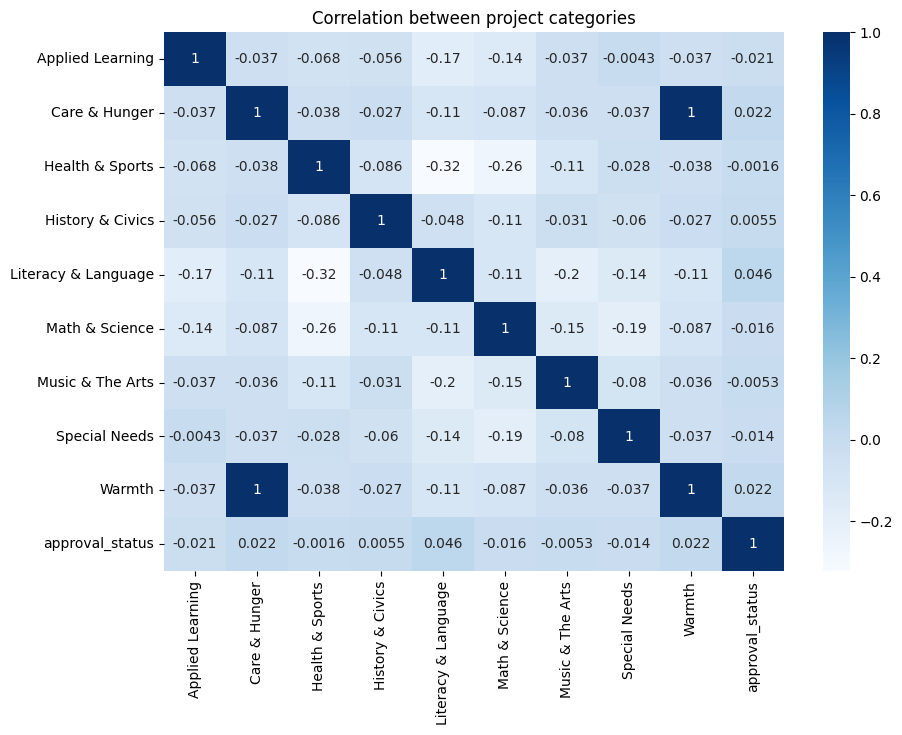

In [ ]:
plt.figure(figsize=(10, 7))
sns.heatmap(proj_cat.corr(), cmap='Blues', annot=True)
plt.title('Correlation between project categories')
plt.show()

In [ ]:
cols = proj_cat.columns[:-1]
proj_cat_df = proj_cat.groupby('approval_status')[cols].sum().reset_index()
proj_cat_df

approval_status  Applied Learning  Care & Hunger  Health & Sports  \
0                0              2093            114             2175   
1                1             10042           1274            12048   

   History & Civics  Literacy & Language  Math & Science  Music & The Arts  \
0               847                 7006            6577              1619   
1              5067                45233           34844              8674   

   Special Needs  Warmth  
0           2252     114  
1          11390    1274

In [ ]:
proj_cat_df_reordered = proj_cat_df.T.sort_values(by=1, ascending=False).head(10)
proj_cat_df_reordered

0      1
Literacy & Language  7006  45233
Math & Science       6577  34844
Health & Sports      2175  12048
Special Needs        2252  11390
Applied Learning     2093  10042
Music & The Arts     1619   8674
History & Civics      847   5067
Care & Hunger         114   1274
Warmth                114   1274
approval_status         0      1

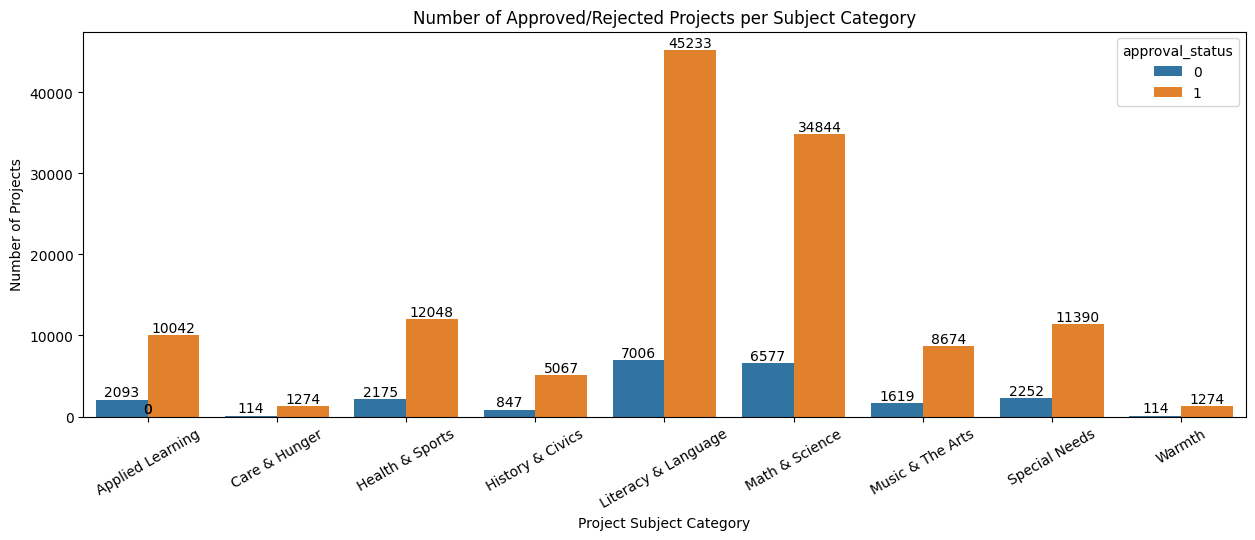

In [ ]:
# Melt the DataFrame to long format for easier plotting with seaborn
proj_cat_melted = proj_cat_df.melt(id_vars='approval_status',
                                   var_name='category',
                                   value_name='count')

plt.figure(figsize=(15, 5))
g = sns.barplot(data=proj_cat_melted, x='category', y='count', hue='approval_status')
for p in g.patches:
    g.text(p.get_x() + p.get_width() / 2, p.get_height(), int(p.get_height()), ha='center', va='bottom')

plt.xticks(rotation=30)
plt.ylabel('Number of Projects')
plt.xlabel('Project Subject Category')
plt.title('Number of Approved/Rejected Projects per Subject Category')
plt.show()

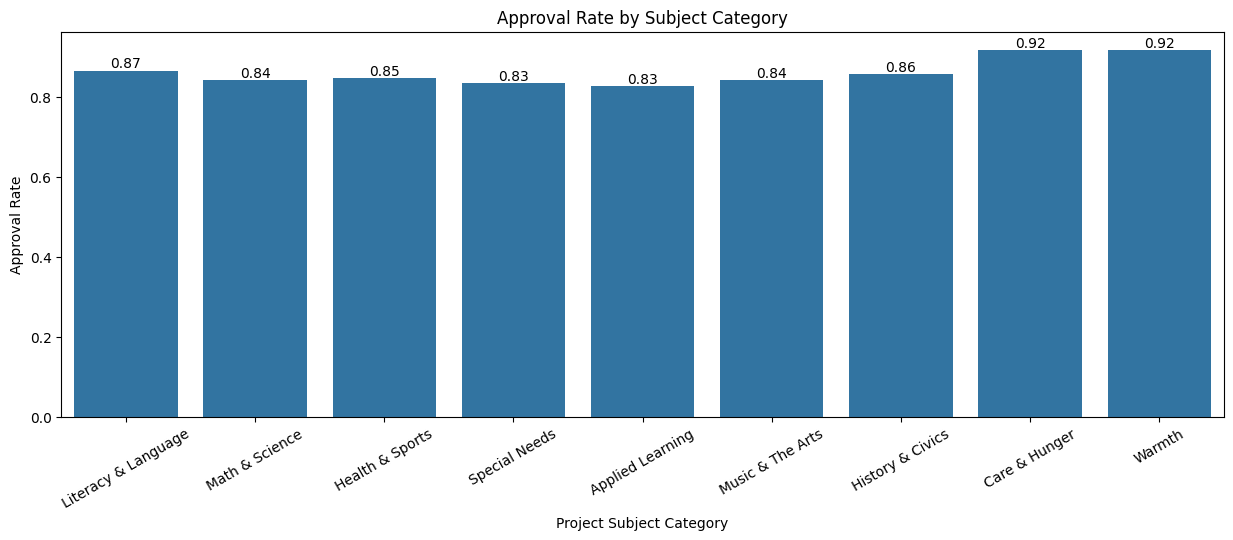

In [ ]:
# approval rate by project category
proj_cat_df_reordered['approval_rate'] = proj_cat_df_reordered[1] / (proj_cat_df_reordered[0] + proj_cat_df_reordered[1])
proj_cat_df_reordered = proj_cat_df_reordered.iloc[:-1]
plt.figure(figsize=(15, 5))
g = sns.barplot(data=proj_cat_df_reordered.reset_index(), x='index', y='approval_rate')
for p in g.patches:
    g.text(p.get_x() + p.get_width() / 2, p.get_height(), p.get_height().round(2), ha='center', va='bottom')

plt.xticks(rotation=30)
plt.ylabel('Approval Rate')
plt.xlabel('Project Subject Category')
plt.title('Approval Rate by Subject Category')
plt.show()

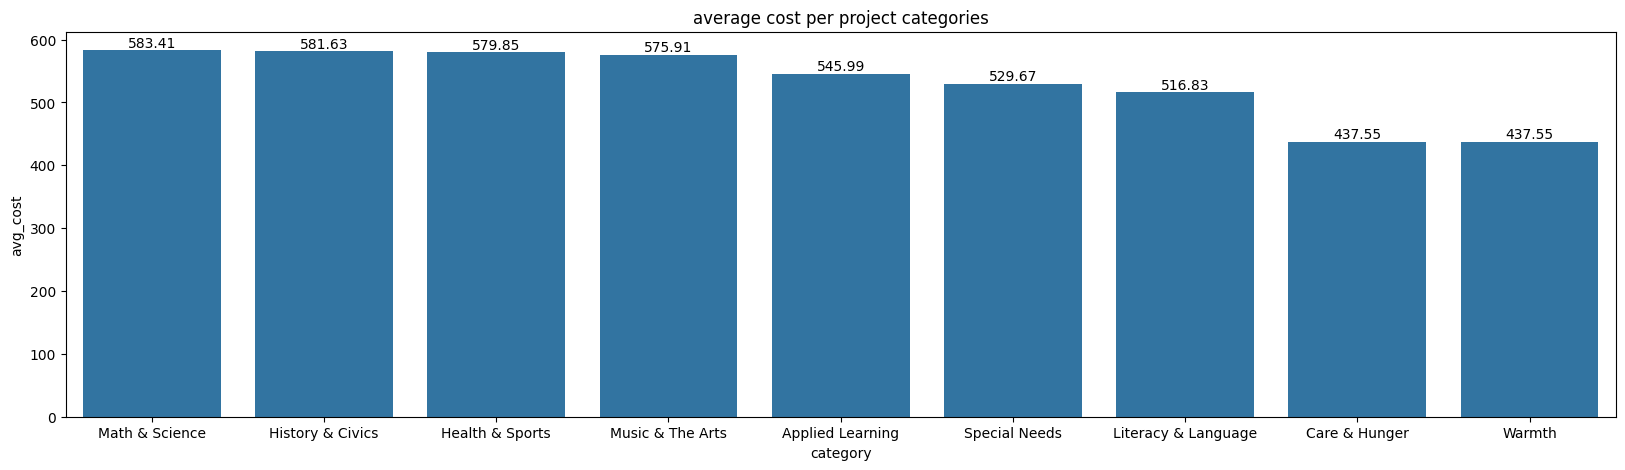

In [ ]:
proj_cat['total_project_cost'] = df['total_resource_cost'].copy()

# average cost per category
cols = proj_cat.columns[:-2]

category = []
avg_cost = []
for col in cols:
  category.append(col)
  avg_cost.append(proj_cat[proj_cat[col] == 1]['total_project_cost'].mean())

proj_cat_cost_df = pd.DataFrame({'category': category, 'avg_cost': avg_cost})
proj_cat_cost_df = proj_cat_cost_df.sort_values(by='avg_cost', ascending=False)

# bar plot for average cost per category
plt.figure(figsize=(20, 5))
g = sns.barplot(data=proj_cat_cost_df, x='category', y='avg_cost')
for p in g.patches:
  g.text(p.get_x() + p.get_width() / 2, p.get_height(), round(p.get_height(), 2), ha='center', va='bottom')

plt.title('average cost per project categories')
plt.show()

In [ ]:
cols = proj_cat.columns[:-2]
chisquare_test(proj_cat, cols, target_col='approval_status')

approval_status       0      1
Applied Learning              
0                 14449  82664
1                  2093  10042 

approval_status      0      1
Care & Hunger                
0                16428  91432
1                  114   1274 

approval_status      0      1
Health & Sports              
0                14367  80658
1                 2175  12048 

approval_status       0      1
History & Civics              
0                 15695  87639
1                   847   5067 

approval_status         0      1
Literacy & Language             
0                    9536  47473
1                    7006  45233 

approval_status     0      1
Math & Science              
0                9965  57862
1                6577  34844 

approval_status       0      1
Music & The Arts              
0                 14923  84032
1                  1619   8674 

approval_status      0      1
Special Needs                
0                14290  81316
1                 2252  11390 

appr

category       p_value   chi2_stat  \
0     Applied Learning  7.338451e-12   46.934892   
1        Care & Hunger  5.613579e-13   51.977656   
2      Health & Sports  6.001931e-01    0.274705   
3     History & Civics  7.350936e-02    3.202866   
4  Literacy & Language  1.327954e-52  232.990496   
5       Math & Science  1.158212e-07   28.089690   
6     Music & The Arts  8.317837e-02    3.001677   
7        Special Needs  2.077937e-06   22.521602   
8               Warmth  5.613579e-13   51.977656   

   approval_status_dependent_on_category  cramers_v      effect  
0                                      1   0.020727  Negligible  
1                                      1   0.021812  Negligible  
2                                      0   0.001586  Negligible  
3                                      0   0.005415  Negligible  
4                                      1   0.046181  Negligible  
5                                      1   0.016035  Negligible  
6                                      0   0.005242  Negligible  
7                                      1   0.014358  Negligible  
8                                      1   0.021812  Negligible

* **Volume Leaders:** **Literacy & Language** is the most popular category by a massive margin, with 45,233 approved projects. **Math & Science** follows as the second most active category with 34,844 approvals.
* **Highest Approval Rates:** While high-volume categories have solid success rates, the niche categories **Care & Hunger** and **Warmth** boast the highest individual approval probability at **92%**.
* **Statistical Independence:** Although some categories show statistically significant dependencies (p-values < 0.05), the **Cramer's V** values for all categories are below 0.05, indicating the subject category has a **negligible effect** on the final approval status.
* **Most Expensive Categories:** **Math & Science** projects require the highest funding on average at **USD 583.41**, followed closely by History & Civics and Health & Sports.
* **Most Affordable Projects:** The categories with the highest approval rates (**Care & Hunger** and **Warmth**) are also the most affordable, with an identical average cost of **USD 437.55**.
* **Funding Strategy:** There appears to be an inverse relationship between project cost and approval rate; lower-cost essential categories (Warmth, Hunger) are approved more frequently than higher-cost technical ones (Math & Science).
* **Yearly Volume Shift:** **2016** accounted for the vast majority of the dataset with **72.3%** of projects (66,832 approved) compared to only 27.7% in 2017.
* **Category Overlap:** The correlation heatmap reveals a perfect correlation (1.0) between **Care & Hunger** and **Warmth**, suggesting these categories are almost always selected together by teachers.
* **Literacy Correlation:** Literacy & Language shows a slight negative correlation with Math & Science (-0.11), suggesting teachers typically focus their funding requests on one of these core pillars rather than both simultaneously.

### Project Sub categories

In [ ]:
proj_sub_cat = df['project_subject_subcategories'].str.get_dummies(sep=', ')
proj_sub_cat['approval_status'] = df['project_is_approved']
proj_sub_cat.head()

Applied Sciences  Care & Hunger  Character Education  Civics & Government  \
0                 1              0                    0                    0   
1                 0              0                    0                    0   
2                 0              0                    0                    0   
3                 0              0                    0                    0   
4                 0              0                    0                    0   

   College & Career Prep  Community Service  ESL  Early Development  \
0                      0                  0    0                  0   
1                      0                  0    0                  0   
2                      0                  0    0                  0   
3                      0                  0    0                  1   
4                      0                  0    0                  0   

   Economics  Environmental Science  ...  Nutrition Education  Other  \
0          0                      0  ...                    0      0   
1          0                      0  ...                    0      0   
2          0                      0  ...                    0      0   
3          0                      0  ...                    0      0   
4          0                      0  ...                    0      0   

   Parent Involvement  Performing Arts  Social Sciences  Special Needs  \
0                   0                0                0              0   
1                   0                0                0              1   
2                   0                0                0              0   
3                   0                0                0              0   
4                   0                0                0              0   

   Team Sports  Visual Arts  Warmth  approval_status  
0            0            0       0                1  
1            0            0       0                1  
2            0            0       0                1  
3            0            0       0                1  
4            0            0       0                1  

[5 rows x 31 columns]

In [ ]:
proj_sub_cat.corr()['approval_status'].sort_values(ascending=False)

approval_status          1.000000
Literacy                 0.045600
Care & Hunger            0.021926
Warmth                   0.021926
Music                    0.015914
Literature & Writing     0.014365
Health & Wellness        0.012673
Social Sciences          0.005387
Performing Arts          0.005372
History & Geography      0.003825
ESL                      0.001986
Parent Involvement       0.001793
Civics & Government     -0.000177
Financial Literacy      -0.000708
Economics               -0.001169
Gym & Fitness           -0.002087
Mathematics             -0.002578
Extracurricular         -0.004272
College & Career Prep   -0.005421
Other                   -0.009433
Foreign Languages       -0.010011
Nutrition Education     -0.011266
Health & Life Science   -0.012270
Community Service       -0.012575
Early Development       -0.012919
Special Needs           -0.014397
Character Education     -0.016375
Environmental Science   -0.017896
Visual Arts             -0.018697
Applied Sciences        -0.019774
Team Sports             -0.022781
Name: approval_status, dtype: float64

In [ ]:
cols = proj_sub_cat.columns[:-1]
proj_sub_cat_df = proj_sub_cat.groupby('approval_status')[cols].sum()
proj_sub_cat_df

Applied Sciences  Care & Hunger  Character Education  \
approval_status                                                         
0                            1869            114                  400   
1                            8947           1274                 1665   

                 Civics & Government  College & Career Prep  \
approval_status                                               
0                                124                    421   
1                                691                   2147   

                 Community Service   ESL  Early Development  Economics  \
approval_status                                                          
0                               98   646                742         43   
1                              343  3721               3512        226   

                 Environmental Science  ...  Music  Nutrition Education  \
approval_status                         ...                               
0                                 1001  ...    372                  254   
1                                 4590  ...   2773                 1101   

                 Other  Parent Involvement  Performing Arts  Social Sciences  \
approval_status                                                                
0                  413                  97              269              263   
1                 1959                 580             1692             1657   

                 Special Needs  Team Sports  Visual Arts  Warmth  
approval_status                                                   
0                         2252          457         1121     114  
1                        11390         1735         5157    1274  

[2 rows x 30 columns]

In [ ]:
proj_sub_cat_df_t10 = proj_sub_cat_df.T.sort_values(by=1, ascending=False).head(10)
proj_sub_cat_df_t10

approval_status           0      1
Literacy               4278  29422
Mathematics            4295  23779
Literature & Writing   3132  19047
Special Needs          2252  11390
Applied Sciences       1869   8947
Health & Wellness      1405   8829
Visual Arts            1121   5157
Environmental Science  1001   4590
Gym & Fitness           699   3810
ESL                     646   3721

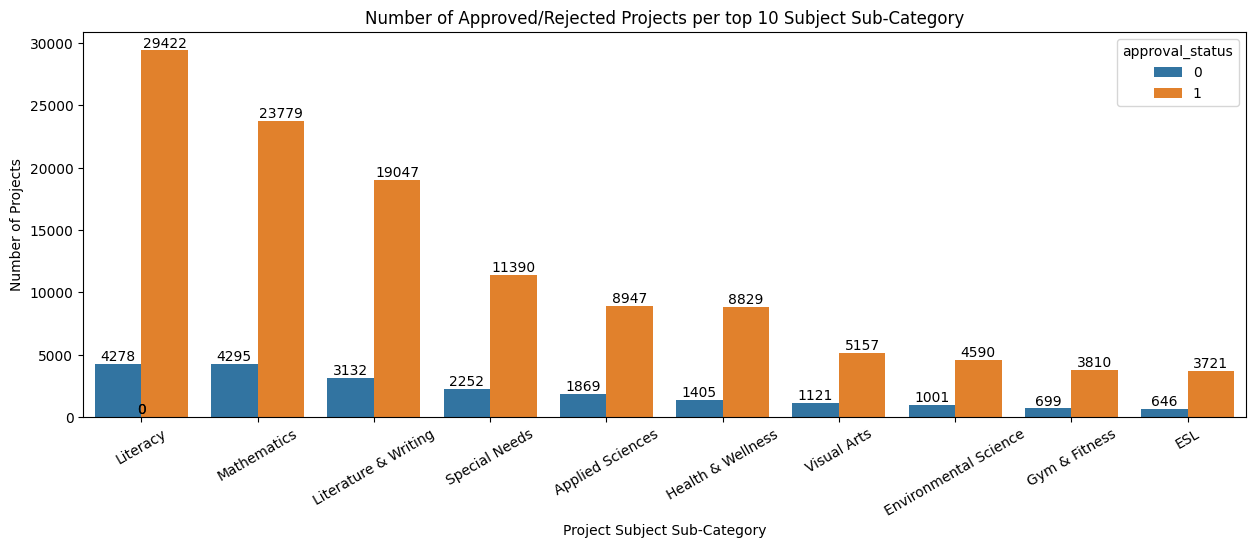

In [ ]:
# Melt the DataFrame to long format for easier plotting
proj_sub_cat_melted = proj_sub_cat_df_t10.reset_index().melt(
    id_vars='index',
    value_vars=[0, 1],
    var_name='approval_status',
    value_name='count'
)

proj_sub_cat_melted = proj_sub_cat_melted.rename(columns={'index': 'category'})

plt.figure(figsize=(15, 5))
g = sns.barplot(data=proj_sub_cat_melted, x='category', y='count', hue='approval_status')
for p in g.patches:
    g.text(p.get_x() + p.get_width() / 2, p.get_height(), int(p.get_height()), ha='center', va='bottom')

plt.xticks(rotation=30)
plt.ylabel('Number of Projects')
plt.xlabel('Project Subject Sub-Category')
plt.title('Number of Approved/Rejected Projects per top 10 Subject Sub-Category')
plt.show()

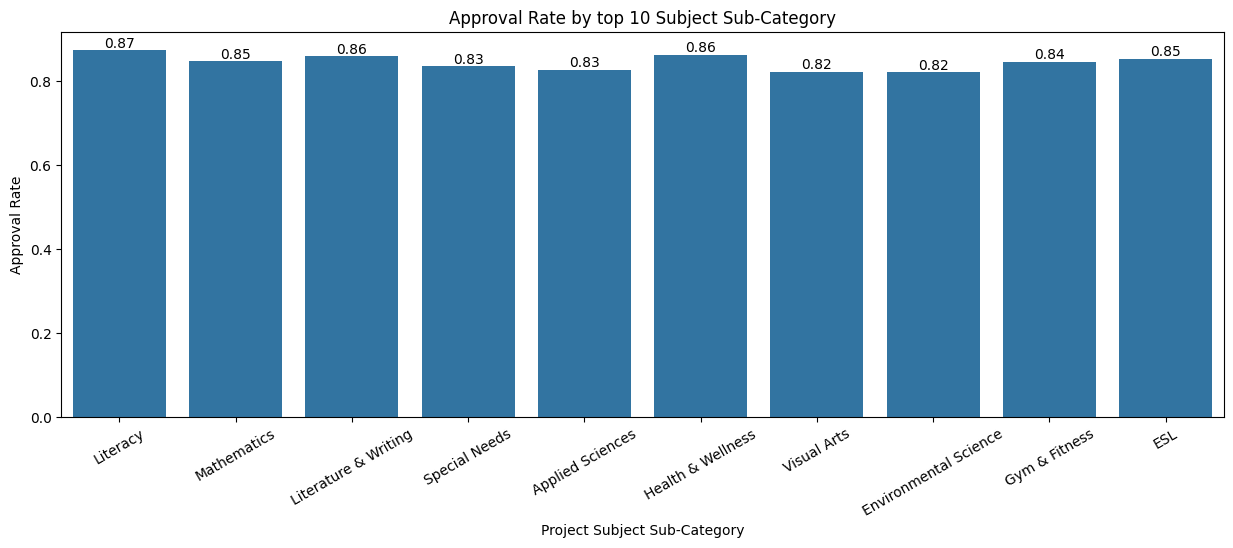

In [ ]:
# approval rate by project sub-category
proj_sub_cat_df_t10['approval_rate'] = proj_sub_cat_df_t10[1] / (proj_sub_cat_df_t10[0] + proj_sub_cat_df_t10[1])

plt.figure(figsize=(15, 5))
g = sns.barplot(data=proj_sub_cat_df_t10.reset_index(), x='index', y='approval_rate')
for p in g.patches:
    g.text(p.get_x() + p.get_width() / 2, p.get_height(), p.get_height().round(2), ha='center', va='bottom')

plt.xticks(rotation=30)
plt.ylabel('Approval Rate')
plt.xlabel('Project Subject Sub-Category')
plt.title('Approval Rate by top 10 Subject Sub-Category')
plt.show()

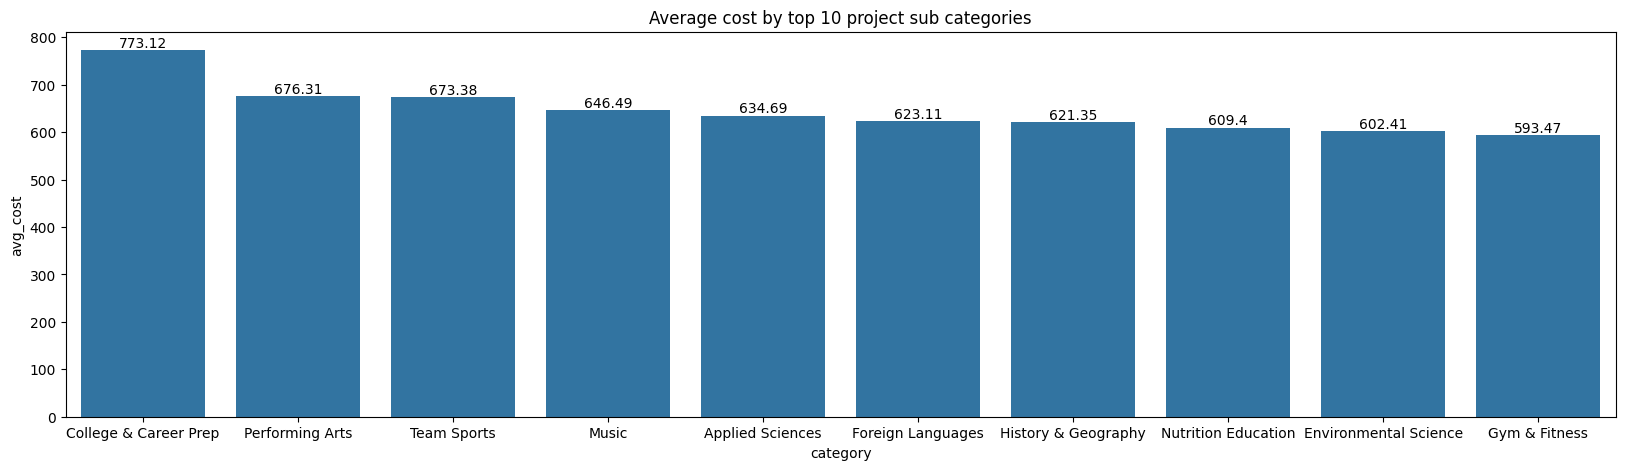

In [ ]:
proj_sub_cat['total_project_cost'] = df['total_resource_cost'].copy()

# average cost per category
cols = proj_sub_cat.columns[:-2]

category = []
avg_cost = []
for col in cols:
  category.append(col)
  avg_cost.append(proj_sub_cat[proj_sub_cat[col] == 1]['total_project_cost'].mean())

proj_sub_cat_cost_df = pd.DataFrame({'category': category, 'avg_cost': avg_cost})
proj_sub_cat_cost_df = proj_sub_cat_cost_df.sort_values(by='avg_cost', ascending=False)

# bar plot for top 10 sub categories average cost
plt.figure(figsize=(20, 5))
g = sns.barplot(data=proj_sub_cat_cost_df.head(10), x='category', y='avg_cost')
for p in g.patches:
  g.text(p.get_x() + p.get_width() / 2, p.get_height(), round(p.get_height(), 2), ha='center', va='bottom')

plt.title('Average cost by top 10 project sub categories')
plt.show()

In [ ]:
cols = proj_sub_cat.columns[:-2]
chisquare_test(proj_sub_cat, cols,target_col='approval_status')

approval_status       0      1
Applied Sciences              
0                 14673  83759
1                  1869   8947 

approval_status      0      1
Care & Hunger                
0                16428  91432
1                  114   1274 

approval_status          0      1
Character Education              
0                    16142  91041
1                      400   1665 

approval_status          0      1
Civics & Government              
0                    16418  92015
1                      124    691 

approval_status            0      1
College & Career Prep              
0                      16121  90559
1                        421   2147 

approval_status        0      1
Community Service              
0                  16444  92363
1                     98    343 

approval_status      0      1
ESL                          
0                15896  88985
1                  646   3721 

approval_status        0      1
Early Development              
0             

category       p_value   chi2_stat  \
0        Applied Sciences  6.953451e-11   42.532021   
1           Care & Hunger  5.613579e-13   51.977656   
2     Character Education  7.394062e-08   28.958631   
3     Civics & Government  9.925513e-01    0.000087   
4   College & Career Prep  7.775746e-02    3.111162   
5       Community Service  4.314627e-05   16.727706   
6                     ESL  5.254350e-01    0.403212   
7       Early Development  2.152919e-05   18.048998   
8               Economics  7.632314e-01    0.090746   
9   Environmental Science  3.727935e-09   34.760859   
10        Extracurricular  1.729182e-01    1.857460   
11     Financial Literacy  8.607071e-01    0.030791   
12      Foreign Languages  1.106907e-03   10.639615   
13          Gym & Fitness  5.036589e-01    0.447218   
14  Health & Life Science  5.494239e-05   16.269460   
15      Health & Wellness  2.990913e-05   17.423588   
16    History & Geography  2.153571e-01    1.535043   
17               Literacy  2.844888e-51  226.887874   
18   Literature & Writing  2.163762e-06   22.443859   
19            Mathematics  3.994754e-01    0.709905   
20                  Music  1.651274e-07   27.403555   
21    Nutrition Education  2.280519e-04   13.584573   
22                  Other  2.008237e-03    9.541992   
23     Parent Involvement  5.900515e-01    0.290264   
24        Performing Arts  8.121649e-02    3.040388   
25        Social Sciences  8.037983e-02    3.057205   
26          Special Needs  2.077937e-06   22.521602   
27            Team Sports  6.396528e-14   56.245463   
28            Visual Arts  7.190239e-10   37.968329   
29                 Warmth  5.613579e-13   51.977656   

    approval_status_dependent_on_category  cramers_v      effect  
0                                       1   0.019731  Negligible  
1                                       1   0.021812  Negligible  
2                                       1   0.016281  Negligible  
3                                       0   0.000028  Negligible  
4                                       0   0.005336  Negligible  
5                                       1   0.012374  Negligible  
6                                       0   0.001921  Negligible  
7                                       1   0.012853  Negligible  
8                                       0   0.000911  Negligible  
9                                       1   0.017838  Negligible  
10                                      0   0.004123  Negligible  
11                                      0   0.000531  Negligible  
12                                      1   0.009869  Negligible  
13                                      0   0.002023  Negligible  
14                                      1   0.012203  Negligible  
15                                      1   0.012629  Negligible  
16                                      0   0.003748  Negligible  
17                                      1   0.045572  Negligible  
18                                      1   0.014333  Negligible  
19                                      0   0.002549  Negligible  
20                                      1   0.015838  Negligible  
21                                      1   0.011151  Negligible  
22                                      1   0.009346  Negligible  
23                                      0   0.001630  Negligible  
24                                      0   0.005275  Negligible  
25                                      0   0.005290  Negligible  
26                                      1   0.014358  Negligible  
27                                      1   0.022690  Negligible  
28                                      1   0.018642  Negligible  
29                                      1   0.021812  Negligible

* **Sub-Category Popularity:** **Literacy** is the most frequent sub-category with 29,422 approved projects, followed by **Mathematics** with 23,779.
* **High Success Rates:** While smaller in volume, the sub-categories **Care & Hunger** and **Warmth** maintain the highest individual approval rates at **92%**.
* **Financial Variations:** **College & Career Prep** is the most expensive sub-category on average at **USD 773.12**, whereas **Gym & Fitness** is among the most affordable at **USD 593.47**.
* **Approval Correlation:** The **Literacy** sub-category shows the strongest positive correlation with project approval (0.0456), whereas **Team Sports** has the strongest negative correlation (-0.0227).
* **Statistical Impact:** Chi-square tests for various sub-categories (e.g., Applied Sciences, Literacy, Special Needs) show p-values below 0.05, confirming a statistical dependency on approval status.

### Resource cluster analysis

In [ ]:
resources.head()

id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   
2  p069063  Cory Stories: A Kid's Book About Living With Adhd         1   
3  p069063  Dixon Ticonderoga Wood-Cased #2 HB Pencils, Bo...         2   
4  p069063  EDUCATIONAL INSIGHTS FLUORESCENT LIGHT FILTERS...         3   

   unit_price  resource_cost  \
0      149.00         149.00   
1       14.95          44.85   
2        8.45           8.45   
3       13.59          27.18   
4       24.95          74.85   

                                 cleaned_description  kmeans_label  \
0        lc lakeshore doublespace mobile drying rack             7   
1              bouncy bands desks blue support pipes            19   
2                 cory stories kids book living adhd             3   
3  dixon ticonderoga woodcased hb pencils box yellow             9   
4  educational insights fluorescent light filters...            23   

  resource_cluster  
0    Classroom_aid  
1   Sports_Fitness  
2    Subscriptions  
3       Stationery  
4    Classroom_aid

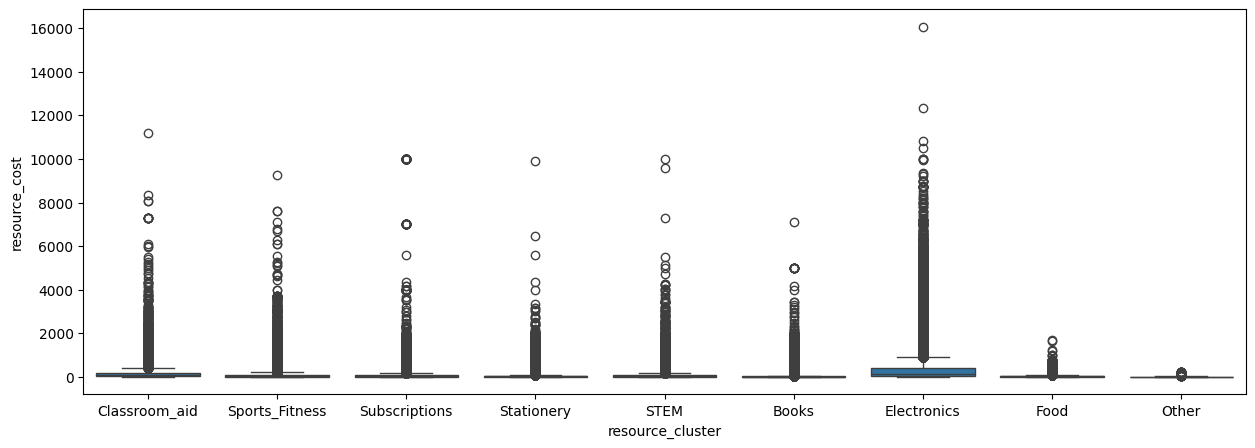

In [ ]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=resources, x='resource_cluster', y='resource_cost')
plt.show()

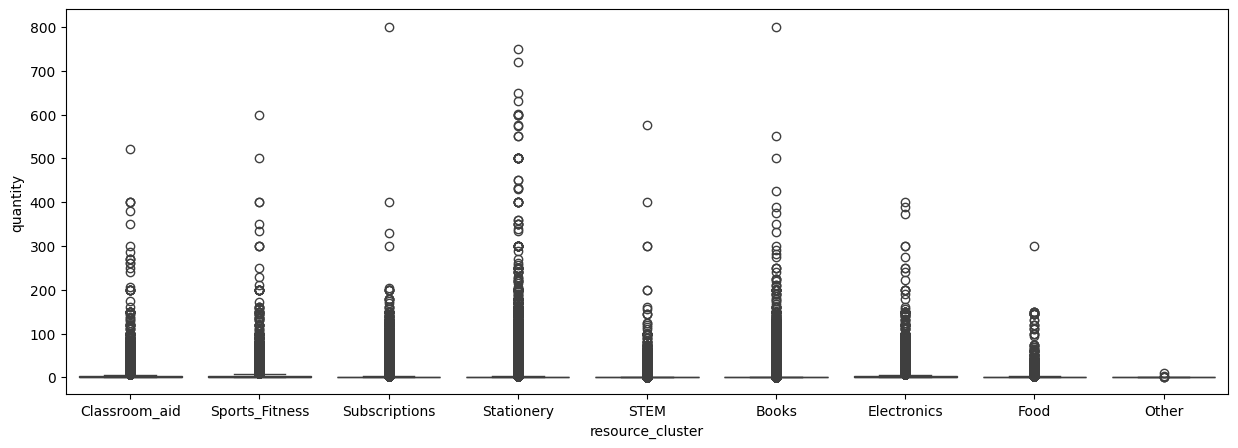

In [ ]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=resources, x='resource_cluster', y='quantity')
plt.show()

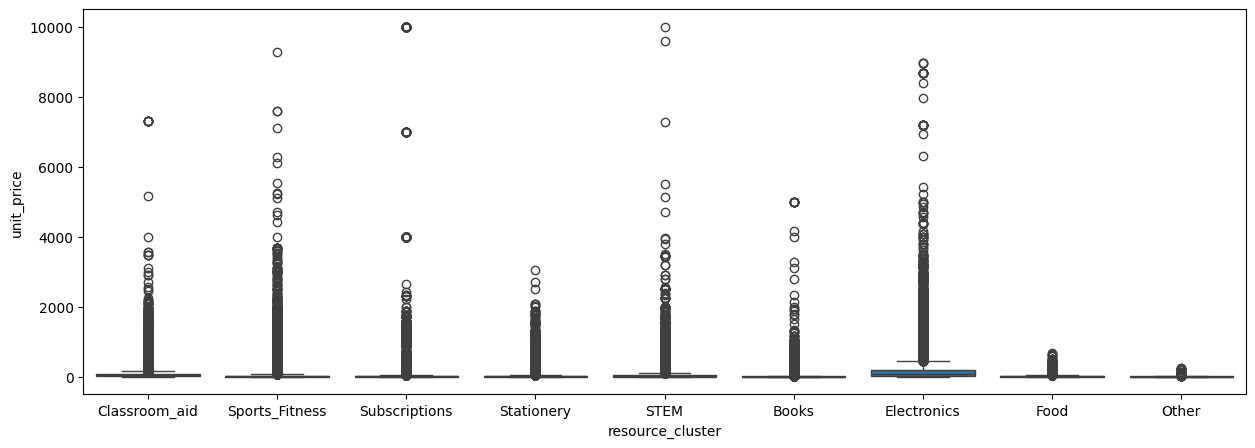

In [ ]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=resources, x='resource_cluster', y='unit_price')
plt.show()

In [ ]:
resource_cluster_agg = (
    resources
    .groupby("resource_cluster", as_index=False)
    .agg(
        resource_cluster_count=("id", "count"),
        resource_cluster_total_cost=("resource_cost", "sum"),
        resource_cluster_total_quantity=("quantity", "sum"),
        resource_cluster_avg_item_cost=("unit_price", "mean")
    )
)

resource_cluster_agg

resource_cluster  resource_cluster_count  resource_cluster_total_cost  \
0            Books                  460650                  13156695.66   
1    Classroom_aid                  159980                  23212632.07   
2      Electronics                  168492                  53681494.14   
3             Food                   42427                   1584217.19   
4            Other                     292                      8848.25   
5             STEM                  179386                  13984525.08   
6   Sports_Fitness                  167179                  16728305.27   
7       Stationery                  301893                  13724726.46   
8    Subscriptions                   60973                   5650436.60   

   resource_cluster_total_quantity  resource_cluster_avg_item_cost  
0                          1048477                       17.832088  
1                           470359                       78.566230  
2                           544035                      157.867566  
3                            89635                       20.905777  
4                              306                       29.685890  
5                           325652                       55.967668  
6                           598542                       46.633779  
7                           995946                       25.921302  
8                           335871                       58.409194

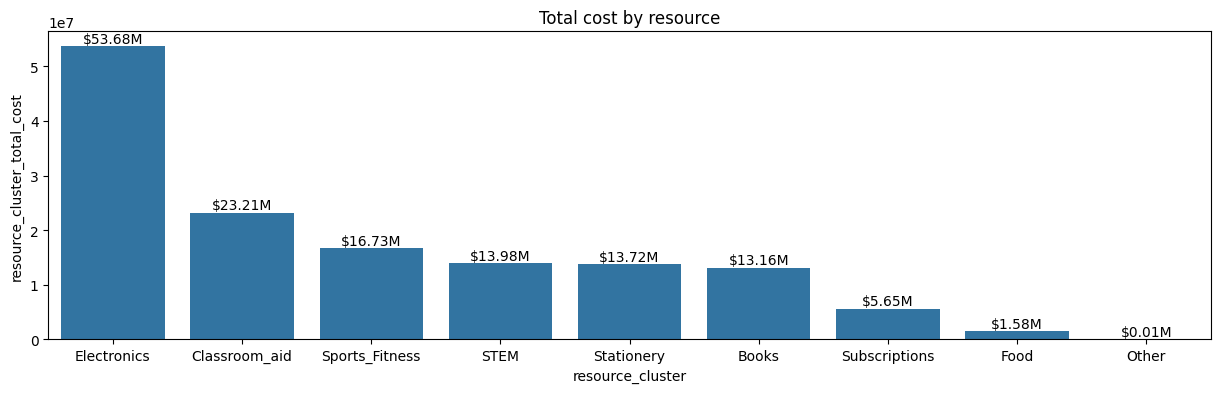

In [ ]:
plt.figure(figsize=(15, 4))
order = resource_cluster_agg.sort_values(by='resource_cluster_total_cost', ascending=False)['resource_cluster']
g = sns.barplot(data=resource_cluster_agg, x="resource_cluster", y="resource_cluster_total_cost", order=order)
for p in g.patches:
    g.text(p.get_x() + p.get_width() / 2, p.get_height(), '$'+ str((p.get_height()/1000000).round(2)) + 'M', ha='center', va='bottom')
plt.title('Total cost by resource')
plt.show()

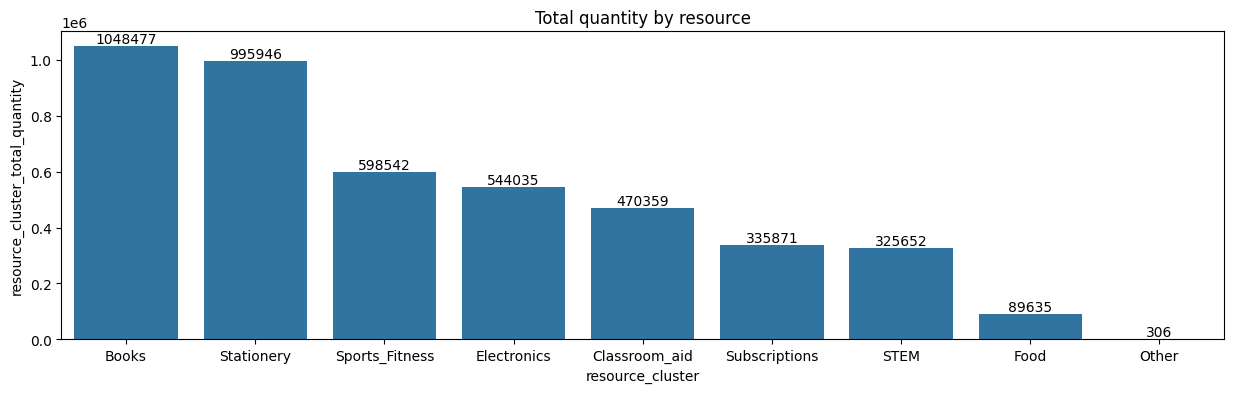

In [ ]:
plt.figure(figsize=(15, 4))
order = resource_cluster_agg.sort_values(by='resource_cluster_total_quantity', ascending=False)['resource_cluster']
g = sns.barplot(data=resource_cluster_agg, x="resource_cluster", y="resource_cluster_total_quantity", order=order)
for p in g.patches:
    g.text(p.get_x() + p.get_width() / 2, p.get_height(), int(p.get_height()), ha='center', va='bottom')
plt.title('Total quantity by resource')
plt.show()

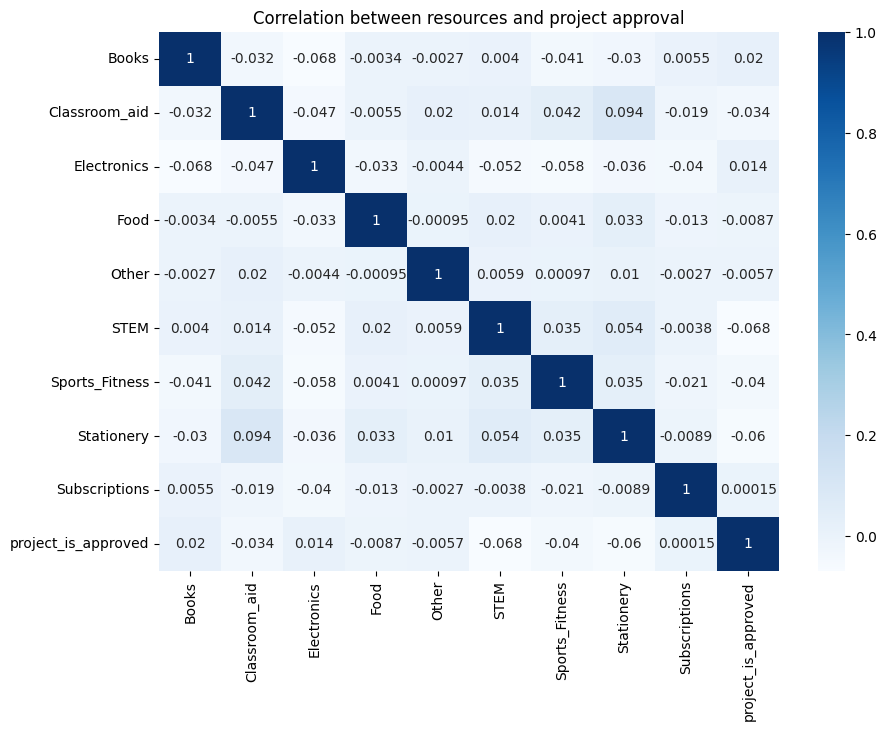

In [ ]:
resource_cols = resource_cluster_agg.resource_cluster.unique()
resource_approval_df = df[resource_cols.tolist() + ['project_is_approved']]
resource_corr = resource_approval_df.corr()

plt.figure(figsize=(10, 7))
sns.heatmap(resource_corr, cmap='Blues', annot=True)
plt.title('Correlation between resources and project approval')
plt.show()

In [ ]:
resources_approval_group = resource_approval_df.groupby('project_is_approved')[resource_cols].sum().reset_index()
resources_approval_group

project_is_approved   Books  Classroom_aid  Electronics   Food  Other  \
0                    0   55071          39382        31322   6594     30   
1                    1  391264         158705       199123  30609     91   

     STEM  Sports_Fitness  Stationery  Subscriptions  
0   32900           49556       98023          21109  
1  103693          199800      317582         118605

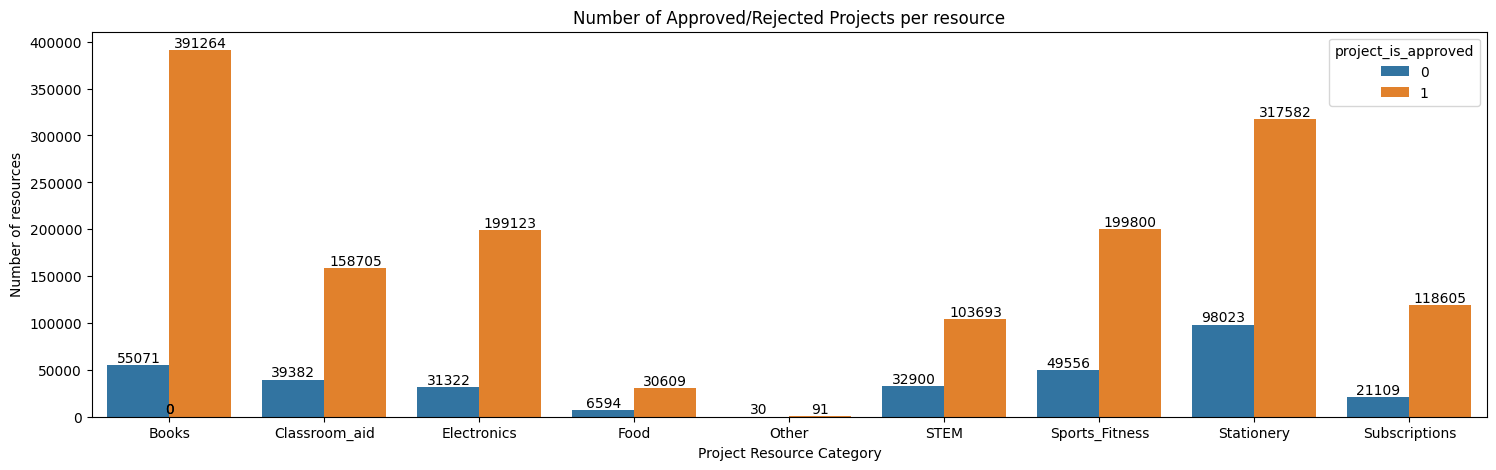

In [ ]:
# Melt the DataFrame to long format for easier plotting with seaborn
resources_approval_group_melted = resources_approval_group.melt(id_vars='project_is_approved',
                                   var_name='category',
                                   value_name='count')

plt.figure(figsize=(18, 5))
g = sns.barplot(data=resources_approval_group_melted, x='category', y='count', hue='project_is_approved')
for p in g.patches:
    g.text(p.get_x() + p.get_width() / 2, p.get_height(), int(p.get_height()), ha='center', va='bottom')

plt.ylabel('Number of resources')
plt.xlabel('Project Resource Category')
plt.title('Number of Approved/Rejected Projects per resource')
plt.show()

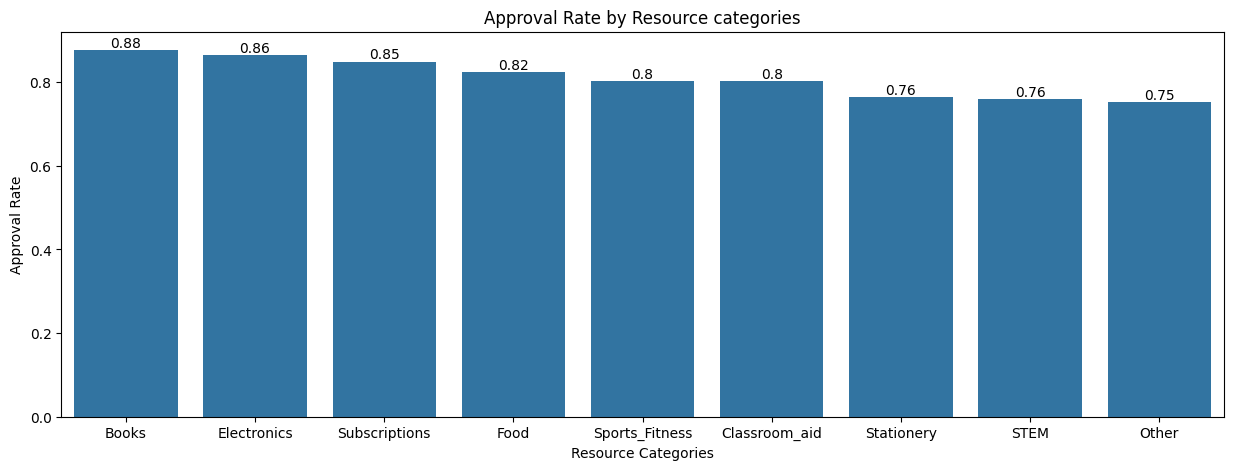

In [ ]:
# Calculate approval rate by resource category
resources_approval_rate_df = pd.DataFrame(columns=['category', 'approval_rate'])
resource_cols = resources_approval_group.columns[1:] # Exclude 'project_is_approved'
for col in resource_cols:
    approved_count = resources_approval_group.loc[resources_approval_group['project_is_approved'] == 1, col].iloc[0]
    rejected_count = resources_approval_group.loc[resources_approval_group['project_is_approved'] == 0, col].iloc[0]
    total_count = approved_count + rejected_count
    approval_rate = approved_count / total_count if total_count > 0 else 0
    resources_approval_rate_df = pd.concat([resources_approval_rate_df, pd.DataFrame([{'category': col, 'approval_rate': approval_rate}])], ignore_index=True)

# Sort by approval rate for better visualization
resources_approval_rate_df = resources_approval_rate_df.sort_values(by='approval_rate', ascending=False)

plt.figure(figsize=(15, 5))
g = sns.barplot(data=resources_approval_rate_df, x='category', y='approval_rate')
for p in g.patches:
    g.text(p.get_x() + p.get_width() / 2, p.get_height(), round(p.get_height(), 2), ha='center', va='bottom')

plt.ylabel('Approval Rate')
plt.xlabel('Resource Categories')
plt.title('Approval Rate by Resource categories')
plt.show()

In [ ]:
chisquare_test(df, resource_cols, target_col='project_is_approved', table=False)

category        p_value    chi2_stat  \
0           Books  1.113420e-100  1022.987188   
1   Classroom_aid   1.310543e-88   781.464640   
2     Electronics   2.757234e-06   180.423779   
3            Food   5.748872e-34   344.988884   
4           Other   1.800564e-02    15.306006   
5            STEM   0.000000e+00  2244.268739   
6  Sports_Fitness  4.436943e-232  1505.558048   
7      Stationery   0.000000e+00  2913.940752   
8   Subscriptions  2.076546e-184  1271.029807   

   project_is_approved_dependent_on_category  cramers_v      effect  
0                                          1   0.096767  Negligible  
1                                          1   0.084576  Negligible  
2                                          1   0.040639  Negligible  
3                                          1   0.056195  Negligible  
4                                          1   0.011837  Negligible  
5                                          1   0.143328        Weak  
6                                          1   0.117393        Weak  
7                                          1   0.163318        Weak  
8                                          1   0.107863        Weak

* **Total Resource Quantity:** **Books** represent the highest individual resource volume on the platform with **1,048,477** units requested, followed closely by **Stationery** at **995,946**.
* **Total Cost Leader:** Despite having a lower total quantity than books, **Electronics** accounts for the highest total expenditure at **USD 53.68M**, which is more than double the cost of the next category, Classroom Aid (USD 23.21M).
* **Approval Rate Trends:** Projects requesting **Books** have the highest approval probability at **88%**, whereas technical or high-cost categories like **STEM (76%)** and **Stationery (76%)** show lower approval rates.
* **Unit Price Variation:** **Electronics** has the highest average cost per item at **USD 157.87**, while **Books** are among the most affordable at **USD 17.83** per unit.
* **Approval Counts by Resource:** In terms of raw numbers, **Books** lead with **391,264** approved resources, while **Stationery** follows with **317,582** approved items.

### Project Cost and resources quantity analysis

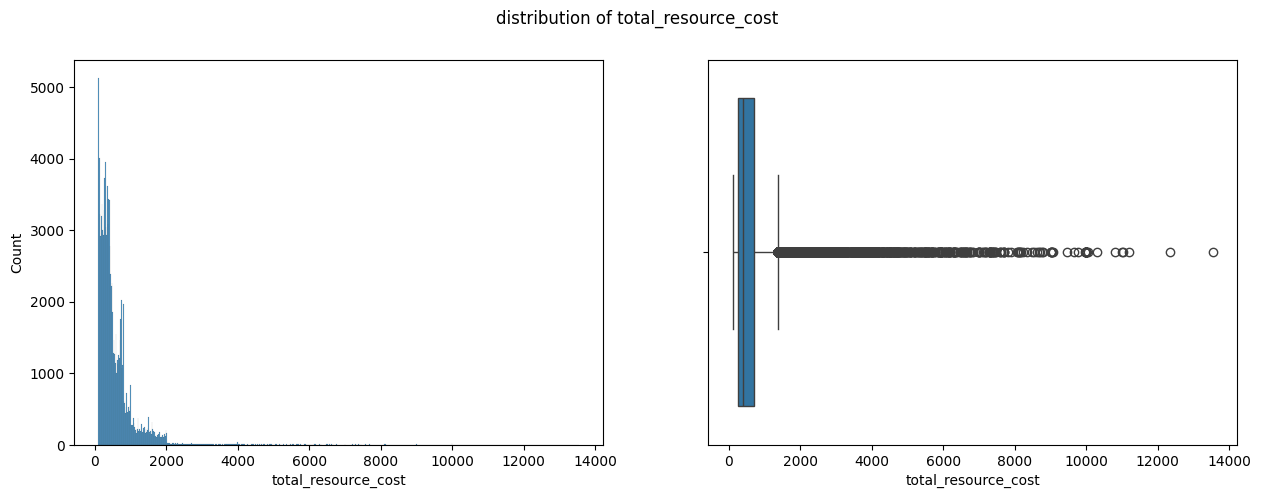

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
sns.histplot(data=df, x='total_resource_cost', ax=ax[0])
sns.boxplot(data=df, x='total_resource_cost', ax=ax[1])
plt.suptitle('distribution of total_resource_cost')
plt.show()

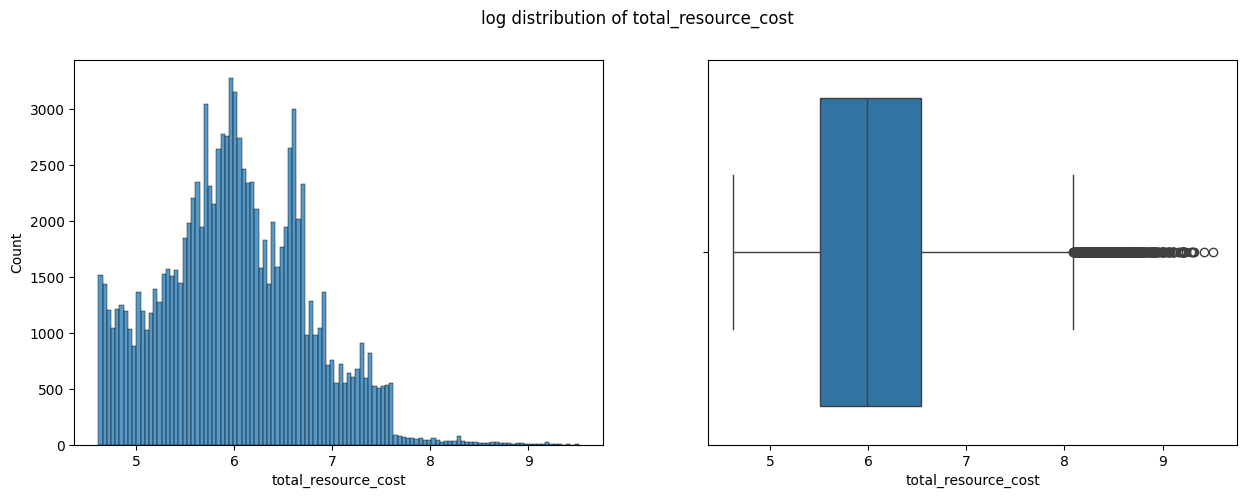

In [ ]:
log_cost_df = pd.DataFrame({
    'total_resource_cost': np.log1p(df['total_resource_cost']),
    'project_is_approved': df['project_is_approved'].astype('category')
})

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
sns.histplot(data=log_cost_df, x='total_resource_cost', ax=ax[0])
sns.boxplot(data=log_cost_df, x='total_resource_cost', ax=ax[1])
plt.suptitle('log distribution of total_resource_cost')
plt.show()

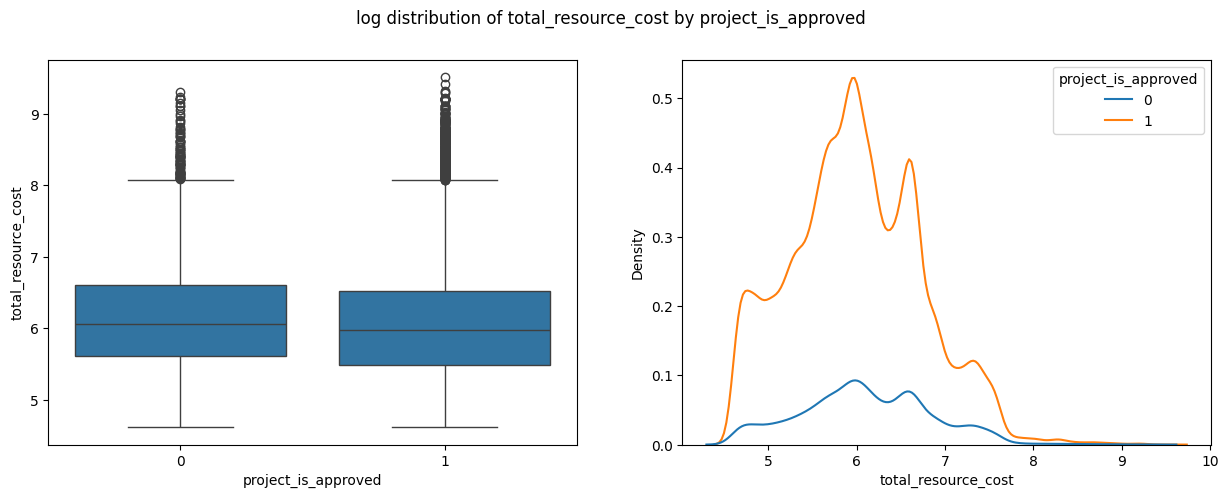

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
sns.boxplot(data=log_cost_df, y='total_resource_cost', x='project_is_approved', ax=ax[0])
sns.kdeplot(data=log_cost_df, x='total_resource_cost', hue='project_is_approved', ax=ax[1])
plt.suptitle('log distribution of total_resource_cost by project_is_approved')
plt.show()

In [ ]:
ttest(df=log_cost_df,
      num_col='total_resource_cost',
      cat_col='project_is_approved')

  project_is_approved  total_resource_cost
0                   0             6.101457
1                   1             5.996815


numerical_column   categorical_column      means     t_stat  \
0  total_resource_cost  project_is_approved  different -16.840935   

        p_value variances  levene_stat  levene_p  cohens_d effect  
0  1.471482e-63     equal     0.042971   0.83578 -0.142143   Weak

In [ ]:
bins = [0, 200, 500, 1000, 3000, df['total_resource_cost'].max()]
labels = ['0-200', '200-500', '500-1000', '1000-3000', '>3000']

df['project_cost_bin'] = pd.cut(df['total_resource_cost'], bins=bins, labels=labels, include_lowest=True)

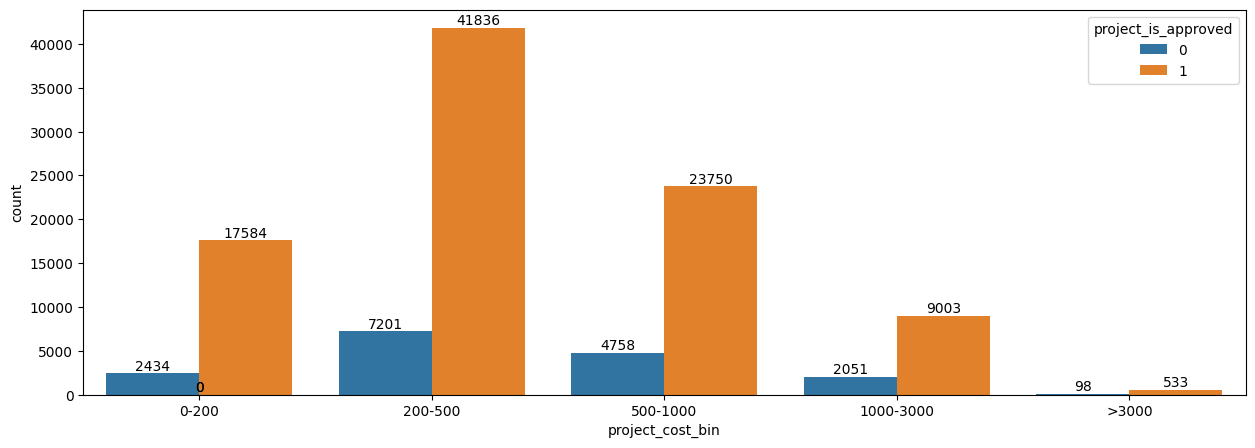

In [ ]:
plt.figure(figsize=(15, 5))
g = sns.countplot(data=df, x='project_cost_bin', hue='project_is_approved')
for p in g.patches:
    g.text(p.get_x() + p.get_width() / 2, p.get_height(), int(p.get_height()), ha='center', va='bottom')
plt.show()

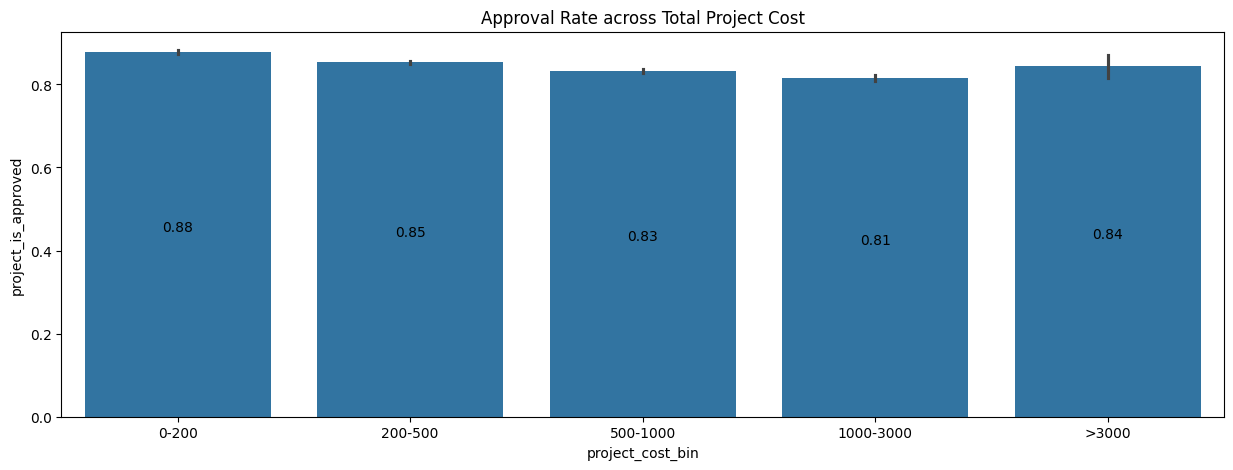

In [ ]:
# approval rate across project cost
plt.figure(figsize=(15, 5))
g = sns.barplot(data=df, x='project_cost_bin', y='project_is_approved')
for p in g.patches:
    g.text(p.get_x() + p.get_width() / 2, p.get_height()/2, round(p.get_height(), 2), ha='center', va='bottom')
plt.title('Approval Rate across Total Project Cost')
plt.show()

In [ ]:
df['total_resources_quantity'] = df['Electronics'] + df['Classroom_aid'] + df['Sports_Fitness'] + df['STEM'] + df['Stationery'] + df['Books'] + df['Subscriptions'] + df['Food'] + df['Other']

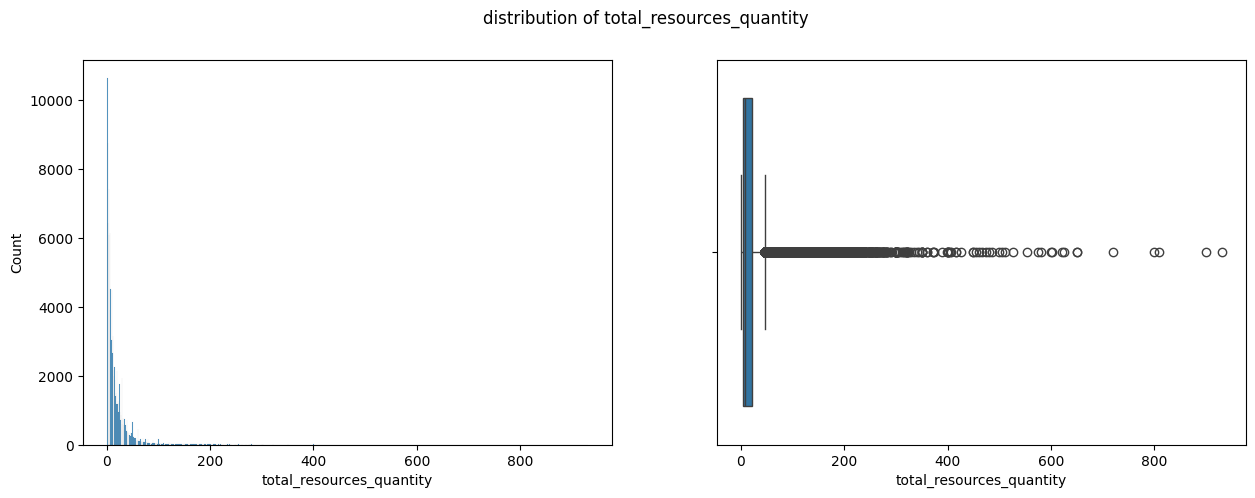

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
sns.histplot(data=df, x='total_resources_quantity', ax=ax[0])
sns.boxplot(data=df, x='total_resources_quantity', ax=ax[1])
plt.suptitle('distribution of total_resources_quantity')
plt.show()

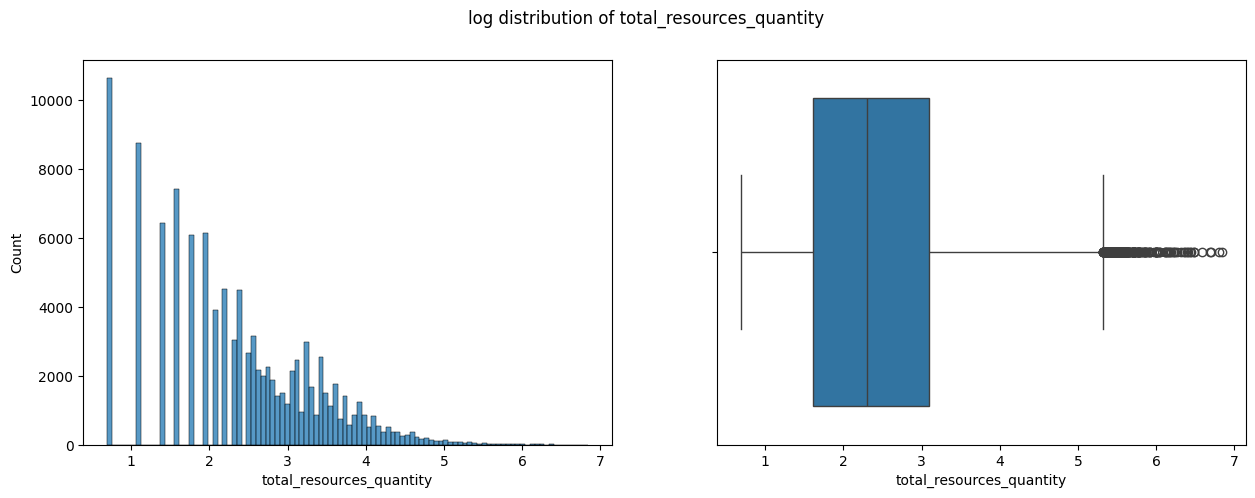

In [ ]:
log_cost_df = pd.DataFrame({
    'total_resources_quantity': np.log1p(df['total_resources_quantity']),
    'project_is_approved': df['project_is_approved'].astype('category')
})

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
sns.histplot(data=log_cost_df, x='total_resources_quantity', ax=ax[0])
sns.boxplot(data=log_cost_df, x='total_resources_quantity', ax=ax[1])
plt.suptitle('log distribution of total_resources_quantity')
plt.show()

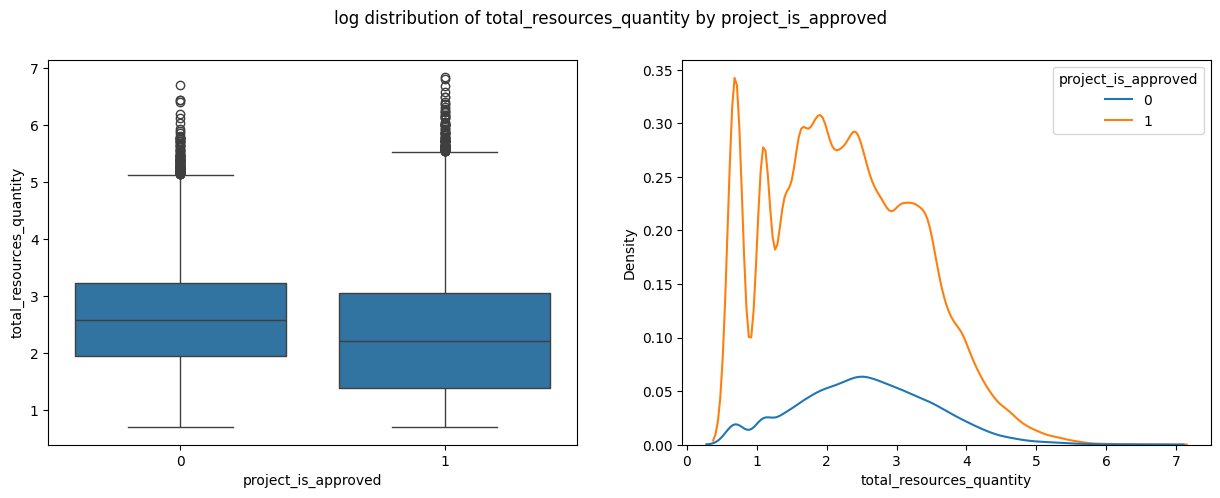

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
sns.boxplot(data=log_cost_df, y='total_resources_quantity', x='project_is_approved', ax=ax[0])
sns.kdeplot(data=log_cost_df, x='total_resources_quantity', hue='project_is_approved', ax=ax[1])
plt.suptitle('log distribution of total_resources_quantity by project_is_approved')
plt.show()

In [ ]:
ttest(df=log_cost_df,
      num_col='total_resources_quantity',
      cat_col='project_is_approved')

  project_is_approved  total_resources_quantity
0                   0                  2.567892
1                   1                  2.280299


numerical_column   categorical_column      means     t_stat  \
0  total_resources_quantity  project_is_approved  different -35.024797   

         p_value variances  levene_stat      levene_p  cohens_d effect  
0  3.719125e-262   unequal   312.814542  6.664843e-70 -0.279686   Weak

In [ ]:
df['project_qty_bin'] = pd.cut(
    df['total_resources_quantity'],
    bins=[0,5,20,50,200, df['total_resources_quantity'].max()],
    labels=['1-5', '6-20', '21-50', '51-200', '200+'],
    include_lowest=True
)

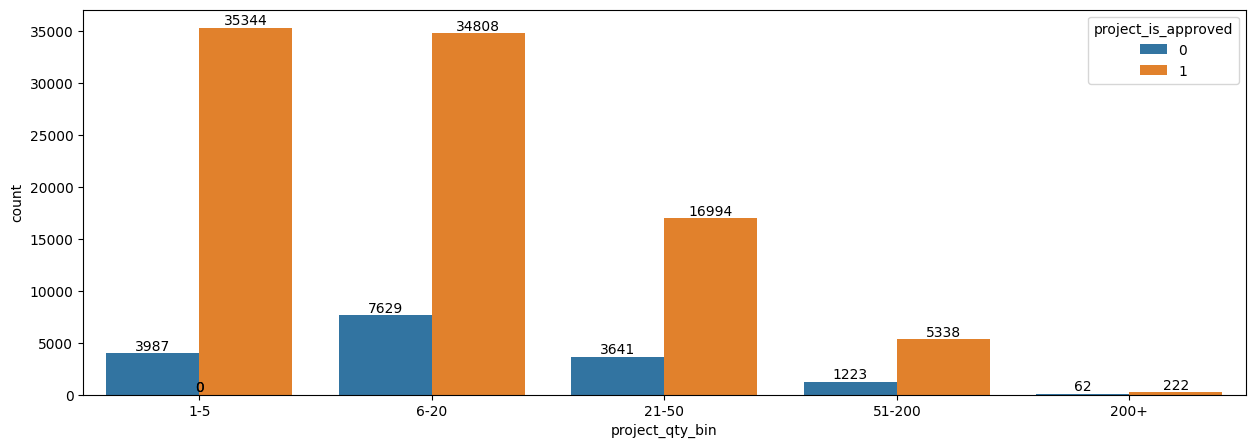

In [ ]:
plt.figure(figsize=(15, 5))
g = sns.countplot(data=df, x='project_qty_bin', hue='project_is_approved')
for p in g.patches:
    g.text(p.get_x() + p.get_width() / 2, p.get_height(), int(p.get_height()), ha='center', va='bottom')
plt.show()

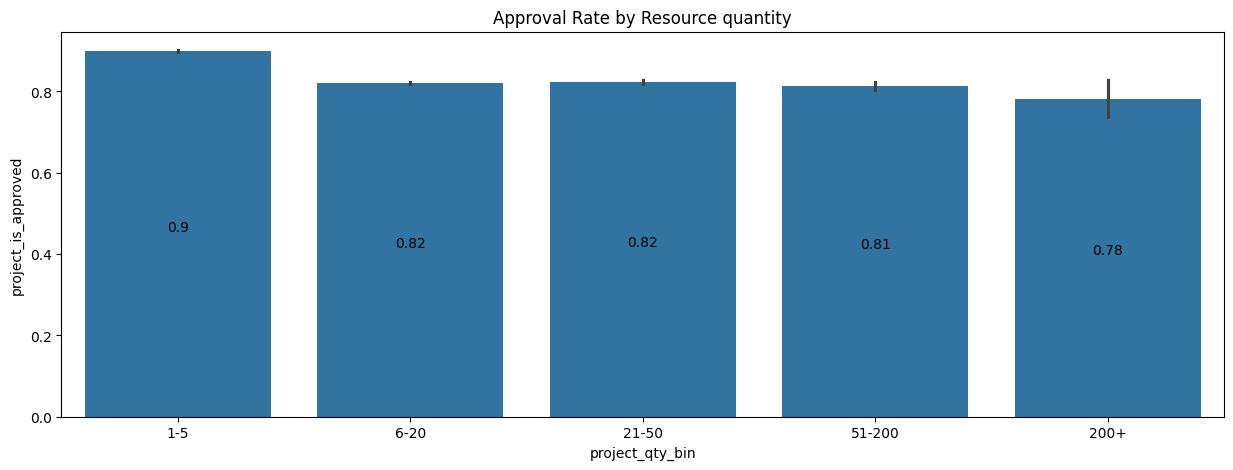

In [ ]:
# approval rate by Resource quantity
plt.figure(figsize=(15, 5))
g = sns.barplot(data=df, x='project_qty_bin', y='project_is_approved')
for p in g.patches:
    g.text(p.get_x() + p.get_width() / 2, p.get_height()/2, round(p.get_height(), 2), ha='center', va='bottom')
plt.title('Approval Rate by Resource quantity')
plt.show()

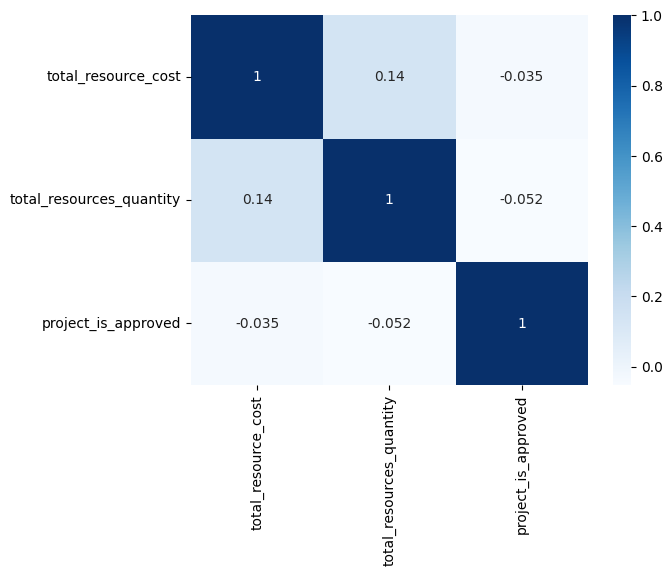

In [ ]:
cost_cols=['total_resource_cost', 'total_resources_quantity', 'project_is_approved']

sns.heatmap(df[cost_cols].corr(), cmap='Blues', annot=True)
plt.show()

In [ ]:
pearson_corr(df, col1='total_resource_cost', col2='project_is_approved')

column1              column2  correlation       p_value  \
0  total_resource_cost  project_is_approved    -0.035026  5.183613e-31   

  relation      effect  
0  Related  Negligible

In [ ]:
pearson_corr(df, col1='total_resources_quantity', col2='project_is_approved')

column1              column2  correlation       p_value  \
0  total_resources_quantity  project_is_approved    -0.052024  2.361665e-66   

  relation      effect  
0  Related  Negligible

* **Cost Distribution:** The distribution of `total_resource_cost` is heavily right-skewed with a significant number of high-cost outliers reaching up to **USD 14,000**.
* **Log Normalization:** Applying a log transformation to `total_resource_cost` reveals a multi-modal distribution, which helps stabilize the variance for predictive modeling.
* **Resource Correlation:** There is a weak positive correlation between **Books** and project approval (0.02), while **STEM (-0.068)** and **Stationery (-0.06)** show the strongest negative correlations with approval status.
* **Price Outliers:** Boxplots for `resource_cost` and `unit_price` highlight extreme outliers in the **Electronics** and **Sports/Fitness** clusters, with some individual units priced near **USD 10,000**.
* **Cost vs. Approval Success:** Projects with lower total resource costs have higher approval rates, with the **0–200 bin** leading at **88%** approval.
* **Approval Rate across Quantity:** Resource quantity shows a similar inverse trend, where smaller requests of **1–5 items** have the highest approval probability at **90%**.
* **Statistical Significance:** T-tests confirm that both total cost and quantity are significantly different between approved and rejected projects.
* **Effect Size:** Despite being statistically significant, both features show a **Weak** Cohen's d effect size (Cost: -0.14, Quantity: -0.28), indicating they are not the sole primary drivers of approval.
* **Correlation Metrics:** There is a **Negligible** negative correlation between approval and both cost (-0.035) and quantity (-0.052), suggesting that while lower values are better, the relationship is non-linear.
* **Data Skewness:** Both features are heavily right-skewed, requiring **log transformations** to normalize the distributions for effective machine learning modeling.
* **Cost Outliers:** The distribution of total resource cost includes extreme outliers reaching nearly **USD 14,000**, though the majority of projects fall below USD 2,000.
* **Quantity Outliers:** Similarly, while most projects request few items, some extreme cases request over **800 units**, which typically correlates with lower approval rates.

### project_title analysis

In [ ]:
project_title_df = project_title_df.merge(df[['id', 'project_is_approved']], on='id', how='left')
project_title_df.head(2)

id                                     project_title  \
0  p253737  Educational Support for English Learners at Home   
1  p258326             Wanted: Projector for Hungry Learners   

   title_readability_grade  is_title_request  title_creativity_score  \
0                    10.74                 1                   1.297   
1                     7.60                 0                   2.069   

                       cleaned_project_title  cleaned_title_word_count  \
0  educational support english learners home                         5   
1           wanted projector hungry learners                         4   

   title_length  project_is_approved  
0            48                    0  
1            37                    1

In [ ]:
project_title_df.describe()

title_readability_grade  is_title_request  title_creativity_score  \
count            109248.000000     109248.000000           109248.000000   
mean                  5.770717          0.088093                1.622230   
std                   5.656112          0.283432                0.588561   
min                 -14.810000          0.000000                0.000000   
25%                   1.313000          0.000000                1.221000   
50%                   5.240000          0.000000                1.556000   
75%                   9.180000          0.000000                1.945000   
max                  55.600000          1.000000                6.100000   

       cleaned_title_word_count   title_length  project_is_approved  
count             109248.000000  109248.000000        109248.000000  
mean                   3.677669      32.464759             0.848583  
std                    1.520696      13.418771             0.358456  
min                    0.000000       5.000000             0.000000  
25%                    2.000000      22.000000             1.000000  
50%                    3.000000      30.000000             1.000000  
75%                    5.000000      41.000000             1.000000  
max                   15.000000     108.000000             1.000000

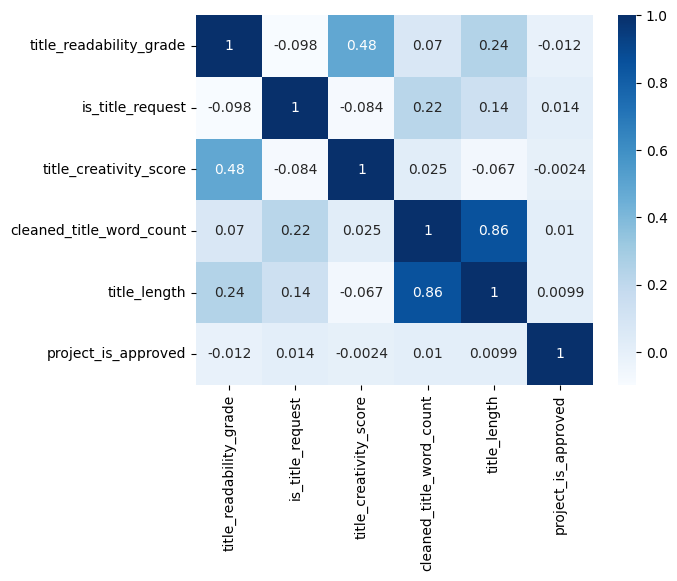

In [ ]:
num_cols = project_title_df.select_dtypes(include=np.number)

g = sns.heatmap(num_cols.corr(), cmap='Blues', annot=True)
plt.show()

In [ ]:
project_title_df['is_title_request'].value_counts(normalize=True)

is_title_request
0    0.911907
1    0.088093
Name: proportion, dtype: float64

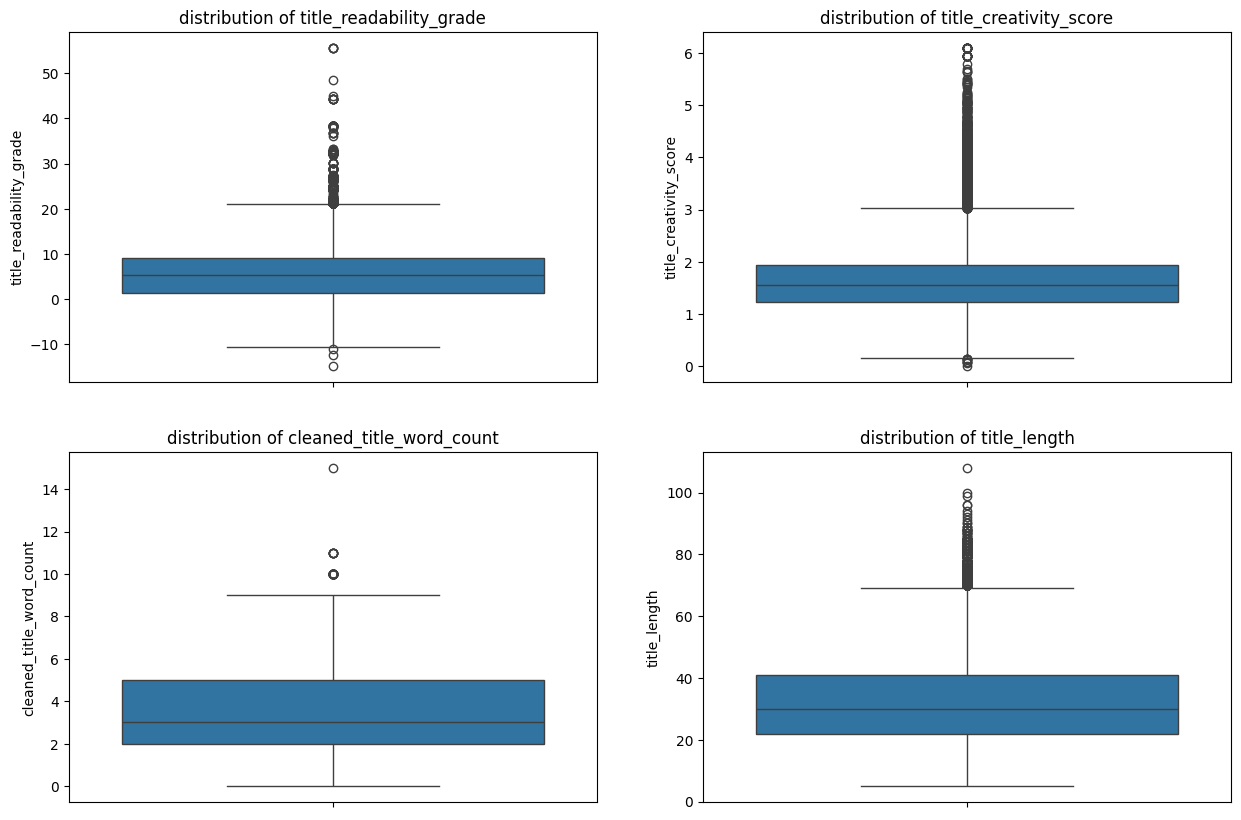

In [ ]:
# distributions of numerical columns
cols = ['title_readability_grade', 'title_creativity_score', 'cleaned_title_word_count', 'title_length']

plt.figure(figsize=(15, 10))
for i, col in enumerate(cols):
  plt.subplot(2, 2, i+1)
  sns.boxplot(data=project_title_df, y=col)
  plt.title('distribution of ' + col)

plt.show()

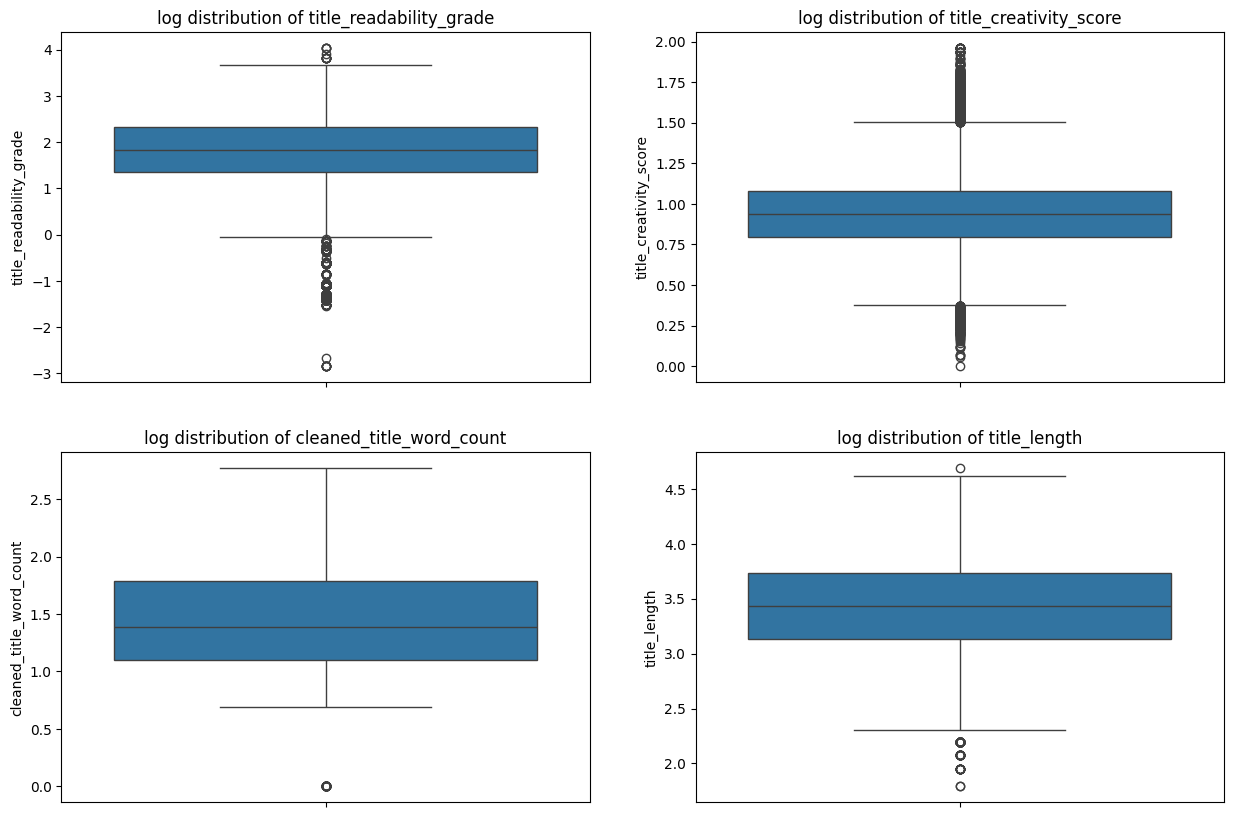

In [ ]:
# distributions of numerical columns
cols = ['title_readability_grade', 'title_creativity_score', 'cleaned_title_word_count', 'title_length']
log_project_title_df = np.log1p(project_title_df[cols])

plt.figure(figsize=(15, 10))
for i, col in enumerate(cols):
  plt.subplot(2, 2, i+1)
  sns.boxplot(data=log_project_title_df, y=col)
  plt.title('log distribution of ' + col)

plt.show()

In [ ]:
cols = ['title_readability_grade', 'title_creativity_score', 'cleaned_title_word_count', 'title_length']
res=pd.DataFrame()

for col in cols:
  print(col + 'vs project_is_approved')
  t = ttest(project_title_df, col, 'project_is_approved')
  res = pd.concat([res,t])
  print()

res

title_readability_gradevs project_is_approved
   project_is_approved  title_readability_grade
0                    0                 5.933517
1                    1                 5.741667

title_creativity_scorevs project_is_approved
   project_is_approved  title_creativity_score
0                    0                 1.62554
1                    1                 1.62164

cleaned_title_word_countvs project_is_approved
   project_is_approved  cleaned_title_word_count
0                    0                  3.641277
1                    1                  3.684163

title_lengthvs project_is_approved
   project_is_approved  title_length
0                    0     32.150103
1                    1     32.520905



numerical_column   categorical_column      means    t_stat  \
0   title_readability_grade  project_is_approved  different  3.864414   
0    title_creativity_score  project_is_approved       same  0.776527   
0  cleaned_title_word_count  project_is_approved  different -3.342762   
0              title_length  project_is_approved  different -3.216104   

    p_value variances  levene_stat      levene_p  cohens_d      effect  
0  0.000112   unequal    59.200531  1.435802e-14  0.033921  Negligible  
0  0.437446   unequal     4.997960  2.537922e-02  0.006626  Negligible  
0  0.000831   unequal     4.616947  3.165973e-02 -0.028203  Negligible  
0  0.001301   unequal    10.427440  1.241934e-03 -0.027634  Negligible

In [ ]:
def bin_title_readability(x):
    if x <= 5:
        return "easy"
    elif x <= 9:
        return "medium"
    else:
        return "hard"

def bin_title_creativity(x):
    if x < 1:
        return "low"
    elif x < 2.5:
        return "medium"
    else:
        return "high"

def bin_title_word_count(x):
    if x <= 4:
        return "short"
    elif x <= 10:
        return "normal"
    else:
        return "long"

def bin_title_length(x):
    if x <= 25:
        return "short"
    elif x <= 60:
        return "medium"
    else:
        return "long"

In [ ]:
project_title_df['title_readability_bin'] = project_title_df['title_readability_grade'].apply(bin_title_readability)
project_title_df['title_creativity_bin'] = project_title_df['title_creativity_score'].apply(bin_title_creativity)
project_title_df['title_word_count_bin'] = project_title_df['cleaned_title_word_count'].apply(bin_title_word_count)
project_title_df['title_length_bin'] = project_title_df['title_length'].apply(bin_title_length)

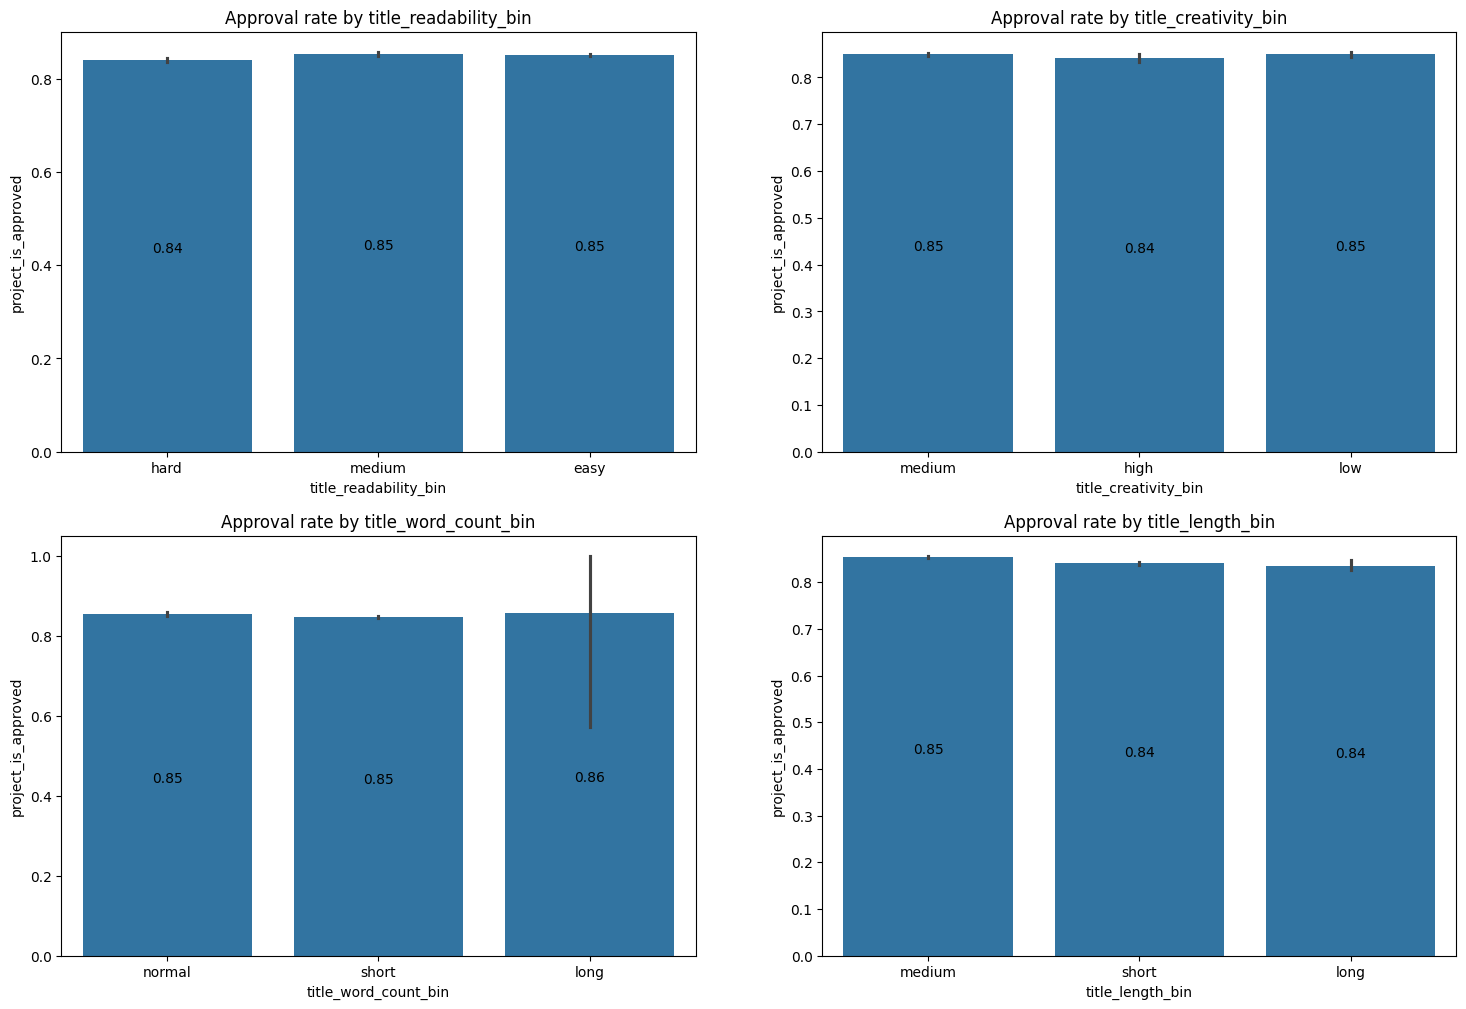

In [ ]:
cols = ['title_readability_bin', 'title_creativity_bin', 'title_word_count_bin', 'title_length_bin']

plt.figure(figsize=(18, 12))
for i, col in enumerate(cols):
  plt.subplot(2, 2, i+1)
  g = sns.barplot(data=project_title_df, x=col, y='project_is_approved')
  for p in g.patches:
    g.text(p.get_x() + p.get_width() /2, p.get_height()/2, round(p.get_height(), 2), ha='center', va='bottom')
  plt.title('Approval rate by ' + col)

plt.show()

In [ ]:
cols = ['title_readability_bin', 'title_creativity_bin', 'title_word_count_bin', 'title_length_bin', 'is_title_request']

chisquare_test(df=project_title_df, columns=cols, target_col='project_is_approved')

project_is_approved       0      1
title_readability_bin             
easy                   7846  44643
hard                   4536  23839
medium                 4160  24224 

project_is_approved       0      1
title_creativity_bin              
high                   1302   6903
low                    2021  11386
medium                13219  74417 

project_is_approved       0      1
title_word_count_bin              
long                      1      6
normal                 4199  24558
short                 12342  68142 

project_is_approved     0      1
title_length_bin                
long                  634   3223
medium               9654  56590
short                6254  32893 

project_is_approved      0      1
is_title_request                 
0                    15239  84385
1                     1303   8321 



category       p_value  chi2_stat  \
0  title_readability_bin  1.313186e-05  22.480938   
1   title_creativity_bin  1.614821e-01   3.646722   
2   title_word_count_bin  1.188502e-02   8.864953   
3       title_length_bin  4.876156e-10  42.882987   
4       is_title_request  4.690970e-06  20.959495   

   project_is_approved_dependent_on_category  cramers_v      effect  
0                                          1   0.014345  Negligible  
1                                          0   0.005778  Negligible  
2                                          1   0.009008  Negligible  
3                                          1   0.019812  Negligible  
4                                          1   0.013851  Negligible

* **Readability:** The average project title has a readability grade level of approximately **5.77**. Title readability is statistically related to approval, but the actual effect size is **negligible**.
* **Length and Word Count:** Project titles average **32.5 characters** and **3.7 words**. Longer titles show a very slight correlation with approval, but statistical testing confirms this effect is also negligible.
* **Formatting Requests:** Approximately **8.8%** of projects are flagged as title requests. While there is a dependency between this flag and approval, the practical impact is minimal.


### project_essay analysis

In [ ]:
projects_essay_df = projects_essay_df.merge(df[['id', 'project_is_approved']], on='id', how='left')
projects_essay_df.head(2)

id                                      project_essay  \
0  p253737  My students are English learners that are work...   
1  p258326  Our students arrive to our school eager to lea...   

                               cleaned_project_essay  essay_readability_grade  \
0  students english learners working english seco...                     9.11   
1  students arrive school eager learn polite gene...                     9.16   

   cleaned_essay_word_count  essay_length  essay_sentence_count  \
0                       146          1632                    16   
1                        96          1304                    13   

   essay_paragraph_count  essay_sentiment  essay_subjectivity  \
0                      4            0.970               0.282   
1                      3            0.931               0.412   

   project_is_approved  
0                    0  
1                    1

In [ ]:
projects_essay_df.describe()

essay_readability_grade  cleaned_essay_word_count   essay_length  \
count            109248.000000             109248.000000  109248.000000   
mean                  8.716269                135.789030    1533.225771   
std                   1.830200                 35.995066     399.233209   
min                   2.130000                 46.000000     505.000000   
25%                   7.450000                108.000000    1223.000000   
50%                   8.590000                127.000000    1427.000000   
75%                   9.830000                155.000000    1752.000000   
max                  71.490000                314.000000    5745.000000   

       essay_sentence_count  essay_paragraph_count  essay_sentiment  \
count         109248.000000          109248.000000    109248.000000   
mean              16.033850               3.735171         0.965946   
std                4.166156               1.702970         0.132648   
min                1.000000               1.000000        -0.995000   
25%               13.000000               3.000000         0.978000   
50%               15.000000               4.000000         0.990000   
75%               18.000000               5.000000         0.995000   
max               79.000000              39.000000         1.000000   

       essay_subjectivity  project_is_approved  
count       109248.000000        109248.000000  
mean             0.492758             0.848583  
std              0.074884             0.358456  
min              0.000000             0.000000  
25%              0.444000             1.000000  
50%              0.494000             1.000000  
75%              0.542000             1.000000  
max              0.861000             1.000000

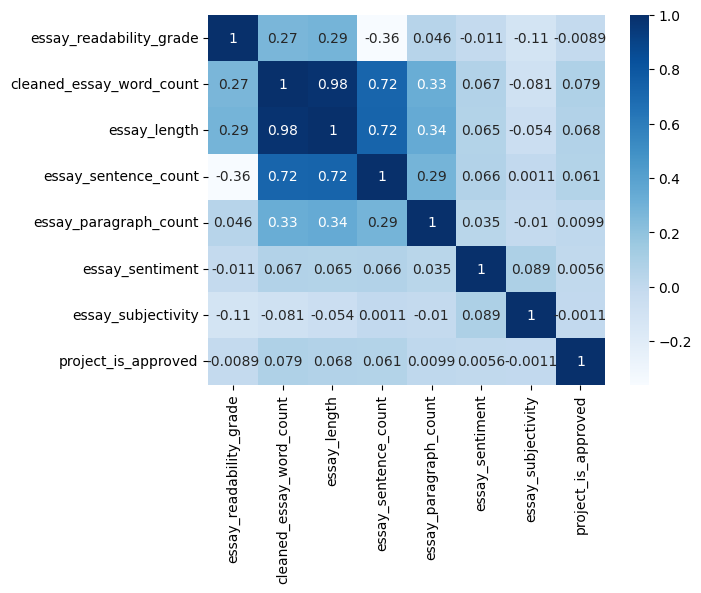

In [ ]:
num_cols = projects_essay_df.select_dtypes(include=np.number)

g = sns.heatmap(num_cols.corr(), cmap='Blues', annot=True)
plt.show()

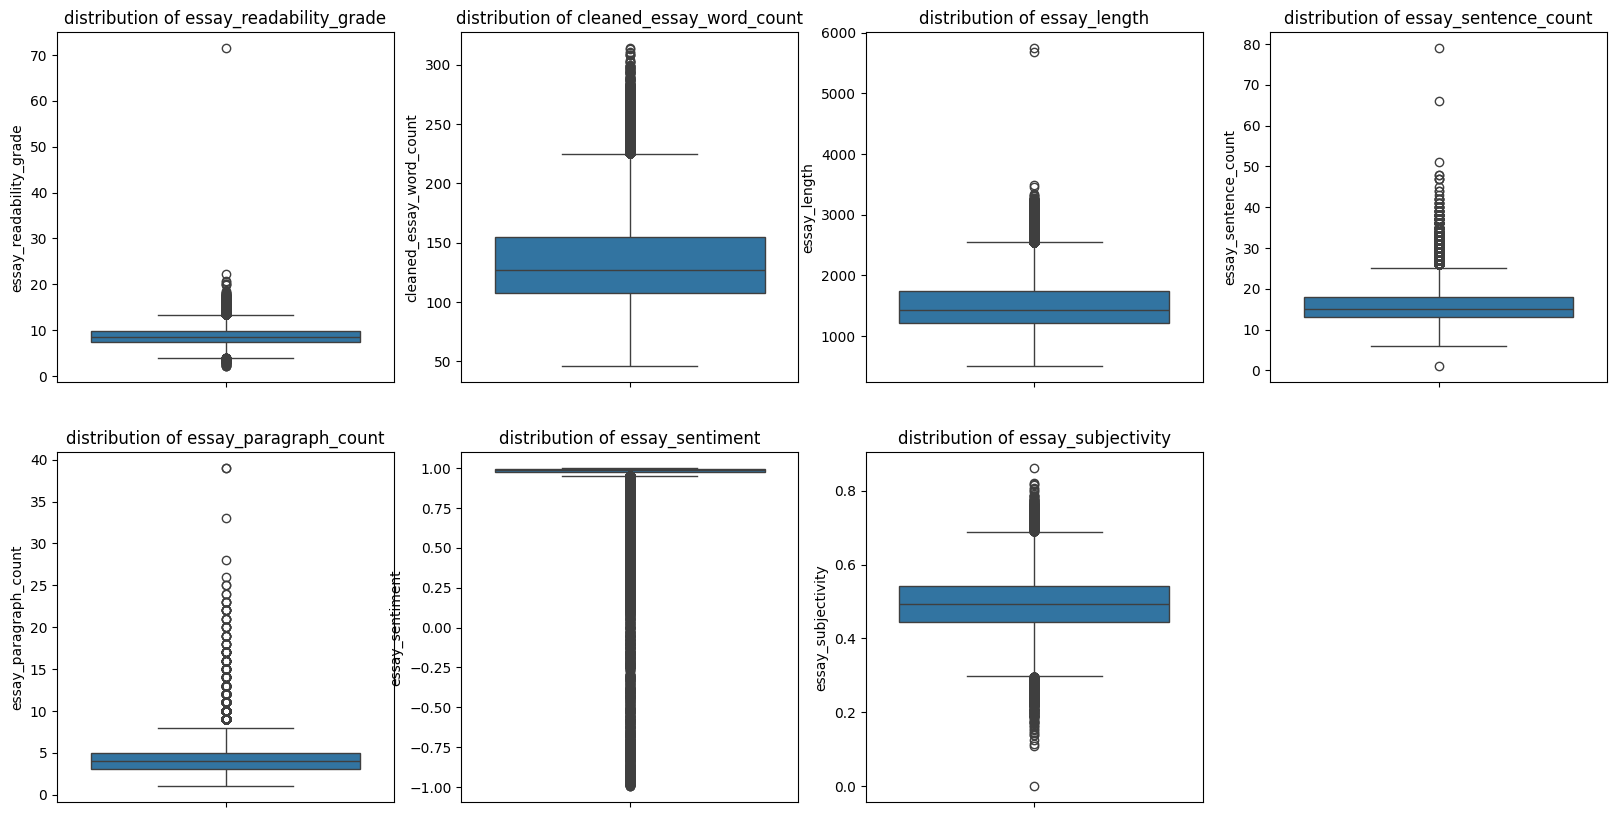

In [ ]:
# distributions of numerical columns
cols = ['essay_readability_grade', 'cleaned_essay_word_count', 'essay_length',
        'essay_sentence_count',	'essay_paragraph_count',	'essay_sentiment',
        'essay_subjectivity']

plt.figure(figsize=(20, 10))
for i, col in enumerate(cols):
  plt.subplot(2, 4, i+1)
  sns.boxplot(data=projects_essay_df, y=col)
  plt.title('distribution of ' + col)

plt.show()

In [ ]:
cols = ['essay_readability_grade', 'cleaned_essay_word_count', 'essay_length',
        'essay_sentence_count',	'essay_paragraph_count',	'essay_sentiment',
        'essay_subjectivity']

res=pd.DataFrame()

for col in cols:
  print(col + 'vs project_is_approved')
  t = ttest(projects_essay_df, col, 'project_is_approved')
  res = pd.concat([res,t])
  print()

res

essay_readability_gradevs project_is_approved
   project_is_approved  essay_readability_grade
0                    0                 8.754856
1                    1                 8.709384

cleaned_essay_word_countvs project_is_approved
   project_is_approved  cleaned_essay_word_count
0                    0                129.071334
1                    1                136.987703

essay_lengthvs project_is_approved
   project_is_approved  essay_length
0                    0   1468.640672
1                    1   1544.750016

essay_sentence_countvs project_is_approved
   project_is_approved  essay_sentence_count
0                    0             15.428727
1                    1             16.141825

essay_paragraph_countvs project_is_approved
   project_is_approved  essay_paragraph_count
0                    0               3.695140
1                    1               3.742314

essay_sentimentvs project_is_approved
   project_is_approved  essay_sentiment
0                    0     

numerical_column   categorical_column      means     t_stat  \
0   essay_readability_grade  project_is_approved  different   2.782825   
0  cleaned_essay_word_count  project_is_approved  different -27.778967   
0              essay_length  project_is_approved  different -24.125502   
0      essay_sentence_count  project_is_approved  different -21.105795   
0     essay_paragraph_count  project_is_approved  different  -3.046765   
0           essay_sentiment  project_is_approved       same  -1.860214   
0        essay_subjectivity  project_is_approved       same   0.352736   

         p_value variances  levene_stat      levene_p  cohens_d      effect  
0   5.393418e-03   unequal    54.383154  1.661320e-13  0.024846  Negligible  
0  3.329626e-167   unequal   250.629103  2.188366e-56 -0.220615        Weak  
0  4.287875e-127   unequal   269.830854  1.460664e-60 -0.191085        Weak  
0   5.655032e-98   unequal    83.949852  5.159293e-20 -0.171487        Weak  
0   2.315978e-03   unequal    66.449047  3.628104e-16 -0.027703  Negligible  
0   6.285799e-02     equal     2.893111  8.896186e-02 -0.015701  Negligible  
0   7.242899e-01   unequal    28.534327  9.223544e-08  0.003056  Negligible

In [ ]:
def bin_essay_readability(x):
    if x <= 6:
        return "easy"
    elif x <= 10:
        return "medium"
    else:
        return "hard"

def bin_essay_word_count(x):
    if x < 100:
        return "short"
    elif x <= 300:
        return "medium"
    else:
        return "long"

def bin_essay_length(x):
    if x < 600:
        return "short"
    elif x <= 1800:
        return "medium"
    else:
        return "long"

def bin_essay_sentence_count(x):
    if x <= 4:
        return "few"
    elif x <= 10:
        return "moderate"
    else:
        return "many"

def bin_essay_paragraph_count(x):
    if x <= 2:
        return "low"
    elif x <= 4:
        return "normal"
    else:
        return "high"

def bin_essay_sentiment(x):
    if x <= -0.2:
        return "negative"
    elif x < 0.2:
        return "neutral"
    else:
        return "positive"

def bin_essay_subjectivity(x):
    if x < 0.3:
        return "objective"
    elif x < 0.6:
        return "mixed"
    else:
        return "subjective"

In [ ]:
projects_essay_df['essay_readability_bin'] = projects_essay_df['essay_readability_grade'].apply(bin_essay_readability)
projects_essay_df['essay_word_count_bin'] = projects_essay_df['cleaned_essay_word_count'].apply(bin_essay_word_count)
projects_essay_df['essay_length_bin'] = projects_essay_df['essay_length'].apply(bin_essay_length)
projects_essay_df['essay_sentence_bin'] = projects_essay_df['essay_sentence_count'].apply(bin_essay_sentence_count)
projects_essay_df['essay_paragraph_bin'] = projects_essay_df['essay_paragraph_count'].apply(bin_essay_paragraph_count)
projects_essay_df['essay_sentiment_bin'] = projects_essay_df['essay_sentiment'].apply(bin_essay_sentiment)
projects_essay_df['essay_subjectivity_bin'] = projects_essay_df['essay_subjectivity'].apply(bin_essay_subjectivity)

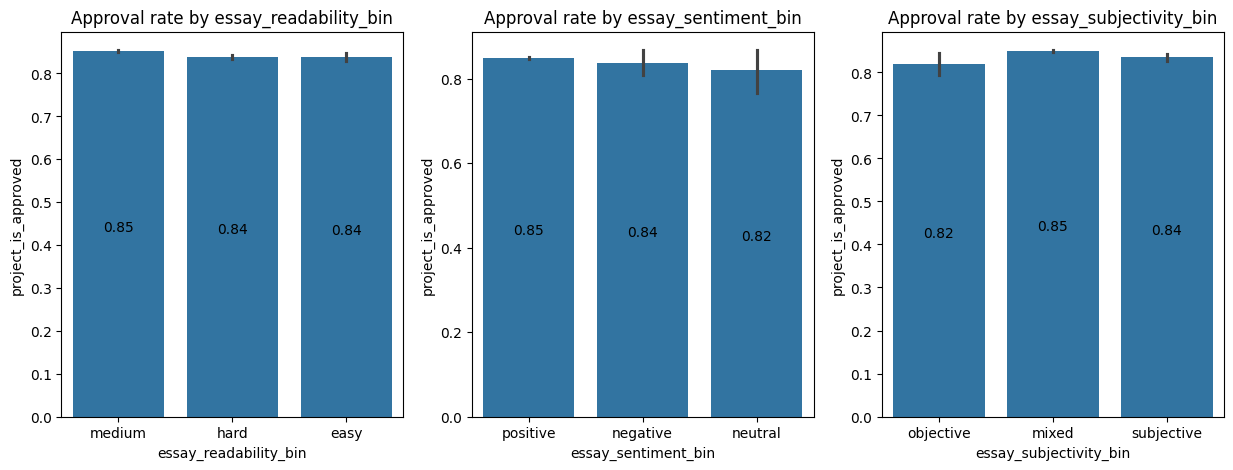

In [ ]:
cols = ['essay_readability_bin', 'essay_sentiment_bin', 'essay_subjectivity_bin']

plt.figure(figsize=(15, 5))
for i, col in enumerate(cols):
  plt.subplot(1, 3, i+1)
  g = sns.barplot(data=projects_essay_df, x=col, y='project_is_approved')
  for p in g.patches:
    g.text(p.get_x() + p.get_width() /2, p.get_height()/2, round(p.get_height(), 2), ha='center', va='bottom')
  plt.title('Approval rate by ' + col)

plt.show()

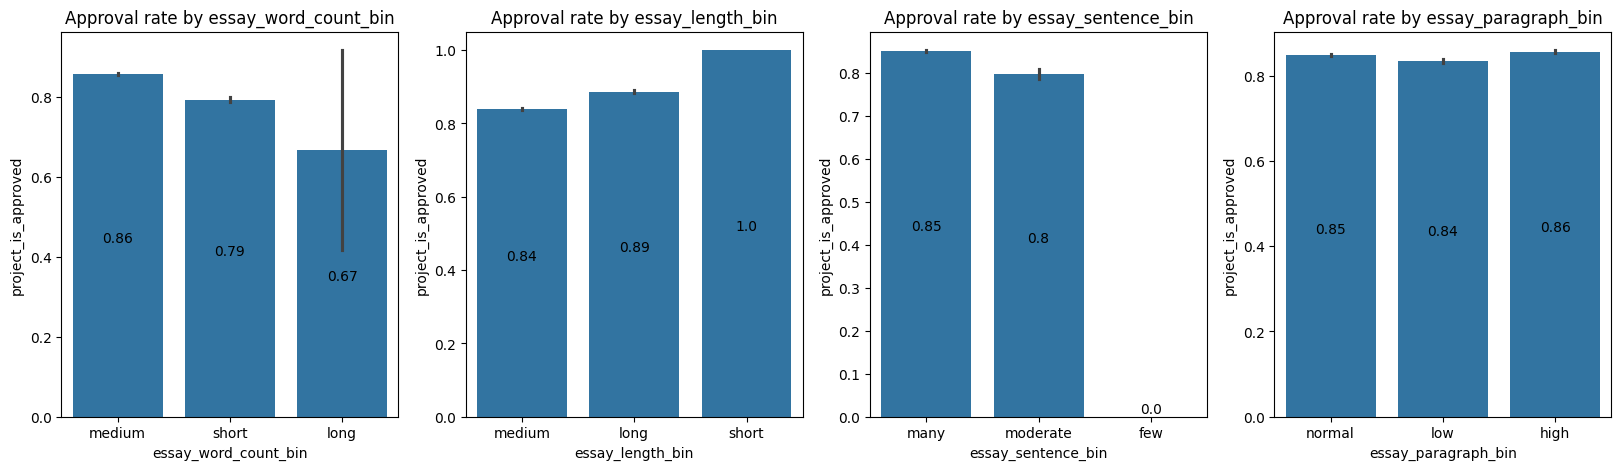

In [ ]:
cols = ['essay_word_count_bin', 'essay_length_bin',
        'essay_sentence_bin',	'essay_paragraph_bin']

plt.figure(figsize=(20, 5))
for i, col in enumerate(cols):
  plt.subplot(1, 4, i+1)
  g = sns.barplot(data=projects_essay_df, x=col, y='project_is_approved')
  for p in g.patches:
    g.text(p.get_x() + p.get_width() /2, p.get_height()/2, round(p.get_height(), 2), ha='center', va='bottom')
  plt.title('Approval rate by ' + col)

plt.show()

In [ ]:
cols = ['essay_readability_bin', 'essay_sentiment_bin', 'essay_subjectivity_bin',
        'essay_word_count_bin', 'essay_length_bin',
        'essay_sentence_bin',	'essay_paragraph_bin']

chisquare_test(df=projects_essay_df, columns=cols, target_col='project_is_approved')

project_is_approved        0      1
essay_readability_bin              
easy                     935   4837
hard                    3907  20369
medium                 11700  67500 

project_is_approved      0      1
essay_sentiment_bin              
negative                83    431
neutral                 41    187
positive             16418  92088 

project_is_approved         0      1
essay_subjectivity_bin              
mixed                   15086  85412
objective                 144    652
subjective               1312   6642 

project_is_approved       0      1
essay_word_count_bin              
long                      4      8
medium                13995  82983
short                  2543   9715 

project_is_approved      0      1
essay_length_bin                 
long                  2783  21539
medium               13759  71165
short                    0      2 

project_is_approved      0      1
essay_sentence_bin               
few                      1      0
many    

category       p_value   chi2_stat  \
0   essay_readability_bin  2.324436e-07   30.549236   
1     essay_sentiment_bin  3.971893e-01    1.846685   
2  essay_subjectivity_bin  1.202198e-04   18.052378   
3    essay_word_count_bin  9.923771e-75  340.797898   
4        essay_length_bin  3.535518e-73  333.651704   
5      essay_sentence_bin  1.373406e-22  100.679157   
6     essay_paragraph_bin  2.445279e-11   48.868554   

   project_is_approved_dependent_on_category  cramers_v      effect  
0                                          1   0.016722  Negligible  
1                                          0   0.004111  Negligible  
2                                          1   0.012855  Negligible  
3                                          1   0.055852  Negligible  
4                                          1   0.055264  Negligible  
5                                          1   0.030357  Negligible  
6                                          1   0.021150  Negligible

* **Length Matters:** Approved projects generally feature longer essays; statistical testing confirms a significant difference (p < 0.05) in word counts between approved and rejected proposals.
* **Readability Trends:** High-performing projects often feature **"medium"** readability levels, and while harder-to-read essays have a statistically significant relationship to approval, the effect size is **negligible**.
* **Sentiment:** Nearly all essays maintain a highly **positive sentiment** (mean ~0.966), making it a poor differentiator for success since nearly all teachers use an asset-framed, optimistic tone.
* **Inverted-U Effect:** Research indicates that while more information is good, excessive word counts can eventually lead to a "burden of understanding" for donors, suggesting an optimal length for narratives.

## Model Training

In [47]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# import warnings
# warnings.filterwarnings('ignore')

# !gdown 15_ylYp27G-tjpXmusKQec7R9saX-_YqM    # resources_preprocessed.csv
# !gdown 1d-nscAgfP4nyFWD228nF9SPdePrQFPTT    # projects_preprocessed.csv

# !gdown 1wFsGAqpz1-6yuVbCwlCqdjmJgfzI7eVy    # project_title_df_final.csv
# !gdown 16P1eplRd1m5jnFOAF_g7pszbfqp2LAiB    # projects_essay_df_final.csv

# !gdown 1TtPCF4qtTDptyF3Ha37davRHxkE4w-Wo    # merged_final.csv

# !gdown 1Szicd-q1NmzkKR7ty8-dJSGAyt9RhW3L    # proj_cat.csv
# !gdown 1QxV4562s8iRAqGuY49_F8IeDFSczzezd    # proj_sub_cat.csv
# !gdown 1pqbVrxrm5RByHeXj5rpm36gOHPWjiIyN    # resource_cluster_agg.csv


# resources = pd.read_csv('/content/resources_preprocessed.csv')
# projects = pd.read_csv('/content/projects_preprocessed.csv')

# project_title_df = pd.read_csv('/content/project_title_df_final.csv')
# projects_essay_df = pd.read_csv('/content/projects_essay_df_final.csv')

# df = pd.read_csv('/content/merged_final.csv')

# proj_cat = pd.read_csv('/content/proj_cat.csv')
# proj_sub_cat = pd.read_csv('/content/proj_sub_cat.csv')
# resource_cluster_agg = pd.read_csv('/content/resource_cluster_agg.csv')

# resources.fillna('', inplace=True)
# projects.fillna('', inplace=True)
# project_title_df.fillna('', inplace=True)
# projects_essay_df.fillna('', inplace=True)
# df.fillna('', inplace=True)
# proj_cat.fillna('', inplace=True)
# proj_sub_cat.fillna('', inplace=True)
# resource_cluster_agg.fillna('', inplace=True)

# projects["project_submitted_datetime"] = pd.to_datetime(
#     projects["project_submitted_datetime"], format="%Y-%m-%d %H:%M:%S"
# )

In [2]:
df.columns

Index(['id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_grade_category', 'project_subject_categories',
       'project_subject_subcategories', 'project_title',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'project_essay', 'Books', 'Classroom_aid', 'Electronics', 'Food',
       'Other', 'STEM', 'Sports_Fitness', 'Stationery', 'Subscriptions',
       'total_resource_cost', 'project_submitted_date',
       'project_submission_year', 'project_submission_month',
       'project_submission_day', 'project_submission_hour',
       'teacher_experience', 'project_cost_bin', 'total_resources_quantity',
       'project_qty_bin'],
      dtype='object')

In [3]:
df_cols = ['id', 'teacher_id', 'teacher_prefix', 'school_state',
           'project_grade_category', 'project_is_approved',
           'teacher_number_of_previously_posted_projects',
           'Books', 'Classroom_aid', 'Electronics', 'Food', 'Other', 'STEM',
           'Sports_Fitness', 'Stationery', 'Subscriptions',
           'total_resource_cost', 'project_submission_year',
           'project_submission_month', 'project_submission_day',
           'project_submission_hour']

In [4]:
project_title_df.columns

Index(['id', 'project_title', 'title_readability_grade', 'is_title_request',
       'title_creativity_score', 'cleaned_project_title',
       'cleaned_title_word_count', 'title_length', 'project_is_approved',
       'title_readability_bin', 'title_creativity_bin', 'title_word_count_bin',
       'title_length_bin'],
      dtype='object')

In [5]:
project_title_df_cols = ['id', 'project_title', 'title_readability_grade',
                         'is_title_request', 'title_creativity_score',
                         'cleaned_title_word_count', 'title_length']

In [6]:
projects_essay_df.columns

Index(['id', 'project_essay', 'cleaned_project_essay',
       'essay_readability_grade', 'cleaned_essay_word_count', 'essay_length',
       'essay_sentence_count', 'essay_paragraph_count', 'essay_sentiment',
       'essay_subjectivity', 'project_is_approved', 'essay_readability_bin',
       'essay_word_count_bin', 'essay_length_bin', 'essay_sentence_bin',
       'essay_paragraph_bin', 'essay_sentiment_bin', 'essay_subjectivity_bin'],
      dtype='object')

In [7]:
projects_essay_df_cols = ['id', 'project_essay','essay_readability_grade',
                          'cleaned_essay_word_count', 'essay_length',
                          'essay_sentence_count', 'essay_paragraph_count',
                          'essay_sentiment', 'essay_subjectivity']

In [8]:
proj_sub_cat['id'] = df['id']
proj_sub_cat.columns

Index(['Applied Sciences', 'Care & Hunger', 'Character Education',
       'Civics & Government', 'College & Career Prep', 'Community Service',
       'ESL', 'Early Development', 'Economics', 'Environmental Science',
       'Extracurricular', 'Financial Literacy', 'Foreign Languages',
       'Gym & Fitness', 'Health & Life Science', 'Health & Wellness',
       'History & Geography', 'Literacy', 'Literature & Writing',
       'Mathematics', 'Music', 'Nutrition Education', 'Other',
       'Parent Involvement', 'Performing Arts', 'Social Sciences',
       'Special Needs', 'Team Sports', 'Visual Arts', 'Warmth',
       'approval_status', 'total_project_cost', 'id'],
      dtype='object')

In [9]:
proj_sub_cat_cols = ['id', 'Applied Sciences', 'Care & Hunger',
                     'Character Education', 'Civics & Government',
                     'College & Career Prep', 'Community Service', 'ESL',
                     'Early Development', 'Economics', 'Environmental Science',
                     'Extracurricular', 'Financial Literacy',
                     'Foreign Languages', 'Gym & Fitness',
                     'Health & Life Science', 'Health & Wellness',
                     'History & Geography', 'Literacy', 'Literature & Writing',
                     'Mathematics', 'Music', 'Nutrition Education', 'Other',
                     'Parent Involvement', 'Performing Arts', 'Social Sciences',
                     'Special Needs', 'Team Sports', 'Visual Arts', 'Warmth']

In [10]:
df_final = pd.merge(df[df_cols], project_title_df[project_title_df_cols],
                    how='inner', on='id')
df_final.drop(columns=['Other'], inplace=True)

df_final = pd.merge(df_final, projects_essay_df[projects_essay_df_cols],
                    how='inner', on='id')

df_final = pd.merge(df_final, proj_sub_cat[proj_sub_cat_cols],
                    how='inner', on='id')
df_final.rename(columns={'Other': 'Other_Category'}, inplace=True)


In [11]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109248 entries, 0 to 109247
Data columns (total 64 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   id                                            109248 non-null  object 
 1   teacher_id                                    109248 non-null  object 
 2   teacher_prefix                                109248 non-null  object 
 3   school_state                                  109248 non-null  object 
 4   project_grade_category                        109248 non-null  object 
 5   project_is_approved                           109248 non-null  int64  
 6   teacher_number_of_previously_posted_projects  109248 non-null  int64  
 7   Books                                         109248 non-null  int64  
 8   Classroom_aid                                 109248 non-null  int64  
 9   Electronics                                   10

### Train test split

In [12]:
from sklearn.model_selection import train_test_split

X = df_final.drop(columns=['project_is_approved'])
y = df_final['project_is_approved']

# Step 1: Train (60%) + Temp (40%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y,
    test_size=0.40,
    stratify=y,
    random_state=42
)

# Step 2: Validation (20%) + Test (20%)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.50,
    stratify=y_temp,
    random_state=42
)

### Feature Encoding

#### Target encoding for teacher_id and school_state

In [13]:
from sklearn.model_selection import StratifiedKFold
import pandas as pd

def kfold_target_encode(X_train, y_train, X_val, X_test, column, n_splits=5, smoothing=1):

    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    global_mean = y_train.mean()

    train_encoded = pd.Series(index=X_train.index, dtype=float)

    # ---------- OOF encoding for TRAIN ----------
    for tr_idx, val_idx in skf.split(X_train, y_train):
        X_tr = X_train.iloc[tr_idx]
        y_tr = y_train.iloc[tr_idx]
        X_val_fold = X_train.iloc[val_idx]

        stats = (
            pd.DataFrame({
                "mean": y_tr.groupby(X_tr[column]).mean(),
                "count": X_tr[column].value_counts()
            })
        )

        stats["enc"] = (
            (stats["mean"] * stats["count"] + global_mean * smoothing) /
            (stats["count"] + smoothing)
        )

        train_encoded.iloc[val_idx] = X_val_fold[column].map(stats["enc"])

    train_encoded.fillna(global_mean, inplace=True)

    # ---------- FULL TRAIN → VAL & TEST ----------
    full_stats = pd.DataFrame({
        "mean": y_train.groupby(X_train[column]).mean(),
        "count": X_train[column].value_counts()
    })

    full_stats["enc"] = (
        (full_stats["mean"] * full_stats["count"] + global_mean * smoothing) /
        (full_stats["count"] + smoothing)
    )

    val_encoded = X_val[column].map(full_stats["enc"]).fillna(global_mean)
    test_encoded = X_test[column].map(full_stats["enc"]).fillna(global_mean)

    return train_encoded, val_encoded, test_encoded

In [14]:
# saving this model for api development
import joblib

global_mean = y_train.mean()

teacher_map = (
    y_train
    .groupby(X_train['teacher_id'])
    .mean()
    .to_dict()
)

state_map = (
    y_train
    .groupby(X_train['school_state'])
    .mean()
    .to_dict()
)

joblib.dump(
    {"mapping": teacher_map, "global_mean": global_mean}, "teacher_id_te.pkl"
)

joblib.dump(
    {"mapping": state_map, "global_mean": global_mean}, "school_state_te.pkl"
)

['school_state_te.pkl']

In [15]:
X_train['teacher_id'], X_val['teacher_id'], X_test['teacher_id'] = (
    kfold_target_encode(
        X_train=X_train,
        y_train=y_train,
        X_val=X_val,
        X_test=X_test,
        column='teacher_id',
        smoothing=10      # high-cardinality → more smoothing
    )
)

In [16]:
X_train['school_state'], X_val['school_state'], X_test['school_state'] = (
    kfold_target_encode(
        X_train=X_train,
        y_train=y_train,
        X_val=X_val,
        X_test=X_test,
        column='school_state',
        smoothing=1     # low-cardinality → light smoothing
    )
)

- Due to high cardinality of teacher_id and school_state, normal target encoding will cause data leakage and hench we can use Stratified Kfold.

#### One Hot Encoding for teacher_prefix and project_grade_category

In [17]:
from sklearn.preprocessing import OneHotEncoder
cat_cols = ['teacher_prefix', 'project_grade_category']

ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
ohe.fit(X_train[cat_cols])

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [18]:
ohe.get_feature_names_out(cat_cols)

array(['teacher_prefix_Dr.', 'teacher_prefix_Mr.', 'teacher_prefix_Mrs.',
       'teacher_prefix_Ms.', 'teacher_prefix_Teacher',
       'project_grade_category_Grades 3-5',
       'project_grade_category_Grades 6-8',
       'project_grade_category_Grades 9-12',
       'project_grade_category_Grades PreK-2'], dtype=object)

In [19]:
# saving model
joblib.dump(ohe, "ohe_encoder.pkl")

['ohe_encoder.pkl']

In [20]:
# transform
train_ohe = ohe.transform(X_train[cat_cols])
val_ohe   = ohe.transform(X_val[cat_cols])
test_ohe  = ohe.transform(X_test[cat_cols])

# column names
ohe_cols = ohe.get_feature_names_out(cat_cols)

# to DataFrame
train_ohe_df = pd.DataFrame(train_ohe, columns=ohe_cols, index=X_train.index)
val_ohe_df   = pd.DataFrame(val_ohe,   columns=ohe_cols, index=X_val.index)
test_ohe_df  = pd.DataFrame(test_ohe,  columns=ohe_cols, index=X_test.index)

# concat back
X_train = pd.concat([X_train.drop(columns=cat_cols), train_ohe_df], axis=1)
X_val   = pd.concat([X_val.drop(columns=cat_cols),   val_ohe_df], axis=1)
X_test  = pd.concat([X_test.drop(columns=cat_cols),  test_ohe_df], axis=1)

- Using one hot encoding for low cardinal catefories teacher_prefix and project_grade_category

#### project_submission_month and project_submission_day

In [21]:
month_mapping = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4,
    'May': 5, 'June': 6, 'July': 7, 'August': 8,
    'September': 9, 'October': 10, 'November': 11, 'December': 12
}

# Convert month name to month number
X_train['project_submission_month'] = X_train['project_submission_month'].map(month_mapping)
X_val['project_submission_month'] = X_val['project_submission_month'].map(month_mapping)
X_test['project_submission_month'] = X_test['project_submission_month'].map(month_mapping)

In [22]:
day_mapping = {
    'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 'Friday': 4,
    'Saturday': 5, 'Sunday': 6
}

# Map the string day names to numerical values
X_train['project_submission_day'] = X_train['project_submission_day'].map(day_mapping)
X_val['project_submission_day'] = X_val['project_submission_day'].map(day_mapping)
X_test['project_submission_day'] = X_test['project_submission_day'].map(day_mapping)

#### log transformation for right skewed numerical columns

In [23]:
num_log_cols = ['teacher_number_of_previously_posted_projects',
                'total_resource_cost', 'title_readability_grade',
                'title_creativity_score', 'cleaned_title_word_count',
                'title_length', 'essay_readability_grade', 'essay_length',
                'cleaned_essay_word_count', 'essay_paragraph_count',
                'essay_sentence_count', 'essay_sentiment', 'essay_subjectivity']

for col in num_log_cols:
  X_train[col] = np.log1p(X_train[col])
  X_val[col] = np.log1p(X_val[col])
  X_test[col] = np.log1p(X_test[col])

#### SBERT embeddings for project_title and project_essay

In [24]:
from sentence_transformers import SentenceTransformer

sbert = SentenceTransformer('all-MiniLM-L6-v2')

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [25]:
# Convert to list for SBERT
titles_train = X_train['project_title'].tolist()
essays_train = X_train['project_essay'].tolist()

titles_val = X_val['project_title'].tolist()
essays_val = X_val['project_essay'].tolist()

titles_test = X_test['project_title'].tolist()
essays_test = X_test['project_essay'].tolist()

In [26]:
# Train embeddings
title_emb_train = sbert.encode(titles_train, batch_size=64, show_progress_bar=True)
essay_emb_train = sbert.encode(essays_train, batch_size=64, show_progress_bar=True)

# Validation embeddings
title_emb_val = sbert.encode(titles_val, batch_size=64, show_progress_bar=True)
essay_emb_val = sbert.encode(essays_val, batch_size=64, show_progress_bar=True)

# Test embeddings
title_emb_test = sbert.encode(titles_test, batch_size=64, show_progress_bar=True)
essay_emb_test = sbert.encode(essays_test, batch_size=64, show_progress_bar=True)

Batches:   0%|          | 0/1025 [00:00<?, ?it/s]

Batches:   0%|          | 0/1025 [00:00<?, ?it/s]

Batches:   0%|          | 0/342 [00:00<?, ?it/s]

Batches:   0%|          | 0/342 [00:00<?, ?it/s]

Batches:   0%|          | 0/342 [00:00<?, ?it/s]

Batches:   0%|          | 0/342 [00:00<?, ?it/s]

In [27]:
# train
title_emb_train_df = pd.DataFrame(title_emb_train,
                                  index=X_train.index,
                                  columns=[f"title_emb_{i}" for i in range(384)])

essay_emb_train_df = pd.DataFrame(essay_emb_train,
                                  index=X_train.index,
                                  columns=[f"essay_emb_{i}" for i in range(384)])

# validation
title_emb_val_df = pd.DataFrame(title_emb_val,
                                index=X_val.index,
                                columns=[f"title_emb_{i}" for i in range(384)])

essay_emb_val_df = pd.DataFrame(essay_emb_val,
                                index=X_val.index,
                                columns=[f"essay_emb_{i}" for i in range(384)])


# test
title_emb_test_df = pd.DataFrame(title_emb_test,
                                 index=X_test.index,
                                 columns=[f"title_emb_{i}" for i in range(384)])

essay_emb_test_df = pd.DataFrame(essay_emb_test,
                                 index=X_test.index,
                                 columns=[f"essay_emb_{i}" for i in range(384)])

In [28]:
# concatenate embeddings
X_train = pd.concat([X_train.reset_index(drop=True),
                     title_emb_train_df.reset_index(drop=True),
                     essay_emb_train_df.reset_index(drop=True)], axis=1)

X_val = pd.concat([X_val.reset_index(drop=True),
                   title_emb_val_df.reset_index(drop=True),
                   essay_emb_val_df.reset_index(drop=True)], axis=1)


X_test = pd.concat([X_test.reset_index(drop=True),
                    title_emb_test_df.reset_index(drop=True),
                    essay_emb_test_df.reset_index(drop=True)], axis=1)

# drop columns
X_train.drop(columns=['id', 'project_title', 'project_essay'], inplace=True)
X_val.drop(columns=['id','project_title', 'project_essay'], inplace=True)
X_test.drop(columns=['id','project_title', 'project_essay'], inplace=True)

### Model Fitting

In [ ]:
!pip install optuna --quiet

In [ ]:
# class weight for handling class imbalance
pos = y_train.sum()
neg = len(y_train) - pos
class_weight = neg / pos
class_weight

np.float64(0.17843338187440447)

In [ ]:
import optuna
import xgboost as xgb
from sklearn.metrics import average_precision_score

# define the Optuna objective function
def objective(trial):

    params = {
        "objective": "binary:logistic",
        "eval_metric": "auc",         # checks auc-roc for early stopping
        "tree_method": "hist",
        "random_state": 42,
        "device": "cuda",
        "early_stopping_rounds": 50,

        # core params
        "n_estimators": trial.suggest_int("n_estimators", 300, 900),
        "max_depth": trial.suggest_int("max_depth", 3, 7),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.1, log=True),

        # sampling
        "subsample": trial.suggest_float("subsample", 0.6, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),

        # regularization
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
        "gamma": trial.suggest_float("gamma", 0.0, 0.3),
        "reg_alpha": trial.suggest_float("reg_alpha", 0.0, 1.0),
        "reg_lambda": trial.suggest_float("reg_lambda", 0.0, 1.0),

        # imbalance handling
        "scale_pos_weight": class_weight
    }

    model = xgb.XGBClassifier(**params)

    model.fit(
        X_train, y_train,
        eval_set=[(X_val, y_val)],
        verbose=False
    )

    # Optimize PR-AUC
    val_preds = model.predict_proba(X_val)[:, 1]
    pr_auc = average_precision_score(y_val, val_preds)

    return pr_auc

In [ ]:
# Create & run Optuna study

optuna.logging.set_verbosity(optuna.logging.INFO)

study = optuna.create_study(direction="maximize")

study.optimize(
    objective,
    n_trials=30,
    show_progress_bar=True
)

[I 2025-12-16 05:15:15,986] A new study created in memory with name: no-name-e18a531f-ce6a-4e76-a7e2-61f84c90b6d3


  0%|          | 0/30 [00:00<?, ?it/s]

[I 2025-12-16 05:15:58,338] Trial 0 finished with value: 0.9372741594799279 and parameters: {'n_estimators': 715, 'max_depth': 6, 'learning_rate': 0.02168449052947479, 'subsample': 0.9083193071086999, 'colsample_bytree': 0.530433310524615, 'min_child_weight': 10, 'gamma': 0.037865059361618644, 'reg_alpha': 0.24903190763196104, 'reg_lambda': 0.13901354504124674}. Best is trial 0 with value: 0.9372741594799279.
[I 2025-12-16 05:16:28,601] Trial 1 finished with value: 0.9348217015540359 and parameters: {'n_estimators': 505, 'max_depth': 3, 'learning_rate': 0.04252935617183846, 'subsample': 0.8548830200099582, 'colsample_bytree': 0.9571383883696744, 'min_child_weight': 5, 'gamma': 0.03984388270407086, 'reg_alpha': 0.5080949213925754, 'reg_lambda': 0.2806511346347993}. Best is trial 0 with value: 0.9372741594799279.
[I 2025-12-16 05:16:56,478] Trial 2 finished with value: 0.9350527378738066 and parameters: {'n_estimators': 648, 'max_depth': 4, 'learning_rate': 0.01551840624988376, 'subsampl

In [ ]:
print("Best PR-AUC:", study.best_value)
print("Best Params:")
for k, v in study.best_params.items():
    print(f"{k}: {v}")

Best PR-AUC: 0.9374294305773042
Best Params:
n_estimators: 847
max_depth: 7
learning_rate: 0.010488910276083377
subsample: 0.7781666864684387
colsample_bytree: 0.5017387586697747
min_child_weight: 9
gamma: 0.12590293103128133
reg_alpha: 0.16983989495785132
reg_lambda: 0.6660305646719671


### Final model

In [33]:
X_train_full = pd.concat([X_train, X_val])
y_train_full = pd.concat([y_train, y_val])

In [34]:
final_model = xgb.XGBClassifier(
    **study.best_params,
    objective="binary:logistic",
    tree_method="hist",
    device="cuda",
    random_state=42
)

In [35]:
final_model.fit(X_train_full, y_train_full)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5017387586697747, device='cuda',
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, feature_weights=None,
              gamma=0.12590293103128133, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.010488910276083377,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=9, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=847, n_jobs=None,
              num_parallel_tree=None, ...)

In [36]:
from sklearn.metrics import roc_auc_score, average_precision_score

# probabilities
test_preds = final_model.predict_proba(X_test)[:, 1]

print("Test PR-AUC  :", average_precision_score(y_test, test_preds))
print("Test ROC-AUC :", roc_auc_score(y_test, test_preds))

Test PR-AUC  : 0.936344856462808
Test ROC-AUC : 0.7570527539132316


In [37]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)

for threshold in [0.5,0.6,0.7,0.8]:
  y_pred = (test_preds >= threshold).astype(int)

  # metrics
  metrics = {
      "Accuracy"  : accuracy_score(y_test, y_pred),
      "Precision" : precision_score(y_test, y_pred),
      "Recall"    : recall_score(y_test, y_pred),
      "F1-score"  : f1_score(y_test, y_pred)
  }

  # print metrics
  print('-'*60)
  print(f"For {threshold} Threshold")
  print('-'*60)
  for k, v in metrics.items():
      print(f"{k:<12}: {v:.4f}")

  # confusion matrix
  print("Confusion Matrix:")
  print(confusion_matrix(y_test, y_pred))

  # classification report
  print("Classification Report:")
  print(classification_report(y_test, y_pred))

------------------------------------------------------------
For 0.5 Threshold
------------------------------------------------------------
Accuracy    : 0.8538
Precision   : 0.8584
Recall      : 0.9912
F1-score    : 0.9200
Confusion Matrix:
[[  277  3032]
 [  163 18378]]
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.08      0.15      3309
           1       0.86      0.99      0.92     18541

    accuracy                           0.85     21850
   macro avg       0.74      0.54      0.53     21850
weighted avg       0.82      0.85      0.80     21850

------------------------------------------------------------
For 0.6 Threshold
------------------------------------------------------------
Accuracy    : 0.8541
Precision   : 0.8687
Recall      : 0.9755
F1-score    : 0.9190
Confusion Matrix:
[[  575  2734]
 [  454 18087]]
Classification Report:
              precision    recall  f1-score   support

           0       0.56   

* We need to choose a threshold that **balances approvals with risk control**, not just maximizes recall
* In our case, **0.7 is best** because it **reduces false approvals** while still keeping recall reasonably high
* Thresholds **0.5 and 0.6 fail** because they **over-approve projects**, leading to many false positives
* Higher threshold **0.8 fails** by being too strict and missing a large number of genuinely good projects

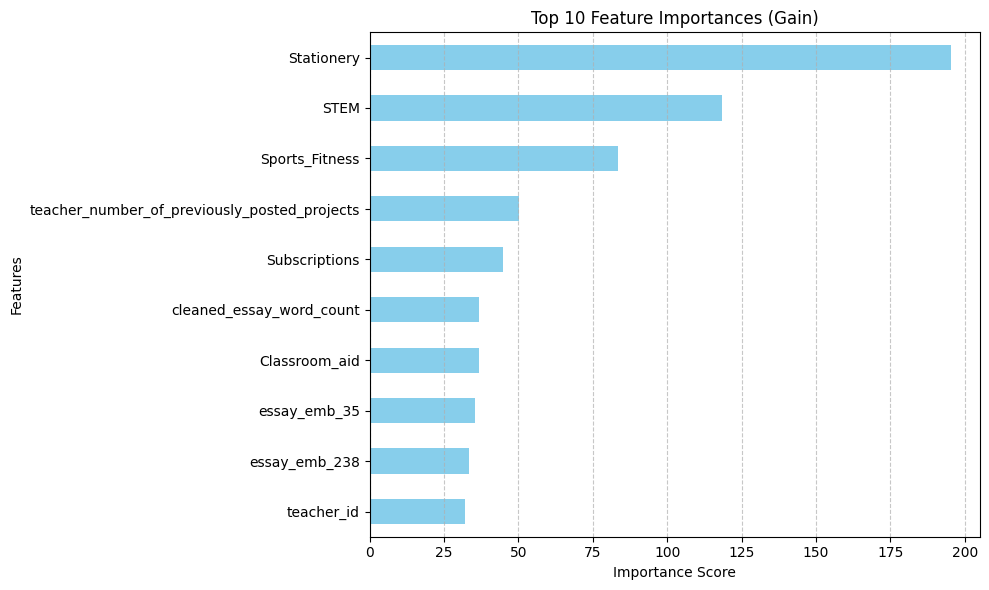

In [46]:
# feature importances
feat_importances = pd.Series(final_model.get_booster().get_score(importance_type='gain')).sort_values(ascending=True)

top_10_features = feat_importances.tail(10)

plt.figure(figsize=(10, 6))
top_10_features.plot(kind='barh', color='skyblue')
plt.title('Top 10 Feature Importances (Gain)')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

- Stationery and STEM-related resource features dominate the model’s gain-based importance, indicating that what is being requested (resource type and cost profile) has a stronger influence on approval outcomes than most textual or temporal features.

# Insights and Recommendations

## Insights

1. The dataset is **highly imbalanced** (~85% approvals), making PR-AUC more reliable than accuracy or ROC-AUC.
2. **Teacher behavior dominates approval outcomes**, but raw `teacher_id` cannot be used due to leakage.
3. **Aggregated teacher history features** are critical for generalization.
4. Teacher experience correlates with approval, but the **effect size is weak**, limiting standalone usefulness.
5. Low-cardinality features (teacher_prefix, grade) are encoded using **one-hot encoding**.
6. High-cardinality features (teacher_id, school_state) require **Stratified K-Fold target encoding** to avoid leakage.
7. Resource requests are **sparse**, with most projects focusing on 1–2 resource types.
8. **Books and Stationery dominate** approvals, reflecting essential classroom needs.
9. High-cost categories (STEM, Electronics) show **lower approval likelihood**.
10. Project cost and quantity are **right-skewed** and benefit from **log transformation or binning**.
11. Temporal features show strong seasonality but **negligible causal impact** on approval.
12. Text features (title, essay) are **high-dimensional and mostly unique**, favoring TF-IDF or embeddings.
13. Sentiment and readability show **statistical significance but weak practical value**.
14. **XGBoost is well-suited** due to its ability to handle non-linearity, sparse features, and mixed data types.
15. Class imbalance is addressed using **scale_pos_weight = 0.178**, improving minority-class learning.
16. Hyperparameter tuning via Optuna achieved **Best PR-AUC ≈ 0.937**, indicating strong ranking performance.
17. Optimized parameters (deep trees, low learning rate, regularization) show a **bias–variance balanced model**.
18. **Consistent PR-AUC across train, validation, and test** confirms minimal overfitting.
19. ROC-AUC (~0.76) is lower due to imbalance, reinforcing why **PR-AUC is the primary metric**.
20. **Decision threshold = 0.7** provides the best balance between approval volume and risk by reducing false approvals without excessive recall loss.
21. **Stationery** and **STEM**-related resource features dominate the model’s gain-based importance, indicating that **what is being requested (resource type and cost profile)** has a stronger influence on approval outcomes than most textual or temporal features.

## Recommendations

1. **Adopt a risk-based approval workflow**

   → *Impact:* Reduces reviewer load by focusing effort only where risk is high.

2. **Operationalize model threshold at 0.7, however recalibrate the model and threshold periodically**

   → *Impact:* Lowers false approvals while preserving high approval throughput.

3. **Fast-track low-risk projects automatically**

   → *Impact:* Shorter approval cycle times and better teacher satisfaction.

4. **Escalate high-cost and complex requests for deeper review**

   → *Impact:* Better capital allocation and reduced funding risk.

5. **Introduce cost-optimization nudges during project creation**

   → *Impact:* Increases approval likelihood and overall platform efficiency.

6. **Avoid policy rules based on submission timing or seasonality**

   → *Impact:* Prevents ineffective operational constraints with no approval benefit.

7. **Base decisions on aggregated teacher behavior, not identity**

   → *Impact:* Improves fairness, scalability, and model generalization.

8. **Standardize reviewer decisions using model risk scores**

   → *Impact:* Reduces inconsistency and subjective bias across reviewers.

9. **Track false approvals and PR-AUC as core KPIs**

   → *Impact:* Aligns monitoring with real business risk instead of inflated accuracy.

10. **Introduce resource-aware review prioritization**

    → *Impact:* Enables faster approvals for low-risk, essential resource requests (e.g., stationery) while flagging high-cost or complex categories (e.g., STEM) for closer review.
